In [1]:
import pandas as pd
import numpy as np
import re


In [2]:
%pwd

'/home/jee/bvbrc_workshop_Aug2022'

In [3]:
rast_rtab = pd.read_csv('/home/jee/bvbrc_workshop_Aug2022/bvbrc_annot/rast_gff/roary_output/gene_presence_absence.Rtab', sep='\t')
rast_csv = pd.read_csv('/home/jee/bvbrc_workshop_Aug2022/bvbrc_annot/rast_gff/roary_output/gene_presence_absence.csv')

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (10,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,25

In [4]:
rast_rtab.shape
# grep -c ">" bvbrc_workshop_Aug2022/bvbrc_annot/rast_gff/roary_output/rast_pan_genome_reference.fa
# = 34818

(34818, 648)

### TN916 features - 22 Feb 2023

In [144]:
rast_tn916_genes = rast_csv[(rast_csv['Gene'].str.contains('tn916', case=False)) | 
         (rast_csv['Non-unique Gene name'].str.contains('tn916', case=False, na=False))]['Gene'].to_list()
len(rast_tn916_genes)

rast_tet_genes = rast_csv[(rast_csv['Gene'].str.contains('Tetracycline', case=False)) | 
         (rast_csv['Non-unique Gene name'].str.contains('Tetracycline', case=False, na=False))]['Gene'].to_list()

In [163]:
 rast_csv[(rast_csv['Gene'].str.contains('tn916', case=False)) | 
         (rast_csv['Non-unique Gene name'].str.contains('tn916', case=False, na=False))]

Gene  \
2834                        Tn916, hypothetical protein   
3128         Tn916, transcriptional regulator, putative   
3806     putative transposon integrase; Tn916 ORF3-like   
3811   putative transposon excisionase; Tn916 ORF1-like   
5427                                         group_2489   
5452                                         group_2502   
5632                                        group_24999   
5772                                        group_10615   
6874                                         group_2497   
7538                                         group_2488   
8076                                         group_2487   
8515                                         group_2504   
8681                                         group_2498   
10694                                        group_2491   
10892                                       group_26749   
12398                                        group_2494   
12992                                       group_10614   
15236                                       group_22501   
16118                                       group_22509   
16191                                        group_2496   
17326                                       group_23130   
17334                                       group_23142   
17442                                        group_2492   
17443                                        group_2501   
17444                                        group_2503   
18357                     Tn916, NLP/P60 family protein   
18497                                       group_17355   
19214                                        group_2493   
19219                                        group_2495   
19232                                        group_2500   
20131                                        group_9445   
20690                                       group_17970   
21784                                       group_25031   
23659                                       group_10613   
24274                                       group_13188   
25211                                       group_21057   
25213                                       group_21060   
25680                                       group_22164   
26858                                        group_2490   
26923                                        group_2499   
27866                                       group_26337   
27868                                       group_26339   
27984                                       group_26512   
28009                                       group_26537   
28702                                       group_27378   
29393                                       group_29355   
29420                                       group_29382   
29421                                       group_29383   
29435                                       group_29401   
29497                                       group_29540   
29535                                       group_29599   
29561                                       group_29623   
29562                                       group_29624   
30069                                       group_30942   
32797                                       group_34772   
32798                                       group_34773   
32806                                       group_34782   
32807                                       group_34783   
32829                                       group_34804   
32841                                       group_34816   

                                   Non-unique Gene name  Annotation  \
2834                                                NaN         NaN   
3128                                                NaN         NaN   
3806                                                NaN         NaN   
3811                                                NaN         NaN   
5427         Tn916, transcriptional regulator, putative         NaN   
5452         Tn916, trans

In [161]:
pd.set_option('display.max_colwidth', None)
rast_csv[(rast_csv['Gene'].str.contains('Tetracycline', case=False)) | 
         (rast_csv['Non-unique Gene name'].str.contains('Tetracycline', case=False, na=False))][['Gene','Non-unique Gene name']]


Gene  \
3850       Tetracycline resistance, ribosomal protection type > Tet(M)   
5192                 Tetracycline resistance, MFS efflux pump > Tet(L)   
5793                                                        group_2197   
6840   Permease, MDR related, probably tetracycline resistance protein   
7740                                                        group_3553   
8072                                                        group_2214   
12355                                                       group_2200   
14305                                                       group_2217   
14311                                                       group_2220   
16852      Tetracycline resistance, ribosomal protection type > Tet(S)   
17266                                                       group_2198   
17270                                                       group_2216   
18332                                                      group_14887   
18920                                                       group_2204   
21235                                                       group_2203   
21251                                                       group_2211   
21253                                                       group_2212   
21256                                                       group_2215   
21262                                                       group_2218   
24601                                                      group_14886   
24688                                                      group_15375   
25599                                                       group_2199   
25602                                                       group_2201   
25610                                                       group_2202   
25628                                                       group_2205   
25630                                                       group_2206   
25631                                                       group_2207   
25640                                                       group_2208   
25643                                                       group_2209   
25646                                                       group_2210   
25669                                                       group_2213   
25681                                                       group_2219   
26251      Tetracycline resistance, ribosomal protection type > Tet(W)   
27080      Tetracycline resistance, ribosomal protection type > Tet(O)   
30791                                                      group_32236   

                                                  Non-unique Gene name  
3850                                                               NaN  
5192                                                               NaN  
5793       Tetracycline resistance, ribosomal protection type > Tet(M)  
6840                                                               NaN  
7740   Permease, MDR related, probably tetracycline resistance protein  
8072       Tetracycline resistance, ribosomal protection type > Tet(M)  
12355      Tetracycline resistance, ribosomal protection type > Tet(M)  
14305      Tetracycline resistance, ribosomal protection type > Tet(M)  
14311      Tetracycline resistance, ribosomal protection type > Tet(M)  
16852                                                              NaN  
17266      Tetracycline resistance, ribosomal protection type > Tet(M)  
17270      Tetracycline resistance, ribosomal protection type > Tet(M)  
18332                Tetracycline resistance, MFS efflux pump > Tet(L)  
18920      Tetracycline resistance, ribosomal protection type > Tet(M)  
21235      Tetracycline resistance, ribosomal protection type > Tet(M)  
21251      Tetracycline resistance, ribosomal protection type > Tet(M)  
21253      Tetracycline resistance, ribosomal protection type > Tet(M)  
21256      Tetracycline resistance, ribosomal protection type > Tet(M)  
21262      Tet

In [43]:
DoxR_isolates = Xy_Doxycycline[Xy_Doxycycline['Doxycycline']==1].index.to_list()
len(DoxR_isolates)

231

In [138]:
display(rast_csv[rast_csv['Gene']=='group_10615'])
display(rast_csv[rast_csv['Gene']=='putative transposon integrase; Tn916 ORF3-like'])

Gene                            Non-unique Gene name  Annotation  \
5772  group_10615  putative transposon integrase; Tn916 ORF3-like         NaN   

      No. isolates  No. sequences  Avg sequences per isolate  Genome Fragment  \
5772            94             94                        1.0              303   

      Order within Fragment  Accessory Fragment  \
5772                  11944                 1.0   

      Accessory Order with Fragment  ... SRR14026546.rast  SRR14026547.rast  \
5772                        18626.0  ...              NaN               NaN   

      SRR14026548.rast  SRR14026549.rast        SRR14026550.rast  \
5772               NaN               NaN  fig|1350.2518.peg.1481   

     SRR14026551.rast        SRR14026552.rast SRR14026553.rast  \
5772              NaN  fig|1350.2524.peg.1356              NaN   

            SRR14026554.rast        SRR14026555.rast  
5772  fig|1350.2523.peg.1299  fig|1350.2525.peg.1303  

[1 rows x 661 columns]

Gene Non-unique Gene name  \
3806  putative transposon integrase; Tn916 ORF3-like                  NaN   

      Annotation  No. isolates  No. sequences  Avg sequences per isolate  \
3806         NaN           240            240                        1.0   

      Genome Fragment  Order within Fragment  Accessory Fragment  \
3806              303                  12491                 1.0   

      Accessory Order with Fragment  ... SRR14026546.rast  SRR14026547.rast  \
3806                          957.0  ...              NaN               NaN   

      SRR14026548.rast  SRR14026549.rast SRR14026550.rast SRR14026551.rast  \
3806               NaN               NaN              NaN              NaN   

     SRR14026552.rast SRR14026553.rast SRR14026554.rast SRR14026555.rast  
3806              NaN              NaN              NaN              NaN  

[1 rows x 661 columns]

In [128]:
pd.set_option('display.max_rows', None)
rast_tn916_df = Xy_Doxycycline[rast_tn916_genes]
rast_tn916_df[~rast_tn916_df.index.isin(DoxR_isolates)]
rast_tn916_df[rast_tn916_df.index.isin(DoxR_isolates)].iloc[:,0:4].columns

Index(['Tn916, hypothetical protein',
       'Tn916, transcriptional regulator, putative',
       'putative transposon integrase; Tn916 ORF3-like',
       'putative transposon excisionase; Tn916 ORF1-like'],
      dtype='object')

In [147]:
rast_tet_df = Xy_Doxycycline[rast_tet_genes]
rast_tet_df[rast_tet_df.index.isin(DoxR_isolates)]

Tetracycline resistance, ribosomal protection type > Tet(M)  \
Run_accession                                                                
SRR13712363                                                    0             
SRR13712365                                                    0             
SRR13712370                                                    1             
SRR13712373                                                    1             
SRR13712376                                                    0             
SRR13712377                                                    1             
SRR13712379                                                    1             
SRR13712382                                                    1             
SRR13712383                                                    1             
SRR13712384                                                    1             
SRR13712385                                                    1             
SRR13712503                                                    1             
SRR13712511                                                    1             
SRR13712512                                                    0             
SRR13712517                                                    1             
SRR13712518                                                    1             
SRR13712520                                                    1             
SRR13712522                                                    1             
SRR13712525                                                    1             
SRR13725687                                                    1             
SRR13725691                                                    1             
SRR13725695                                                    1             
SRR13725697                                                    1             
SRR13725700                                                    1             
SRR13725701                                                    1             
SRR13725703                                                    0             
SRR13725706                                                    1             
SRR13725710                                                    1             
SRR13725714                                                    0             
SRR13725715                                                    1             
SRR13725716                                                    0             
SRR13725718                                                    1             
SRR13725720                                                    1             
SRR13725726                                                    0             
SRR13725731                                                    1             
SRR13726504                                                    0             
SRR13726505                                                    1             
SRR13726506                                                    1             
SRR13726507                                                    1             
SRR13726510                                                    1             
SRR13726511                                                    1             
SRR13726512                                                    1             
SRR13726513                                                    1             
SRR13726515                                                    1             
SRR13726516                                                    1             
SRR13726517                                                    1             
SRR13726518                                                    1             
SRR13726520                                                    1             
SRR13726523                                                    1             
SRR13726524                          

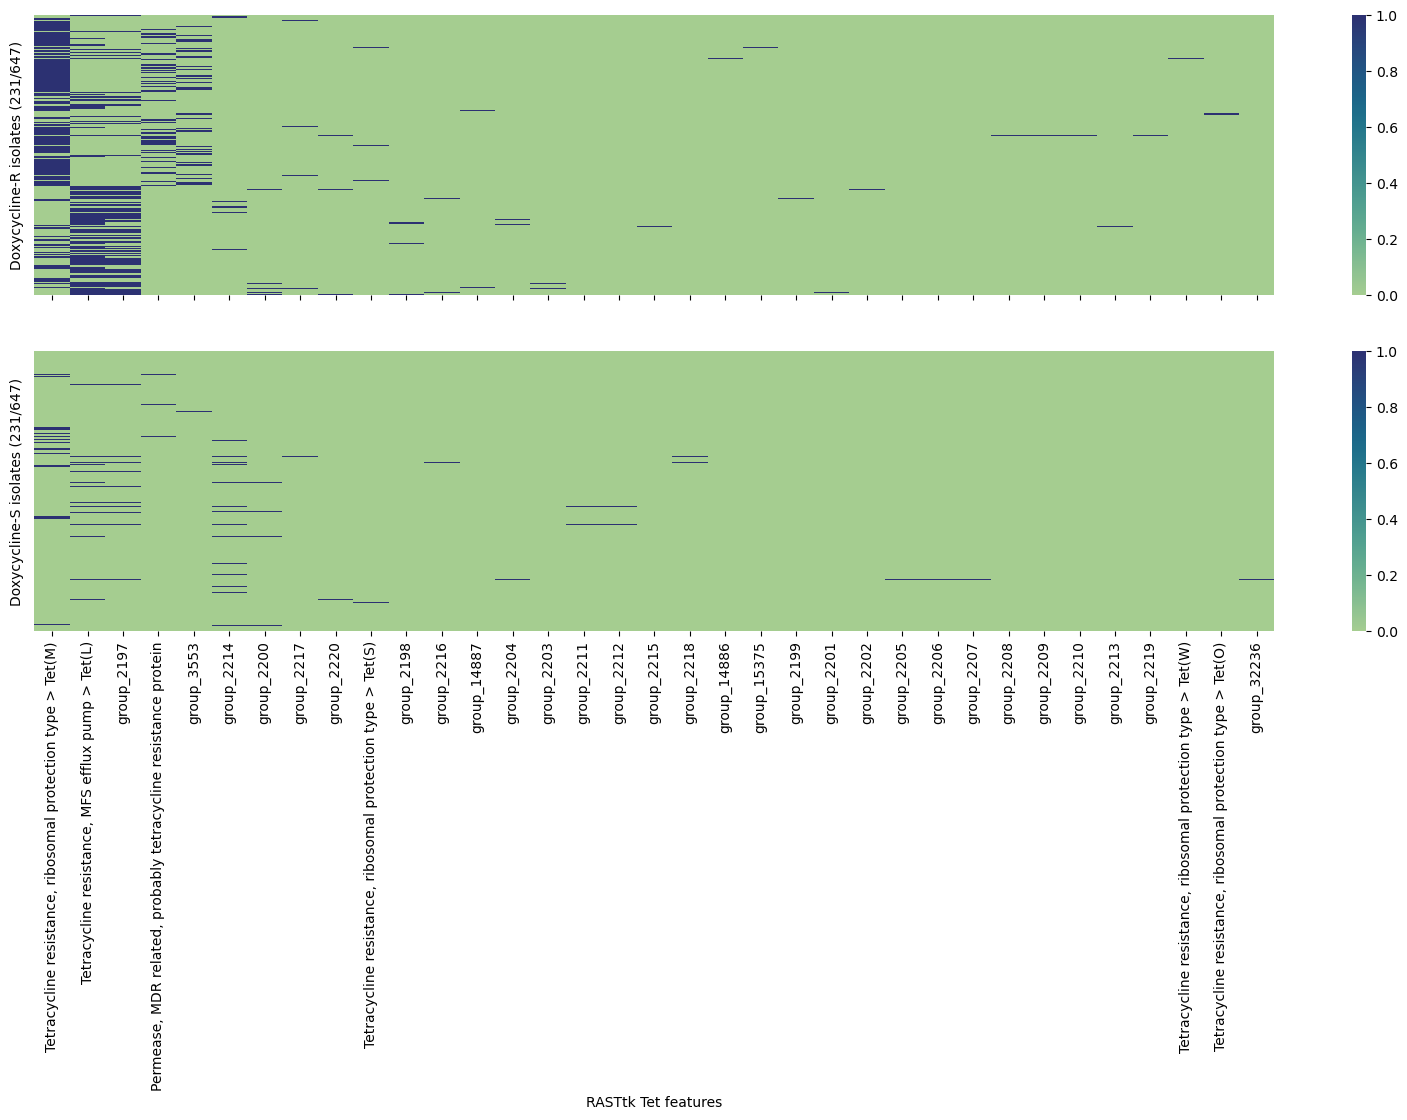

In [162]:
f, axarr = plt.subplots(2, sharex=True, figsize=(20,8))

sns.heatmap(rast_tet_df[rast_tet_df.index.isin(DoxR_isolates)], cmap="crest" , xticklabels=True, yticklabels=False, ax=axarr[0])
sns.heatmap(rast_tet_df[~rast_tet_df.index.isin(DoxR_isolates)], cmap="crest" , xticklabels=True, yticklabels=False, ax=axarr[1])

axarr[0].set(ylabel = "Doxycycline-R isolates (231/647)")
axarr[1].set(xlabel ="RASTtk Tet features", ylabel = "Doxycycline-S isolates (231/647)")


plt.savefig('/home/jee/ToBeDownloaded/rast_tet_heatmap.png', format="png", bbox_inches='tight')

plt.show()

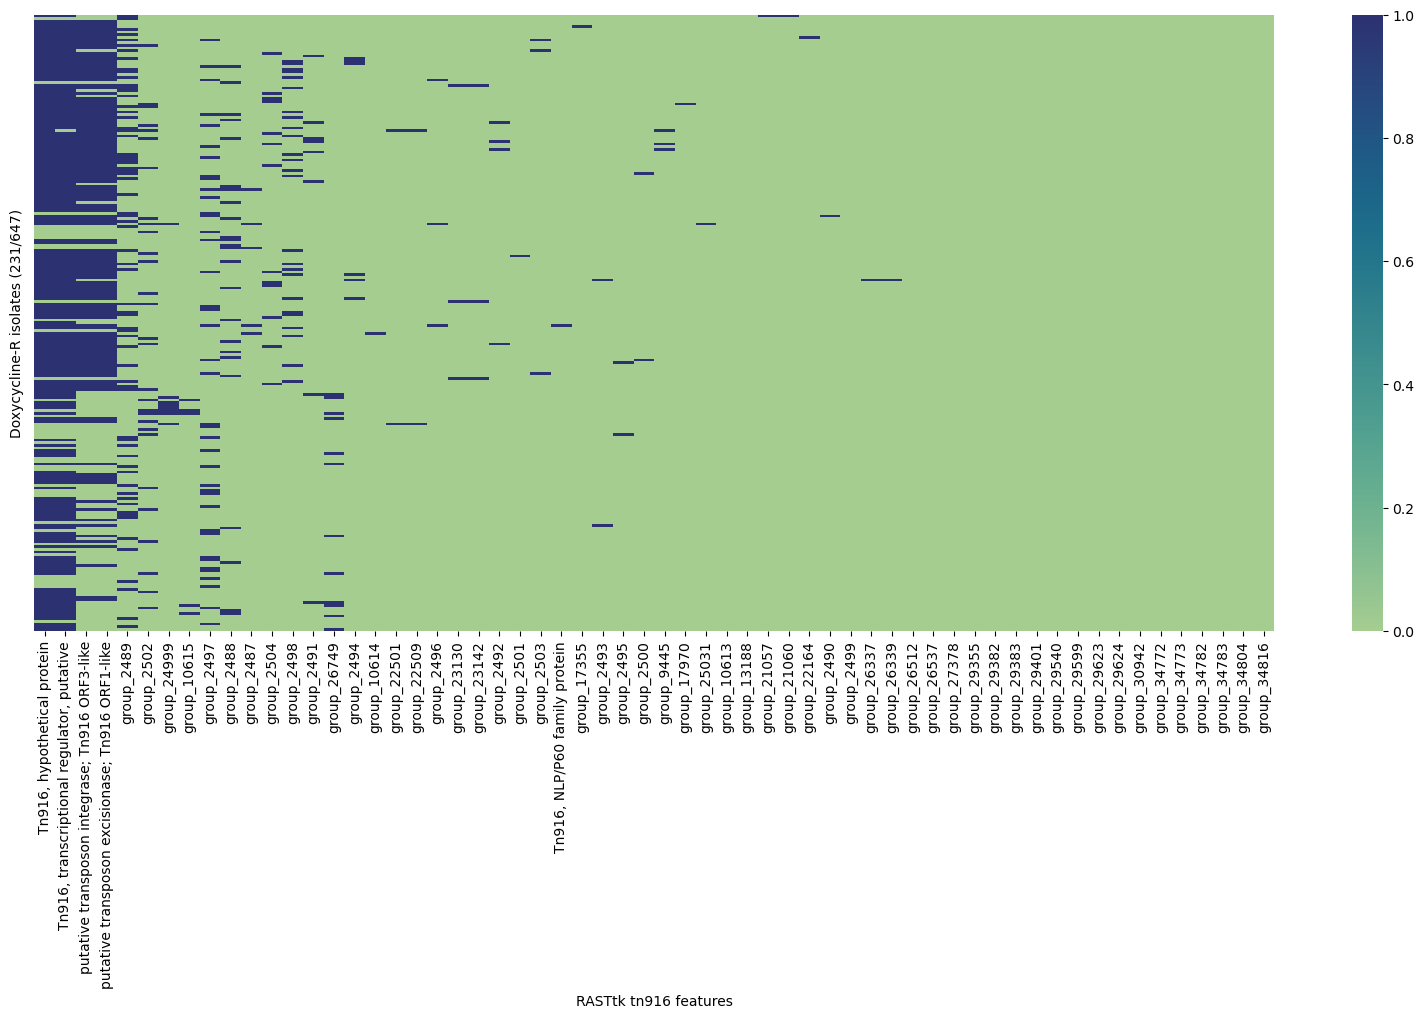

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))

rast_tn916_heatmap = sns.heatmap(rast_tn916_df[rast_tn916_df.index.isin(DoxR_isolates)], cmap="crest" ,
                                 xticklabels=True,
                                 yticklabels=False)

# add label to the axis and label to the plot
rast_tn916_heatmap.set(xlabel ="RASTtk tn916 features", ylabel = "Doxycycline-R isolates (231/647)")


plt.savefig('/home/jee/ToBeDownloaded/rast_tn916_heatmap.png', format="png", bbox_inches='tight')

plt.show()

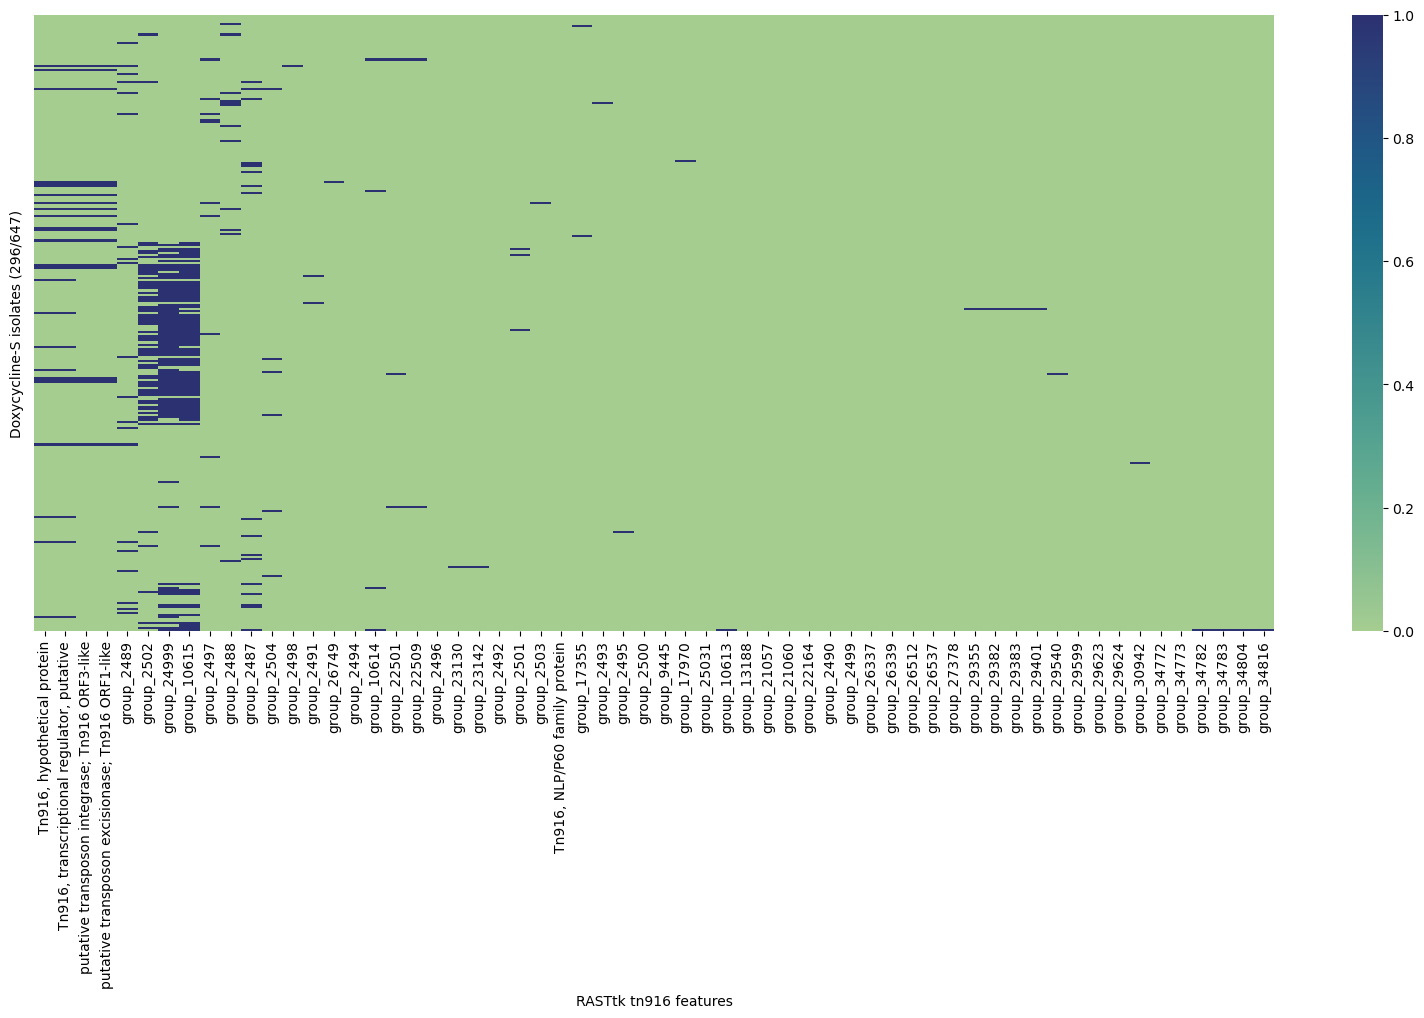

In [72]:
plt.figure(figsize=(20,8))

rast_tn916_heatmap_DoxS = sns.heatmap(rast_tn916_df[~rast_tn916_df.index.isin(DoxR_isolates)], cmap="crest" ,
                                 xticklabels=True,
                                 yticklabels=False)

# add label to the axis and label to the plot
rast_tn916_heatmap_DoxS.set(xlabel ="RASTtk tn916 features", ylabel = "Doxycycline-S isolates (296/647)")


plt.savefig('/home/jee/ToBeDownloaded/rast_tn916_heatmap_doxS.png', format="png", bbox_inches='tight')

plt.show()

In [103]:
rast_tn916_df[~rast_tn916_df.index.isin(DoxR_isolates)] #last few blobs SRR14026510:end
display(rast_tn916_df[~rast_tn916_df.index.isin(DoxR_isolates)].loc['SRR14026510':])
# meta_all[meta_all['Run_accession'].isin(['SRR14026510', 'SRR14026511', 'SRR14026517', 'SRR14026519',
#        'SRR14026521', 'SRR14026523', 'SRR14026524', 'SRR14026526',
#        'SRR14026527', 'SRR14026528', 'SRR14026529', 'SRR14026534',
#        'SRR14026541', 'SRR14026543', 'SRR14026544', 'SRR14026545',
#        'SRR14026546', 'SRR14026547', 'SRR14026548', 'SRR14026550',
#        'SRR14026552', 'SRR14026554', 'SRR14026555'])].Source_code

Tn916, hypothetical protein  \
Run_accession                                
SRR14026510                              0   
SRR14026511                              0   
SRR14026517                              0   
SRR14026519                              0   
SRR14026521                              0   
SRR14026523                              0   
SRR14026524                              0   
SRR14026526                              0   
SRR14026527                              0   
SRR14026528                              0   
SRR14026529                              0   
SRR14026534                              0   
SRR14026541                              0   
SRR14026543                              0   
SRR14026544                              0   
SRR14026545                              0   
SRR14026546                              1   
SRR14026547                              0   
SRR14026548                              0   
SRR14026550                              0   
SRR14026552                              0   
SRR14026554                              0   
SRR14026555                              0   

               Tn916, transcriptional regulator, putative  \
Run_accession                                               
SRR14026510                                             0   
SRR14026511                                             0   
SRR14026517                                             0   
SRR14026519                                             0   
SRR14026521                                             0   
SRR14026523                                             0   
SRR14026524                                             0   
SRR14026526                                             0   
SRR14026527                                             0   
SRR14026528                                             0   
SRR14026529                                             0   
SRR14026534                                             0   
SRR14026541                                             0   
SRR14026543                                             0   
SRR14026544                                             0   
SRR14026545                                             0   
SRR14026546                                             1   
SRR14026547                                             0   
SRR14026548                                             0   
SRR14026550                                             0   
SRR14026552                                             0   
SRR14026554                                             0   
SRR14026555                                             0   

               putative transposon integrase; Tn916 ORF3-like  \
Run_accession                                                   
SRR14026510                                                 0   
SRR14026511                                                 0   
SRR14026517                                                 0   
SRR14026519                                                 0   
SRR14026521                                                 0   
SRR14026523                                                 0   
SRR14026524                                                 0   
SRR14026526                                                 0   
SRR14026527                                                 0   
SRR14026528                                                 0   
SRR14026529                                                 0   
SRR14026534                                                 0   
SRR14026541                                                 0   
SRR14026543                                                 0   
SRR14026544                                                 0   
SRR14026545                                                 0   
SRR14026546                                                 0   
SRR14026547                                                 0   
SRR14026548                           

In [96]:
rast_tn916_df[~rast_tn916_df.index.isin(DoxR_isolates)]

Tn916, hypothetical protein  \
Run_accession                                
SRR13712361                              0   
SRR13712362                              0   
SRR13712364                              0   
SRR13712366                              0   
SRR13712367                              0   
SRR13712368                              0   
SRR13712369                              0   
SRR13712371                              0   
SRR13712372                              0   
SRR13712374                              0   
SRR13712375                              0   
SRR13712378                              0   
SRR13712380                              0   
SRR13712381                              0   
SRR13712386                              0   
SRR13712387                              0   
SRR13712388                              0   
SRR13712389                              0   
SRR13712390                              0   
SRR13712391                              0   
SRR13712392                              0   
SRR13712494                              0   
SRR13712504                              0   
SRR13725688                              0   
SRR13725689                              1   
SRR13725693                              0   
SRR13725696                              1   
SRR13725698                              0   
SRR13725713                              0   
SRR13725728                              0   
SRR13725734                              0   
SRR13725735                              0   
SRR13726503                              0   
SRR13726525                              0   
SRR13726526                              0   
SRR13726527                              1   
SRR13726528                              0   
SRR13726529                              0   
SRR13726535                              0   
SRR13726537                              0   
SRR13726539                              0   
SRR13726554                              0   
SRR13726561                              0   
SRR13726568                              0   
SRR13726576                              0   
SRR13726579                              0   
SRR13726581                              0   
SRR13726582                              0   
SRR13726585                              0   
SRR13726586                              0   
SRR13726593                              0   
SRR13726594                              0   
SRR13727000                              0   
SRR13727001                              0   
SRR13727003                              0   
SRR13727004                              0   
SRR13727006                              0   
SRR13727009                              0   
SRR13727010                              0   
SRR13727012                              0   
SRR13727013                              0   
SRR13727014                              0   
SRR13727019                              0   
SRR13727020                              0   
SRR13727021                              0   
SRR13727022                              0   
SRR13727026                              0   
SRR13727027                              0   
SRR13727029                              0   
SRR13727033                              0   
SRR13727035                              0   
SRR13999914                              0   
SRR13999928                              0   
SRR13999930                              0   
SRR13999933                              0   
SRR13999934                              0   
SRR13999946                              0   
SRR13999950                              0   
SRR13999953                              0   
SRR13999956                              0   
SRR13999957                              1   
SRR13999959                              1   
SRR13999961                              1   
SRR13999964                              0   
SRR13999966                              0   
SRR13999969  

In [122]:
meta_all[meta_all['Run_accession']=='SRR14000614'].Source_code

620    SS
Name: Source_code, dtype: object

In [95]:
meta_all[meta_all['Run_accession'].isin(rast_tn916_df[~rast_tn916_df.index.isin(DoxR_isolates)].index.to_list())]

Study_accession Sample_accession Run_accession              Isolate_name  \
5       PRJNA604849     SAMN14000311   SRR14026460                SWEnt-1194   
6       PRJNA604849     SAMN14000310   SRR14026448                SWEnt-1193   
8       PRJNA604849     SAMN14000308   SRR14026446                SWEnt-1171   
10      PRJNA604849     SAMN14000306   SRR14026453                SWEnt-1160   
18      PRJNA604849     SAMN14000298   SRR14026482               SWEntR-0266   
19      PRJNA604849     SAMN14000297   SRR14026473               SWEntR-0256   
26      PRJNA604849     SAMN14000290   SRR14026491                  Ent-0004   
27      PRJNA604849     SAMN14000289   SRR14026487                  Ent-0010   
28      PRJNA604849     SAMN14000288   SRR14026498                  Ent-0032   
29      PRJNA604849     SAMN14000287   SRR14026501                  Ent-0081   
31      PRJNA604849     SAMN14000285   SRR14026469                SWEnt-0923   
33      PRJNA604849     SAMN14000283   SRR14026457                SWEnt-0939   
35      PRJNA604849     SAMN14000281   SRR14026489                SWEnt-0978   
37      PRJNA604849     SAMN14000279   SRR14026480                SWEnt-0984   
38      PRJNA604849     SAMN14000278   SRR14026504                SWEnt-1012   
39      PRJNA604849     SAMN14000277   SRR14026443                SWEnt-1013   
40      PRJNA604849     SAMN14000276   SRR14026474                SWEnt-1077   
43      PRJNA604849     SAMN14000273   SRR14026450                  Ent-0336   
44      PRJNA604849     SAMN14000272   SRR14026492                  Ent-0013   
46      PRJNA604849     SAMN14000270   SRR14022755  ES-C-ST001-07DEC15-0141E   
48      PRJNA604849     SAMN14000268   SRR14022778  ES-C-ST001-01FEB16-0145I   
51      PRJNA604849     SAMN14000265   SRR14022737  ES-C-ST001-05OCT15-0134E   
52      PRJNA604849     SAMN14000264   SRR14022739  ES-C-ST001-05OCT15-0134C   
53      PRJNA604849     SAMN14000263   SRR14022772  ES-C-ST001-05OCT15-0134B   
55      PRJNA604849     SAMN14000261   SRR14022747  ES-C-ST001-27APR15-0081L   
57      PRJNA604849     SAMN14000259   SRR14022750  ES-C-ST002-01FEB16-0146D   
58      PRJNA604849     SAMN14000258   SRR14022781  ES-C-ST002-01FEB16-0146C   
59      PRJNA604849     SAMN14000257   SRR14022760  ES-C-ST002-01FEB16-0146B   
65      PRJNA604849     SAMN14000251   SRR14022749  ES-C-ST002-05OCT15-0135C   
66      PRJNA604849     SAMN14000250   SRR14022758  ES-C-ST002-05OCT15-0135B   
67      PRJNA604849     SAMN14000249   SRR14022734  ES-C-ST002-05OCT15-0135A   
68      PRJNA604849     SAMN14000248   SRR14022754  ES-C-ST001-25AUG15-0117M   
70      PRJNA604849     SAMN14000246   SRR14022752  ES-C-ST001-25AUG15-0117E   
71      PRJNA604849     SAMN14000245   SRR14022774  ES-C-ST001-25AUG15-0117D   
72      PRJNA604849     SAMN14000244   SRR14022756  ES-C-ST001-25AUG15-0117B   
74      PRJNA604849     SAMN14000242   SRR14022782  ES-M-ST001-03MAY16-0152E   
75      PRJNA604849     SAMN14000241   SRR14022779  ES-M-ST001-03MAY16-0152M   
76      PRJNA604849     SAMN14000240   SRR14022783  ES-M-ST001-03MAY16-0152J   
77      PRJNA604849     SAMN14000239   SRR14022764  ES-M-ST001-03MAY16-0152A   
79      PRJNA604849     SAMN14000237   SRR14022735  ES-M-ST001-08MAR16-0147L   
80      PRJNA604849     SAMN14000236   SRR14022753  ES-M-ST001-08MAR16-0147I   
81      PRJNA604849     SAMN14000235   SRR14022770  ES-M-ST001-08MAR16-0147E   
82      PRJNA604849     SAMN14000234   SRR14022765  ES-M-ST001-08MAR16-0147B   
83      PRJNA604849     SAMN14000233   SRR14022780  ES-M-ST001-03NOV15-0137E   
84      PRJNA604849     SAMN14000232   SRR14022742  ES-M-ST001-03NOV15-0137C   
86      PRJNA604849     SAMN14000230   SRR14022763  ES-M-ST001-15SEP15-0124M   
87      PRJNA604849     SAMN14000229   SRR14022744  ES-M-ST001-15SEP15-0124K   
88      PRJNA604849     SAMN14000228   SRR14022746  ES-M-ST001-15SEP15-0124J   
89      PRJNA604849     SAMN14000227   SRR14022775  ES-M-ST001-15SEP15-0124I   
90  

In [92]:
blob_in_the_middle = rast_tn916_df[~rast_tn916_df.index.isin(DoxR_isolates)].loc['SRR14010933':'SRR14011043'].index.to_list()
meta_all[meta_all['Run_accession'].isin(blob_in_the_middle)]

Study_accession Sample_accession Run_accession Isolate_name  \
102     PRJNA604849     SAMN14000214   SRR14011014   HC_VRE0013   
103     PRJNA604849     SAMN14000213   SRR14010976   HC_VRE0012   
104     PRJNA604849     SAMN14000212   SRR14010972   HC_VRE0011   
105     PRJNA604849     SAMN14000211   SRR14011021   HC_VRE0010   
106     PRJNA604849     SAMN14000210   SRR14011027   HC_VRE0009   
107     PRJNA604849     SAMN14000209   SRR14010950   HC_VRE0008   
108     PRJNA604849     SAMN14000208   SRR14010980   HC_VRE0007   
109     PRJNA604849     SAMN14000207   SRR14011008   HC_VRE0005   
110     PRJNA604849     SAMN14000206   SRR14010959   HC_VRE0003   
111     PRJNA604849     SAMN14000205   SRR14011023   HC_VRE0069   
112     PRJNA604849     SAMN14000204   SRR14011004   HC_VRE0068   
114     PRJNA604849     SAMN14000202   SRR14011018   HC_VRE0066   
115     PRJNA604849     SAMN14000201   SRR14010995   HC_VRE0065   
117     PRJNA604849     SAMN14000199   SRR14011036   HC_VRE0063   
118     PRJNA604849     SAMN14000198   SRR14010939   HC_VRE0062   
119     PRJNA604849     SAMN14000197   SRR14011010   HC_VRE0061   
120     PRJNA604849     SAMN14000196   SRR14010948   HC_VRE0059   
121     PRJNA604849     SAMN14000195   SRR14010963   HC_VRE0058   
122     PRJNA604849     SAMN14000194   SRR14010975   HC_VRE0057   
123     PRJNA604849     SAMN14000193   SRR14011001   HC_VRE0056   
124     PRJNA604849     SAMN14000192   SRR14010979   HC_VRE0055   
125     PRJNA604849     SAMN14000191   SRR14011028   HC_VRE0054   
126     PRJNA604849     SAMN14000190   SRR14010949   HC_VRE0053   
127     PRJNA604849     SAMN14000189   SRR14010971   HC_VRE0091   
128     PRJNA604849     SAMN14000188   SRR14011017   HC_VRE0090   
129     PRJNA604849     SAMN14000187   SRR14010999   HC_VRE0074   
130     PRJNA604849     SAMN14000186   SRR14011037   HC_VRE0073   
131     PRJNA604849     SAMN14000185   SRR14010952   HC_VRE0072   
134     PRJNA604849     SAMN14000182   SRR14011024   HC_VRE0104   
135     PRJNA604849     SAMN14000181   SRR14011039   HC_VRE0103   
136     PRJNA604849     SAMN14000180   SRR14011003   HC_VRE0102   
137     PRJNA604849     SAMN14000179   SRR14010998   HC_VRE0100   
138     PRJNA604849     SAMN14000178   SRR14010956   HC_VRE0099   
140     PRJNA604849     SAMN14000176   SRR14010978   HC_VRE0097   
142     PRJNA604849     SAMN14000174   SRR14011015   HC_VRE0095   
144     PRJNA604849     SAMN14000172   SRR14010954   HC_VRE0093   
145     PRJNA604849     SAMN14000171   SRR14010993   HC_VRE0092   
147     PRJNA604849     SAMN14000169   SRR14010947   HC_VRE0088   
148     PRJNA604849     SAMN14000168   SRR14011025   HC_VRE0087   
149     PRJNA604849     SAMN14000167   SRR14011040   HC_VRE0086   
150     PRJNA604849     SAMN14000166   SRR14011026   HC_VRE0085   
151     PRJNA604849     SAMN14000165   SRR14011032   HC_VRE0160   
152     PRJNA604849     SAMN14000164   SRR14011006   HC_VRE0162   
153     PRJNA604849     SAMN14000163   SRR14011011   HC_VRE0075   
154     PRJNA604849     SAMN14000162   SRR14010958   HC_VRE0076   
155     PRJNA604849     SAMN14000161   SRR14011035   HC_VRE0077   
157     PRJNA604849     SAMN14000159   SRR14010988   HC_VRE0080   
158     PRJNA604849     SAMN14000158   SRR14010989   HC_VRE0081   
160     PRJNA604849     SAMN14000156   SRR14010935   HC_VRE0083   
165     PRJNA604849     SAMN14000151   SRR14010933   HC_VRE0141   
166     PRJNA604849     SAMN14000150   SRR14010943   HC_VRE0142   
167     PRJNA604849     SAMN14000149   SRR14011000   HC_VRE0145   
168     PRJNA604849     SAMN14000148   SRR14010938   HC_VRE0146   
169     PRJNA604849     SAMN14000147   SRR14010937   HC_VRE0147   
170     PRJNA604849     SAMN14000146   SRR14010951   HC_VRE0148   
171     PRJNA604849     SAMN14000145   SRR14011029   HC_VRE0149   
172     PRJNA604849     SAMN14000144   SRR14010960   HC_VRE0150   
173     PRJNA604849     SAMN14000143   SRR14011007   HC_VRE0151   
174     PRJNA604849     SAMN14000142   SRR14010973 

---

###  Pangenome

In [4]:
rast_df = rast_rtab.rename(columns=lambda x: re.sub('.rast','',x))
rast_df.columns

Index(['Gene', 'SRR13712361', 'SRR13712362', 'SRR13712363', 'SRR13712364',
       'SRR13712365', 'SRR13712366', 'SRR13712367', 'SRR13712368',
       'SRR13712369',
       ...
       'SRR14026546', 'SRR14026547', 'SRR14026548', 'SRR14026549',
       'SRR14026550', 'SRR14026551', 'SRR14026552', 'SRR14026553',
       'SRR14026554', 'SRR14026555'],
      dtype='object', length=648)

In [5]:
X = rast_df.set_index('Gene').T

In [6]:
X = X.reset_index().rename(columns={'index':'Run_accession'})

In [7]:
X

Gene Run_accession  \
0      SRR13712361   
1      SRR13712362   
2      SRR13712363   
3      SRR13712364   
4      SRR13712365   
..             ...   
642    SRR14026551   
643    SRR14026552   
644    SRR14026553   
645    SRR14026554   
646    SRR14026555   

Gene  LSU ribosomal protein L33p @ LSU ribosomal protein L33p, zinc-dependent  \
0                                                     1                         
1                                                     1                         
2                                                     1                         
3                                                     1                         
4                                                     1                         
..                                                  ...                         
642                                                   1                         
643                                                   1                         
644                                                   1                         
645                                                   1                         
646                                                   1                         

Gene  SSU ribosomal protein S16p  Translation initiation factor 3  \
0                              1                                1   
1                              1                                1   
2                              1                                1   
3                              1                                1   
4                              1                                1   
..                           ...                              ...   
642                            1                                1   
643                            1                                1   
644                            1                                1   
645                            1                                1   
646                            1                                1   

Gene  SSU ribosomal protein S9p (S16e)  Cold shock protein of CSP family  \
0                                    1                                 1   
1                                    1                                 1   
2                                    1                                 1   
3                                    1                                 1   
4                                    1                                 1   
..                                 ...                               ...   
642                                  1                                 1   
643                                  1                                 1   
644                                  1                                 1   
645                                  1                                 1   
646                                  1                                 1   

Gene  SSU ribosomal protein S21p  LSU ribosomal protein L13p (L13Ae)  \
0                              1                                   1   
1                              1                                   1   
2                              1                                   1   
3                              1                                   1   
4                              1                                   1   
..                           ...                                 ...   
642                            1                                   1   
643                            1                                   1   
644                            1                                   1   
645                            1                                   1   
646                            1                                   1   

Gene  SSU ribosomal protein S5p (S2e)  SSU ribosomal protein S8p (S15Ae)  ...  \
0                                   1                                  1  

In [17]:
donor_recipient_ls = ['SRR14026472','SRR14026519']
# donor_recipient = X[X['Run_accession'].isin(donor_recipient_ls)].set_index('Run_accession').T

In [24]:
temp = donor_recipient[(donor_recipient['SRR14026472']==0) & (donor_recipient['SRR14026519']==1)].reset_index()
temp[~temp['Gene'].str.contains('group', case=False)].to_csv('only_in_NS1659_SRR14026519.csv', index=None)

In [16]:
list(rast_df.Gene)

['LSU ribosomal protein L33p @ LSU ribosomal protein L33p, zinc-dependent',
 'SSU ribosomal protein S16p',
 'Translation initiation factor 3',
 'SSU ribosomal protein S9p (S16e)',
 'Cold shock protein of CSP family',
 'SSU ribosomal protein S21p',
 'LSU ribosomal protein L13p (L13Ae)',
 'SSU ribosomal protein S5p (S2e)',
 'SSU ribosomal protein S8p (S15Ae)',
 'SSU ribosomal protein S14p (S29e) @ SSU ribosomal protein S14p (S29e), zinc-dependent',
 'LSU ribosomal protein L5p (L11e)',
 'LSU ribosomal protein L14p (L23e)',
 'LSU ribosomal protein L29p (L35e)',
 'LSU ribosomal protein L16p (L10e)',
 'SSU ribosomal protein S3p (S3e)',
 'LSU ribosomal protein L22p (L17e)',
 'LSU ribosomal protein L2p (L8e)',
 'LSU ribosomal protein L4p (L1e)',
 'SSU ribosomal protein S10p (S20e)',
 'SSU ribosomal protein S7p (S5e)',
 'SSU ribosomal protein S12p (S23e)',
 'Phosphoglycerate mutase (EC 5.4.2.11)',
 'Two-component transcriptional response regulator, OmpR family',
 'LSU ribosomal protein L36p @ L

#### AST metadata

In [8]:
meta_all = pd.read_csv('/home/jee/enterococcus_sample_reconciliation/all_combined_enterococcus_metadata.tsv',
                  sep='\t').rename({'Quinolone':'Quin'},axis=1)

meta = pd.read_csv('/home/jee/enterococcus_sample_reconciliation/all_combined_enterococcus_metadata.tsv',
                  sep='\t').rename({'Quinolone':'Quin'},axis=1)[['Run_accession', 'Species',
                  'Ampicillin', 'Vancomycin', 'Teicoplanin', 'Doxycycline',
                  'Erythromycin', 'Nitrofurantoin', 'Gentamicin', 'Linezolid',
                  'Levofloxacin', 'Quin', 'Streptomycin',
                  'Tigecycline']]

In [9]:
Xy_van = X.merge(meta[['Run_accession','Vancomycin']], on = 'Run_accession')

In [10]:
X_Vancomycin =Xy_van[Xy_van['Vancomycin'].isin(['R','S','S '])].replace(['S'], 0).replace(['S '], 0).replace(['R'],1).set_index('Run_accession')

---

In [11]:
Xy_doxy =  X.merge(meta[['Run_accession','Doxycycline']], on = 'Run_accession')
Xy_eryth =  X.merge(meta[['Run_accession','Erythromycin']], on = 'Run_accession')

In [12]:
Xy_Doxycycline = Xy_doxy[Xy_doxy['Doxycycline'].isin(['R','S'])].replace(['S'], 0).replace(['R'],1).set_index('Run_accession')
Xy_Erythromycin = Xy_eryth[Xy_eryth['Erythromycin'].isin(['R','S'])].replace(['S'], 0).replace(['R'],1).set_index('Run_accession')


In [13]:
# intermediate isolates bakta pangenome pattern for model combining both species (E. faecium & E. faecalis)
intermediate_Vancomycin = Xy_van[Xy_van['Vancomycin'].isin(['I'])].drop('Vancomycin', axis=1).set_index('Run_accession')
intermediate_Doxycycline = Xy_doxy[Xy_doxy['Doxycycline'].isin(['I'])].drop('Doxycycline', axis=1).set_index('Run_accession')
intermediate_Erythromycin = Xy_eryth[Xy_eryth['Erythromycin'].isin(['I'])].drop('Erythromycin', axis=1).set_index('Run_accession')

In [14]:
intermediate_Vancomycin

LSU ribosomal protein L33p @ LSU ribosomal protein L33p, zinc-dependent  \
Run_accession                                                                            
SRR13712503                                                    1                         
SRR13725688                                                    1                         
SRR13726511                                                    1                         
SRR13726526                                                    1                         
SRR13726563                                                    1                         
SRR13726564                                                    1                         
SRR13726569                                                    1                         
SRR13726576                                                    1                         
SRR13726577                                                    1                         
SRR13726578                                                    1                         
SRR13726580                                                    1                         
SRR13726581                                                    1                         
SRR13726582                                                    1                         
SRR13726587                                                    1                         
SRR13726588                                                    1                         
SRR13726589                                                    1                         
SRR13726591                                                    1                         
SRR13727018                                                    1                         
SRR13727019                                                    1                         
SRR13727021                                                    1                         
SRR13727025                                                    1                         
SRR13727026                                                    1                         
SRR13727027                                                    1                         
SRR13727032                                                    1                         
SRR13727035                                                    1                         
SRR13999912                                                    1                         
SRR13999933                                                    1                         
SRR13999957                                                    1                         
SRR13999979                                                    1                         
SRR13999987                                                    1                         
SRR14000006                                                    1                         
SRR14000020                                                    1                         
SRR14000587                                                    1                         
SRR14000588                                                    1                         
SRR14000599                                                    1                         
SRR14000600                                                    1                         
SRR14000605                                                    1                         
SRR14000608                                                    1                         
SRR14011020                                                    1                         

               SSU ribosomal protein S16p  Translation initiation factor 3  \
Run_accession                                                                
SRR13712503                             1                                1   
SRR13725688                             1                                1   
SRR13726511 

---

#### ML functions

In [15]:
from sklearn.preprocessing import LabelEncoder #might not need this?

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve

import itertools as it

In [16]:
from sklearn import metrics
from sklearn.metrics import classification_report

gb_clf = GradientBoostingClassifier(n_estimators = 100, max_features = 'auto', criterion = 'friedman_mse', 
                                     loss = 'exponential', learning_rate = 0.1)

rf_clf = RandomForestClassifier(n_estimators = 500, max_features = 'auto', criterion='gini')

def ML_features(X,y,clf):
    
    ###############################################
    #Get feature names first:
    features=[]
    for columns in X.columns:
        features.append(columns)
    ###############################################
    
    #init a kfold object. I like to call it "skf".
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    prediction_outcome_ls = []
    
    #So that we can plot again, we'll make a nice data structure for our results.
    records = []
    confusion_matrices = []
    
    feat_ls = []
    
    #Now we can loop.
    #looping on the skf.split() provides train/test indices.
    for train_index, test_index in skf.split(X.values,y.values):
        clf.fit(X.values[train_index], y.values[train_index])
        
        ###############################################
        #figure out the feature importance 
        model = clf.fit(X.values[train_index], y.values[train_index])
        imp_features = model.feature_importances_
        df_imp_features = pd.DataFrame({"features":features}).join(pd.DataFrame({"weights":imp_features}))
        df_imp_features_final = df_imp_features.sort_values(by=['weights'], ascending=False)
        display(df_imp_features_final)
        feat_ls.append(df_imp_features_final)
        ###############################################
        
                
        y_true_index = y.index[test_index]
        y_true = y.values[test_index]
        y_pred = clf.predict(X.values[test_index]) #get the predicted labels of the test set.
        
        y_true_index_ls = pd.DataFrame(y_true_index.to_list())
        y_true_df = pd.DataFrame(y_true)
        y_pred_df = pd.DataFrame(y_pred)

        #concatenating the two dataframes
        y_lists = [y_true_index_ls, y_true_df, y_pred_df]
        df_y_outcomes = pd.concat(y_lists, axis=1)
        df_y_outcomes.columns = ['GenomeID','y_true','y_pred']
        df_y_outcomes

        prediction_outcome_ls.append(df_y_outcomes)

  
   
        #We calculate our metrics individually now. 
        accuracy = metrics.accuracy_score(y_true, y_pred)
        f1 = metrics.f1_score(y_true, y_pred, average='weighted') #F1 behaves different for binary classification problems! be careful
        precision = metrics.precision_score(y_true, y_pred, average='weighted')
        recall = metrics.recall_score(y_true, y_pred, average='weighted')

        cm = metrics.confusion_matrix(y_true, y_pred) # pass your labels here if you want them.

        #Keeping the scores as a list of dicts that all have the same keys lets us do some nice pandas stuff.
        records.append({'Accuracy': accuracy,
                        'F1': f1,
                        'Precision': precision,
                        'Recall': recall})

        confusion_matrices.append(cm)

    #Now we can get our data summary.

    #metrics is the same as before.
    df = pd.DataFrame.from_records(records)
    #Now we can sum our confusion matrix too.
    cm = np.asarray(confusion_matrices).sum(axis=0)

    prediction_outcome = pd.concat([prediction_outcome_ls[0], prediction_outcome_ls[1], prediction_outcome_ls[2],
                                   prediction_outcome_ls[3], prediction_outcome_ls[4]], axis=0).set_index('GenomeID')
    
    misclassified = prediction_outcome[prediction_outcome.apply(lambda x: x['y_true'] != x['y_pred'], axis = 1)].index
    
    print('{antibiotic} resistance prediction,'.format(antibiotic=y.columns[0]))
    print(df)
    print()
    print("The misclassified isolates for {ab} resistance prediction is stated in a below list:".format(ab=y.columns[0]))
    print(misclassified)   
#     for col in df.columns:
#         metric_name = col#.split('test_')[1]
#         print("="*40)
#         #print each metric average and standard deviation to three decimal places.
#         print("{0}: {1:.3f} +/- {2:.3f}".format(metric_name, df[col].mean(), df[col].std()))
    
    
    return df, feat_ls, model, misclassified
            #[0] = the dataframe , [1] = feature list, [2] = clf.ft... (the trained model!)

In [17]:
def feat_organization(trained_model):
    fs_list = []

    for i in range(5):
        temp = trained_model[1][i].iloc[0:5]
        fs_list.append(temp)

    dfs = pd.concat(fs_list).groupby('features')['weights'].agg(list).reset_index()
    dfs = dfs.sort_values(by=['weights'], ascending=False)
    display(dfs)
    
    return dfs 

---

In [16]:
X_Vancomycin.dtypes

LSU ribosomal protein L33p @ LSU ribosomal protein L33p, zinc-dependent    int64
SSU ribosomal protein S16p                                                 int64
Translation initiation factor 3                                            int64
SSU ribosomal protein S9p (S16e)                                           int64
Cold shock protein of CSP family                                           int64
                                                                           ...  
group_9982                                                                 int64
group_9984                                                                 int64
group_9996                                                                 int64
group_9997                                                                 int64
Vancomycin                                                                 int64
Length: 34819, dtype: object

### ML results

In [18]:
X_Vancomycin.iloc[:,0:34819]

LSU ribosomal protein L33p @ LSU ribosomal protein L33p, zinc-dependent  \
Run_accession                                                                            
SRR13712361                                                    1                         
SRR13712362                                                    1                         
SRR13712363                                                    1                         
SRR13712364                                                    1                         
SRR13712365                                                    1                         
...                                                          ...                         
SRR14026551                                                    1                         
SRR14026552                                                    1                         
SRR14026553                                                    1                         
SRR14026554                                                    1                         
SRR14026555                                                    1                         

               SSU ribosomal protein S16p  Translation initiation factor 3  \
Run_accession                                                                
SRR13712361                             1                                1   
SRR13712362                             1                                1   
SRR13712363                             1                                1   
SRR13712364                             1                                1   
SRR13712365                             1                                1   
...                                   ...                              ...   
SRR14026551                             1                                1   
SRR14026552                             1                                1   
SRR14026553                             1                                1   
SRR14026554                             1                                1   
SRR14026555                             1                                1   

               SSU ribosomal protein S9p (S16e)  \
Run_accession                                     
SRR13712361                                   1   
SRR13712362                                   1   
SRR13712363                                   1   
SRR13712364                                   1   
SRR13712365                                   1   
...                                         ...   
SRR14026551                                   1   
SRR14026552                                   1   
SRR14026553                                   1   
SRR14026554                                   1   
SRR14026555                                   1   

               Cold shock protein of CSP family  SSU ribosomal protein S21p  \
Run_accession                                                                 
SRR13712361                                   1                           1   
SRR13712362                                   1                           1   
SRR13712363                                   1                           1   
SRR13712364                                   1                           1   
SRR13712365                                   1                           1   
...                                         ...                         ...   
SRR14026551                                   1                           1   
SRR14026552                                   1                           1   
SRR14026553                                   1                           1   
SRR14026554                                   1                           1   
SRR14026555                                   1                           1   

               LSU ribosomal protein L13p (L13Ae)  \
Run_accession                                       
SRR13712361                    

In [17]:
# March 8th, 2023

van_rast_ML_gb = ML_features(X_Vancomycin.iloc[:,0:34818],X_Vancomycin[['Vancomycin']], gb_clf)
# van_rast_ML_rf = ML_features(X_Vancomycin.iloc[:,0:34818],X_Vancomycin[['Vancomycin']], rf_clf)

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


features   weights
5534   D-lactate dehydrogenase VanH, associated with ...  0.399422
5532   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  0.271038
5533   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  0.257924
16483                                         group_3602  0.018153
29138                                        group_27863  0.003930
...                                                  ...       ...
11649                  FIG00631911: hypothetical protein  0.000000
11648                                        group_17940  0.000000
11647                                        group_17840  0.000000
11646                                        group_17821  0.000000
34817                                         group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


features   weights
5534   D-lactate dehydrogenase VanH, associated with ...  0.514364
5533   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  0.233582
5532   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  0.193673
28749                                        group_27459  0.014778
3280                                          group_8940  0.004863
...                                                  ...       ...
11630                                        group_16604  0.000000
11629                                        group_16576  0.000000
11628                                        group_16495  0.000000
11627                                        group_16486  0.000000
34817                                         group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


features   weights
5533   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  0.666779
5534   D-lactate dehydrogenase VanH, associated with ...  0.142612
5532   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  0.132228
28749                                        group_27459  0.008010
19864                                          group_358  0.006768
...                                                  ...       ...
11607                  FIG00630558: hypothetical protein  0.000000
11606                                        group_15333  0.000000
11605                       bacteriocin immunity protein  0.000000
11604                                        group_15269  0.000000
34817                                         group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


features       weights
5533   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  4.496214e-01
5532   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  3.986886e-01
5534   D-lactate dehydrogenase VanH, associated with ...  1.084402e-01
29181                                        group_27905  4.106828e-03
3903                                          group_9855  3.806954e-03
...                                                  ...           ...
4226                                         group_11062 -5.010570e-19
36                                Mobile element protein -3.598957e-18
35          PTS system, gluconate-specific IIB component -7.138532e-18
3635                                          group_3921 -8.053071e-18
3770                                          group_5520 -2.140598e-17

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


features       weights
5533   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  4.756292e-01
5534   D-lactate dehydrogenase VanH, associated with ...  3.572093e-01
5532   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  1.101120e-01
4115                                          group_5202  1.816221e-02
28749                                        group_27459  1.462787e-02
...                                                  ...           ...
3649                                         group_12943 -2.479457e-19
5315                                         group_10601 -1.275887e-18
36                                Mobile element protein -2.418271e-18
4662                                          group_5123 -3.564220e-18
35          PTS system, gluconate-specific IIB component -4.178630e-18

[34818 rows x 2 columns]

Vancomycin resistance prediction,
   Accuracy        F1  Precision    Recall
0  0.967213  0.967831   0.969285  0.967213
1  0.991803  0.991878   0.992176  0.991803
2  0.991803  0.991878   0.992176  0.991803
3  0.983471  0.983471   0.983471  0.983471
4  0.983471  0.983117   0.983792  0.983471

The misclassified isolates for Vancomycin resistance prediction is stated in a below list:
Index(['SRR13727033', 'SRR13999997', 'SRR14000023', 'SRR14011043',
       'SRR14010988', 'SRR14026552', 'SRR14000586', 'SRR14011017',
       'SRR14000612', 'SRR14011035'],
      dtype='object', name='GenomeID')


In [44]:
van_rast_ML_gb[2].predict(intermediate_Vancomycin)

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1])

In [45]:
# July 3rd, 2023

rast_van_intermediate_outcome = van_rast_ML_gb[2].predict(intermediate_Vancomycin)

# prediction completed with the RF like the paper
rast_van_intermediate_outcome_df = pd.DataFrame(list(zip(intermediate_Vancomycin.index.to_list(), rast_van_intermediate_outcome)),
               columns =['Run_accession', 'Intermdiate_pred_rast'])
rast_van_intermediate_outcome_df['Antibiotic'] = 'Vancomycin'
rast_van_intermediate_outcome_df



Run_accession  Intermdiate_pred_rast  Antibiotic
0    SRR13712503                      1  Vancomycin
1    SRR13725688                      0  Vancomycin
2    SRR13726511                      1  Vancomycin
3    SRR13726526                      0  Vancomycin
4    SRR13726563                      1  Vancomycin
5    SRR13726564                      1  Vancomycin
6    SRR13726569                      1  Vancomycin
7    SRR13726576                      0  Vancomycin
8    SRR13726577                      1  Vancomycin
9    SRR13726578                      1  Vancomycin
10   SRR13726580                      1  Vancomycin
11   SRR13726581                      0  Vancomycin
12   SRR13726582                      0  Vancomycin
13   SRR13726587                      1  Vancomycin
14   SRR13726588                      1  Vancomycin
15   SRR13726589                      1  Vancomycin
16   SRR13726591                      1  Vancomycin
17   SRR13727018                      1  Vancomycin
18   SRR13727019                      0  Vancomycin
19   SRR13727021                      0  Vancomycin
20   SRR13727025                      1  Vancomycin
21   SRR13727026                      0  Vancomycin
22   SRR13727027                      0  Vancomycin
23   SRR13727032                      1  Vancomycin
24   SRR13727035                      0  Vancomycin
25   SRR13999912                      1  Vancomycin
26   SRR13999933                      0  Vancomycin
27   SRR13999957                      0  Vancomycin
28   SRR13999979                      1  Vancomycin
29   SRR13999987                      0  Vancomycin
30   SRR14000006                      0  Vancomycin
31   SRR14000020                      0  Vancomycin
32   SRR14000587                      1  Vancomycin
33   SRR14000588                      1  Vancomycin
34   SRR14000599                      0  Vancomycin
35   SRR14000600                      0  Vancomycin
36   SRR14000605                      1  Vancomycin
37   SRR14000608                      1  Vancomycin
38   SRR14011020                      1  Vancomycin

In [47]:
# July 3rd, 2023

van_intermediate_pred_df = pd.read_csv('/home/jee/Manuscript1_Oct2020/van_intermediate_pred_df.csv')
pd.merge(rast_van_intermediate_outcome_df, van_intermediate_pred_df, on=['Run_accession','Antibiotic'])#.to_csv('/home/jee/Manuscript1_Oct2020/van_intermediate_pred_df.csv', index=None)

In [76]:
van_rast_ML_gb[1][0].iloc[2,0]


'D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) of vancomycin resistance > VanX'

In [17]:
# March 8th, 2023
van_gb_ML_df = van_rast_ML_gb[0]
van_gb_ML_df.loc['Mean score'] = van_gb_ML_df.mean()
van_gb_ML_df.loc['std'] = van_gb_ML_df.std()
van_gb_ML_df['Classifier'] = 'Gradient boosting'
van_gb_ML_df['Antibiotic'] = 'Vancomycin'
van_gb_ML_df['Features'] = 'Rast Pangenome'

van_rf_ML_df = van_rast_ML_rf[0]
van_rf_ML_df.loc['Mean score'] = van_rf_ML_df.mean()
van_rf_ML_df.loc['std'] = van_rf_ML_df.std()
van_rf_ML_df['Classifier'] = 'Random forest'
van_rf_ML_df['Antibiotic'] = 'Vancomycin'
van_rf_ML_df['Features'] = 'Rast Pangenome'

In [22]:
# March 8th, 2023
display(van_gb_ML_df)
display(van_rf_ML_df)

# Gradient boosting for Vancomycin

Accuracy        F1  Precision    Recall         Classifier  \
0           0.967213  0.967831   0.969285  0.967213  Gradient boosting   
1           0.991803  0.991878   0.992176  0.991803  Gradient boosting   
2           0.975410  0.976044   0.978484  0.975410  Gradient boosting   
3           0.983471  0.983471   0.983471  0.983471  Gradient boosting   
4           0.983471  0.983117   0.983792  0.983471  Gradient boosting   
Mean score  0.980274  0.980468   0.981441  0.980274  Gradient boosting   
std         0.008338  0.008068   0.007502  0.008338  Gradient boosting   

            Antibiotic        Features  
0           Vancomycin  Rast Pangenome  
1           Vancomycin  Rast Pangenome  
2           Vancomycin  Rast Pangenome  
3           Vancomycin  Rast Pangenome  
4           Vancomycin  Rast Pangenome  
Mean score  Vancomycin  Rast Pangenome  
std         Vancomycin  Rast Pangenome

Accuracy        F1  Precision    Recall     Classifier  \
0           0.983607  0.983607   0.983607  0.983607  Random forest   
1           0.983607  0.983897   0.985032  0.983607  Random forest   
2           0.975410  0.975635   0.976073  0.975410  Random forest   
3           0.983471  0.983471   0.983471  0.983471  Random forest   
4           0.966942  0.967564   0.969029  0.966942  Random forest   
Mean score  0.978607  0.978835   0.979442  0.978607  Random forest   
std         0.006632  0.006437   0.006076  0.006632  Random forest   

            Antibiotic        Features  
0           Vancomycin  Rast Pangenome  
1           Vancomycin  Rast Pangenome  
2           Vancomycin  Rast Pangenome  
3           Vancomycin  Rast Pangenome  
4           Vancomycin  Rast Pangenome  
Mean score  Vancomycin  Rast Pangenome  
std         Vancomycin  Rast Pangenome

In [20]:
# March 29th, 2023
print(van_gb_ML_df.to_latex())
print(van_rf_ML_df.to_latex())

\begin{tabular}{lrrrrlll}
\toprule
{} &  Accuracy &        F1 &  Precision &    Recall &         Classifier &  Antibiotic &        Features \\
\midrule
0          &  0.967213 &  0.967831 &   0.969285 &  0.967213 &  Gradient boosting &  Vancomycin &  Rast Pangenome \\
1          &  0.991803 &  0.991878 &   0.992176 &  0.991803 &  Gradient boosting &  Vancomycin &  Rast Pangenome \\
2          &  0.991803 &  0.991878 &   0.992176 &  0.991803 &  Gradient boosting &  Vancomycin &  Rast Pangenome \\
3          &  0.983471 &  0.983471 &   0.983471 &  0.983471 &  Gradient boosting &  Vancomycin &  Rast Pangenome \\
4          &  0.983471 &  0.983117 &   0.983792 &  0.983471 &  Gradient boosting &  Vancomycin &  Rast Pangenome \\
Mean score &  0.983552 &  0.983635 &   0.984180 &  0.983552 &  Gradient boosting &  Vancomycin &  Rast Pangenome \\
std        &  0.008979 &  0.008786 &   0.008371 &  0.008979 &  Gradient boosting &  Vancomycin &  Rast Pangenome \\
\bottomrule
\end{tabular}

\begin{ta

In [22]:
display(van_rast_ML_gb[3])
display(van_rast_ML_rf[3])

Index(['SRR13727033', 'SRR13999997', 'SRR14000023', 'SRR14011043',
       'SRR14010988', 'SRR14026552', 'SRR14000586', 'SRR14011017',
       'SRR14000612', 'SRR14011035'],
      dtype='object', name='GenomeID')

Index(['SRR14011008', 'SRR14026550', 'SRR14010988', 'SRR14026546',
       'SRR14010973', 'SRR14026521', 'SRR14026552', 'SRR14000586',
       'SRR14011017', 'SRR14026538', 'SRR14000612', 'SRR14026519',
       'SRR14026545', 'SRR14026554'],
      dtype='object', name='GenomeID')

**committee meeting; Vancomycin - gradient boosting**

\begin{tabular}{lrrrrlll}
\toprule
{} &  Accuracy &        F1 &  Precision &    Recall &         Classifier &  Antibiotic &        Features \\
\midrule
0          &  0.967213 &  0.967831 &   0.969285 &  0.967213 &  Gradient boosting &  Vancomycin &  Rast Pangenome \\
1          &  0.991803 &  0.991878 &   0.992176 &  0.991803 &  Gradient boosting &  Vancomycin &  Rast Pangenome \\
2          &  0.991803 &  0.991878 &   0.992176 &  0.991803 &  Gradient boosting &  Vancomycin &  Rast Pangenome \\
3          &  0.983471 &  0.983471 &   0.983471 &  0.983471 &  Gradient boosting &  Vancomycin &  Rast Pangenome \\
4          &  0.983471 &  0.983117 &   0.983792 &  0.983471 &  Gradient boosting &  Vancomycin &  Rast Pangenome \\
Mean score &  0.983552 &  0.983635 &   0.984180 &  0.983552 &  Gradient boosting &  Vancomycin &  Rast Pangenome \\
std        &  0.008979 &  0.008786 &   0.008371 &  0.008979 &  Gradient boosting &  Vancomycin &  Rast Pangenome \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrlll}
\toprule
{} &  Accuracy &        F1 &  Precision &    Recall &     Classifier &  Antibiotic &        Features \\
\midrule
0          &  0.983607 &  0.983607 &   0.983607 &  0.983607 &  Random forest &  Vancomycin &  Rast Pangenome \\
1          &  0.983607 &  0.983897 &   0.985032 &  0.983607 &  Random forest &  Vancomycin &  Rast Pangenome \\
2          &  0.975410 &  0.975635 &   0.976073 &  0.975410 &  Random forest &  Vancomycin &  Rast Pangenome \\
3          &  0.975207 &  0.975447 &   0.975911 &  0.975207 &  Random forest &  Vancomycin &  Rast Pangenome \\
4          &  0.966942 &  0.967564 &   0.969029 &  0.966942 &  Random forest &  Vancomycin &  Rast Pangenome \\
Mean score &  0.976954 &  0.977230 &   0.977930 &  0.976954 &  Random forest &  Vancomycin &  Rast Pangenome \\
std        &  0.006232 &  0.006071 &   0.005821 &  0.006232 &  Random forest &  Vancomycin &  Rast Pangenome \\
\bottomrule
\end{tabular}

van_rast_ML_gb_misclassified = ['SRR13727033', 'SRR13999997', 'SRR14000023', 'SRR14011043',
       'SRR14010988', 'SRR14026552', 'SRR14000586', 'SRR14011017',
       'SRR14000612', 'SRR14011035']
       
van_rast_ML_rf_misclassified = ['SRR14011008', 'SRR14026550', 'SRR14010988', 'SRR14026546',
       'SRR14010973', 'SRR14026521', 'SRR14026552', 'SRR14000586',
       'SRR14011017', 'SRR14026538', 'SRR14000612', 'SRR14026519',
       'SRR14026545', 'SRR14026554']

---

In [23]:
van_rast_model[0]

Accuracy        F1  Precision    Recall
0  0.967213  0.967831   0.969285  0.967213
1  0.991803  0.991878   0.992176  0.991803
2  0.991803  0.991878   0.992176  0.991803
3  0.983471  0.983471   0.983471  0.983471
4  0.983471  0.983117   0.983792  0.983471

In [138]:
van_fs = list(van_gb_fs.features.unique())
rast_csv[rast_csv['Gene'].isin(van_fs)]#.to_csv('van_gb_feat_import.csv')
# these are the top rated features from respective ML models; not including a separately / external FS method 

Gene  \
3143                                         group_13611   
3903                                          group_9855   
4115                                          group_5202   
5532   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...   
5533   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA   
5534   D-lactate dehydrogenase VanH, associated with ...   
16483                                         group_3602   
19864                                          group_358   
28749                                        group_27459   
29171                                        group_27895   
29524                                        group_29588   

                                    Non-unique Gene name  Annotation  \
3143                                hypothetical protein         NaN   
3903                                hypothetical protein         NaN   
4115                                hypothetical protein         NaN   
5532                                                 NaN         NaN   
5533                                                 NaN         NaN   
5534                                                 NaN         NaN   
16483                             Mobile element protein         NaN   
19864  L-seryl-tRNA(Sec) selenium transferase-related...         NaN   
28749                               hypothetical protein         NaN   
29171                               hypothetical protein         NaN   
29524                               hypothetical protein         NaN   

       No. isolates  No. sequences  Avg sequences per isolate  \
3143            306            306                        1.0   
3903            223            223                        1.0   
4115            213            213                        1.0   
5532            103            103                        1.0   
5533            103            103                        1.0   
5534            103            103                        1.0   
16483             5              5                        1.0   
19864             3              3                        1.0   
28749             1              1                        1.0   
29171             1              1                        1.0   
29524             1              1                        1.0   

       Genome Fragment  Order within Fragment  Accessory Fragment  \
3143               303                  17446                 1.0   
3903               303                  19857                 1.0   
4115               303                  17690                 1.0   
5532               303                   9068                 1.0   
5533               303                   9069                 1.0   
5534               303                   9070                 1.0   
16483              115                      1               979.0   
19864              403                      1               112.0   
28749             1082                      1               244.0   
29171              303                  15163                 1.0   
29524              303                  16993                 1.0   

       Accessory Order with Fragment  ...        SRR14026546.rast  \
3143                          8175.0  ...   fig|1350.2517.peg.748   
3903                         24110.0  ...  fig|1350.2517.peg.2722   
4115                          8475.0  ...                     NaN   
5532                         26151.0  ...                     NaN   
5533                         26152.0  ...                     NaN   
5534                         26153.0  ...                     NaN   
16483                            1.0  ...                     NaN   
19864                            1.0  ...                     NaN   
28749                            1.0  ...                     NaN   
29171                        12181.0  ...                     NaN   
29524                         8754.0  ...                     NaN   

             SRR14026547.ra

In [82]:
rast_csv[rast_csv['Gene']=='group_27895']

Gene  Non-unique Gene name  Annotation  No. isolates  \
29171  group_27895  hypothetical protein         NaN             1   

       No. sequences  Avg sequences per isolate  Genome Fragment  \
29171              1                        1.0              303   

       Order within Fragment  Accessory Fragment  \
29171                  15163                 1.0   

       Accessory Order with Fragment  ... SRR14026546.rast  SRR14026547.rast  \
29171                        12181.0  ...              NaN               NaN   

       SRR14026548.rast  SRR14026549.rast SRR14026550.rast SRR14026551.rast  \
29171               NaN               NaN              NaN              NaN   

      SRR14026552.rast SRR14026553.rast SRR14026554.rast SRR14026555.rast  
29171              NaN              NaN              NaN              NaN  

[1 rows x 661 columns]

In [26]:
efi_van_rast_ML_df = van_rast_model[0]
efi_van_rast_ML_df


Accuracy        F1  Precision    Recall
0  0.967213  0.967831   0.969285  0.967213
1  0.991803  0.991878   0.992176  0.991803
2  0.991803  0.991878   0.992176  0.991803
3  0.983471  0.983471   0.983471  0.983471
4  0.983471  0.983117   0.983792  0.983471

In [30]:
# efi_van_rast_ML_df.loc['Mean score'] = efi_van_rast_ML_df.mean()
# efi_van_rast_ML_df.loc['std'] = efi_van_rast_ML_df.std()
# efi_van_rast_ML_df['Classifier'] = 'Gradient boosting'
# efi_van_rast_ML_df['Antibiotic'] = 'Vancomycin'
# efi_van_rast_ML_df['Species'] = 'E. faecium'
# efi_van_rast_ML_df['Features'] = 'RAST Pangenome'

efi_van_rast_ML_df_all = efi_van_rast_ML_df

In [68]:
efi_van_rast_ML_df_all#.to_latex()

Accuracy        F1  Precision    Recall         Classifier  \
0           0.967213  0.967831   0.969285  0.967213  Gradient boosting   
1           0.991803  0.991878   0.992176  0.991803  Gradient boosting   
2           0.991803  0.991878   0.992176  0.991803  Gradient boosting   
3           0.983471  0.983471   0.983471  0.983471  Gradient boosting   
4           0.983471  0.983117   0.983792  0.983471  Gradient boosting   
Mean score  0.983552  0.983635   0.984180  0.983552  Gradient boosting   
std         0.008979  0.008786   0.008371  0.008979  Gradient boosting   

            Antibiotic     Species        Features  
0           Vancomycin  E. faecium  RAST Pangenome  
1           Vancomycin  E. faecium  RAST Pangenome  
2           Vancomycin  E. faecium  RAST Pangenome  
3           Vancomycin  E. faecium  RAST Pangenome  
4           Vancomycin  E. faecium  RAST Pangenome  
Mean score  Vancomycin  E. faecium  RAST Pangenome  
std         Vancomycin  E. faecium  RAST Pangenome

**old results**

\begin{tabular}{lrrrrllll}
\toprule
{} &  Accuracy &        F1 &  Precision &    Recall &         Classifier &  Antibiotic &     Species &        Features \\
\midrule
0          &  0.967213 &  0.967831 &   0.969285 &  0.967213 &  Gradient boosting &  Vancomycin &  E. faecium &  RAST Pangenome \\
1          &  0.991803 &  0.991878 &   0.992176 &  0.991803 &  Gradient boosting &  Vancomycin &  E. faecium &  RAST Pangenome \\
2          &  0.991803 &  0.991878 &   0.992176 &  0.991803 &  Gradient boosting &  Vancomycin &  E. faecium &  RAST Pangenome \\
3          &  0.983471 &  0.983471 &   0.983471 &  0.983471 &  Gradient boosting &  Vancomycin &  E. faecium &  RAST Pangenome \\
4          &  0.983471 &  0.983117 &   0.983792 &  0.983471 &  Gradient boosting &  Vancomycin &  E. faecium &  RAST Pangenome \\
Mean score &  0.983552 &  0.983635 &   0.984180 &  0.983552 &  Gradient boosting &  Vancomycin &  E. faecium &  RAST Pangenome \\
std        &  0.008979 &  0.008786 &   0.008371 &  0.008979 &  Gradient boosting &  Vancomycin &  E. faecium &  RAST Pangenome \\
\bottomrule
\end{tabular}


---

In [52]:
van_rf_rast_model = ML_features(X_Vancomycin.iloc[:,0:34818],X_Vancomycin[['Vancomycin']], rf_clf)

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


features   weights
5533   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  0.009461
5618                                          group_8577  0.009402
5375   Putrescine transport ATP-binding protein PotA ...  0.009098
5369                                         group_18896  0.007707
5564                                          group_2780  0.007361
...                                                  ...       ...
13339                                         group_5011  0.000000
13338                                         group_4994  0.000000
13336                                         group_4705  0.000000
13335                                         group_4661  0.000000
34817                                         group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


features   weights
5374                   FIG00628452: hypothetical protein  0.011121
5042                                           group_914  0.010865
5532   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  0.009494
5534   D-lactate dehydrogenase VanH, associated with ...  0.009386
5212                                         group_18932  0.008504
...                                                  ...       ...
13404                                         group_9255  0.000000
13403                                         group_9170  0.000000
13402                                         group_9126  0.000000
13401                                          group_907  0.000000
34817                                         group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


features   weights
5533   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  0.011276
5398                                         group_18897  0.010047
5375   Putrescine transport ATP-binding protein PotA ...  0.008160
5387                   FIG00632940: hypothetical protein  0.008040
4977                                          group_5956  0.007392
...                                                  ...       ...
13369                                         group_7429  0.000000
13368                                         group_7370  0.000000
13367                                         group_7328  0.000000
13366           Putative tail or base plate protein gp19  0.000000
34817                                         group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


features   weights
5533   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  0.012063
5375   Putrescine transport ATP-binding protein PotA ...  0.011175
5369                                         group_18896  0.009286
5627   Vancomycin (or other glycopeptides) response r...  0.008190
4811                                          group_3268  0.008102
...                                                  ...       ...
13090                                        group_16215  0.000000
13088                                        group_16103  0.000000
13087                                        group_16084  0.000000
13085                                         group_1595  0.000000
34817                                         group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


features   weights
5627   Vancomycin (or other glycopeptides) response r...  0.012940
5375   Putrescine transport ATP-binding protein PotA ...  0.010665
5532   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  0.010408
6239                                         group_28650  0.009586
6250   Vancomycin (or other glycopeptides) histidine ...  0.009494
...                                                  ...       ...
13295                                        group_30904  0.000000
13294                                        group_30903  0.000000
13293                                        group_30902  0.000000
13292                                        group_30901  0.000000
34817                                         group_9997  0.000000

[34818 rows x 2 columns]

Vancomycin resistance prediction,
   Accuracy        F1  Precision    Recall
0  0.991803  0.991883   0.992194  0.991803
1  0.991803  0.991878   0.992176  0.991803
2  0.975410  0.975635   0.976073  0.975410
3  0.975207  0.975447   0.975911  0.975207
4  0.966942  0.967564   0.969029  0.966942

The misclassified isolates for Vancomycin resistance prediction is stated in a below list:
Index(['SRR14026550', 'SRR14010988', 'SRR14010973', 'SRR14026521',
       'SRR14026552', 'SRR14000586', 'SRR14011017', 'SRR14026517',
       'SRR14000612', 'SRR14026519', 'SRR14026545', 'SRR14026554'],
      dtype='object', name='GenomeID')


In [53]:
efi_van_rast_rf_ML_df = van_rf_rast_model[0]

efi_van_rast_rf_ML_df.loc['Mean score'] = efi_van_rast_rf_ML_df.mean()
efi_van_rast_rf_ML_df.loc['std'] = efi_van_rast_rf_ML_df.std()
efi_van_rast_rf_ML_df['Classifier'] = 'Random forest'
efi_van_rast_rf_ML_df['Antibiotic'] = 'Vancomycin'
efi_van_rast_rf_ML_df['Features'] = 'RAST Pangenome'

efi_van_rast_rf_ML_df_all = efi_van_rast_rf_ML_df

In [54]:
efi_van_rast_rf_ML_df_all

Accuracy        F1  Precision    Recall     Classifier  \
0           0.991803  0.991883   0.992194  0.991803  Random forest   
1           0.991803  0.991878   0.992176  0.991803  Random forest   
2           0.975410  0.975635   0.976073  0.975410  Random forest   
3           0.975207  0.975447   0.975911  0.975207  Random forest   
4           0.966942  0.967564   0.969029  0.966942  Random forest   
Mean score  0.980233  0.980481   0.981077  0.980233  Random forest   
std         0.009929  0.009753   0.009420  0.009929  Random forest   

            Antibiotic        Features  
0           Vancomycin  RAST Pangenome  
1           Vancomycin  RAST Pangenome  
2           Vancomycin  RAST Pangenome  
3           Vancomycin  RAST Pangenome  
4           Vancomycin  RAST Pangenome  
Mean score  Vancomycin  RAST Pangenome  
std         Vancomycin  RAST Pangenome

---

In [26]:
# March 8th, 2023

dox_gb_rast_model = ML_features(Xy_Doxycycline.iloc[:,0:34818],Xy_Doxycycline[['Doxycycline']], gb_clf)
eryth_gb_rast_model = ML_features(Xy_Erythromycin.iloc[:,0:34818],Xy_Erythromycin[['Erythromycin']], gb_clf)

dox_rf_rast_model = ML_features(Xy_Doxycycline.iloc[:,0:34818],Xy_Doxycycline[['Doxycycline']], rf_clf)
eryth_rf_rast_model = ML_features(Xy_Erythromycin.iloc[:,0:34818],Xy_Erythromycin[['Erythromycin']], rf_clf)


/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


features   weights
1916    group_5465  0.504364
12030  group_24340  0.028960
8313    group_5976  0.027633
8396    group_9448  0.019448
15584   group_7483  0.019029
...            ...       ...
11682  group_22202  0.000000
11681  group_22058  0.000000
11680  group_21852  0.000000
11679   group_2175  0.000000
34817   group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


features   weights
1916                                        group_5465  0.472236
20983                                      group_19823  0.027629
24203                                       group_1282  0.024154
10093  ABC-F type ribosomal protection protein > OptrA  0.019971
3259                       lipoprotein, NLP/P60 family  0.018538
...                                                ...       ...
11680                                      group_21852  0.000000
11679                                       group_2175  0.000000
11678                                      group_21494  0.000000
11677                                      group_21439  0.000000
34817                                       group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


features   weights
1916                                 group_5465  0.484861
20983                               group_19823  0.030357
12495                                 group_672  0.022647
2834                Tn916, hypothetical protein  0.019780
13118                               group_17805  0.016711
...                                         ...       ...
11678                               group_21494  0.000000
11677                               group_21439  0.000000
11676                               group_21438  0.000000
11675  Cadmium-transporting ATPase (EC 3.6.3.3)  0.000000
34817                                group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


features   weights
1916                    group_5465  0.493324
11036                         BacA  0.027844
20983                  group_19823  0.027336
3259   lipoprotein, NLP/P60 family  0.025839
17891                   group_3631  0.021810
...                            ...       ...
11682                  group_22202  0.000000
11681                  group_22058  0.000000
11680                  group_21852  0.000000
11679                   group_2175  0.000000
34817                   group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


features   weights
1916    group_5465  0.510386
20983  group_19823  0.031545
4506   group_17674  0.024382
11036         BacA  0.020978
12966   group_8818  0.019036
...            ...       ...
11662  group_19729  0.000000
11661  group_19659  0.000000
11660  group_19643  0.000000
11659  group_19556  0.000000
34817   group_9997  0.000000

[34818 rows x 2 columns]

Doxycycline resistance prediction,
   Accuracy        F1  Precision    Recall
0  0.924528  0.923693   0.929117  0.924528
1  0.915094  0.915178   0.915426  0.915094
2  0.923810  0.923963   0.924791  0.923810
3  0.933333  0.933036   0.934309  0.933333
4  0.904762  0.904497   0.904904  0.904762

The misclassified isolates for Doxycycline resistance prediction is stated in a below list:
Index(['SRR13725703', 'SRR13727030', 'SRR13999961', 'SRR14022745',
       'SRR14024950', 'SRR14024964', 'SRR14024991', 'SRR14026500',
       'SRR13725689', 'SRR13726527', 'SRR13727011', 'SRR13999957',
       'SRR14000595', 'SRR14010969', 'SRR14010976', 'SRR14011044',
       'SRR14024957', 'SRR13727015', 'SRR14000007', 'SRR14000025',
       'SRR14000598', 'SRR14000614', 'SRR14011009', 'SRR14022771',
       'SRR14024961', 'SRR13727005', 'SRR13999948', 'SRR14000003',
       'SRR14010992', 'SRR14010996', 'SRR14024956', 'SRR14026488',
       'SRR13712365', 'SRR13725696', 'SRR13727008', 'SRR13727028',
       'SRR

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


features   weights
11413                                        group_23508  0.002498
11225                                         group_9149  0.002391
11975                                        group_21569  0.002109
10290                                        group_19514  0.002098
9923   ABC-type multidrug transport system, permease ...  0.002054
...                                                  ...       ...
14615                                        group_30892  0.000000
14614                                        group_30862  0.000000
14613                                         group_3072  0.000000
14611                                        group_30596  0.000000
34817                                         group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


features   weights
11438                        group_29670  0.003721
10847                        group_16568  0.002817
13619                         group_1938  0.002775
11412                        group_23507  0.002725
11297                        group_14029  0.002413
...                                  ...       ...
14293                        group_21336  0.000000
14284                        group_21011  0.000000
14280                        group_20724  0.000000
14279  FIG00630300: hypothetical protein  0.000000
34817                         group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


features   weights
10309                                  CPG DNA methylase  0.003861
11046                                        group_14816  0.003780
9923   ABC-type multidrug transport system, permease ...  0.003161
11414                                        group_23509  0.003115
11412                                        group_23507  0.002753
...                                                  ...       ...
14382                                          group_254  0.000000
14380                                        group_25174  0.000000
14379                                         group_2511  0.000000
14378                                        group_25037  0.000000
34817                                         group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


features   weights
11413                                        group_23508  0.002931
12774                                        group_23516  0.002918
9923   ABC-type multidrug transport system, permease ...  0.002917
10714                                        group_30302  0.002664
10722                                        group_30310  0.002608
...                                                  ...       ...
14240                                        group_19267  0.000000
14239                                         group_1926  0.000000
14238                                        group_19235  0.000000
14237                                        group_19179  0.000000
34817                                         group_9997  0.000000

[34818 rows x 2 columns]

/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


features   weights
10711                        group_30298  0.002512
11104  FIG00630998: hypothetical protein  0.002270
11158                        group_31009  0.002256
11558         Radical SAM domain protein  0.002192
15887                         group_1717  0.002060
...                                  ...       ...
14556                             Eps10K  0.000000
14555                        group_29971  0.000000
14553                        group_29969  0.000000
14552                        group_29968  0.000000
34817                         group_9997  0.000000

[34818 rows x 2 columns]

Erythromycin resistance prediction,
   Accuracy        F1  Precision    Recall
0  0.957895  0.956037   0.956290  0.957895
1  0.894737  0.879029   0.879361  0.894737
2  0.905263  0.899337   0.896940  0.905263
3  0.915789  0.908359   0.908167  0.915789
4  0.915789  0.896673   0.923193  0.915789

The misclassified isolates for Erythromycin resistance prediction is stated in a below list:
Index(['SRR13712376', 'SRR13725723', 'SRR13726503', 'SRR13727013',
       'SRR13712375', 'SRR13726527', 'SRR13999956', 'SRR13999978',
       'SRR14000003', 'SRR14026445', 'SRR14026466', 'SRR14026479',
       'SRR14026538', 'SRR14026546', 'SRR13726579', 'SRR13727029',
       'SRR13727035', 'SRR13999921', 'SRR13999932', 'SRR13999984',
       'SRR14022756', 'SRR14026472', 'SRR14026526', 'SRR13712362',
       'SRR13726574', 'SRR13726580', 'SRR14000016', 'SRR14000018',
       'SRR14022743', 'SRR14022776', 'SRR14022782', 'SRR13712368',
       'SRR13712379', 'SRR13999965', 'SRR13999974', 'SRR14022740',
       'S

In [48]:
# July 3rd, 2023

rast_dox_intermediate_outcome = dox_gb_rast_model[2].predict(intermediate_Doxycycline)
rast_erth_intermediate_outcome = eryth_rf_rast_model[2].predict(intermediate_Erythromycin)

# prediction completed with the gb for doxy like the paper
rast_dox_intermediate_outcome_df = pd.DataFrame(list(zip(intermediate_Doxycycline.index.to_list(), rast_dox_intermediate_outcome)),
               columns =['Run_accession', 'Intermdiate_pred_rast'])
rast_dox_intermediate_outcome_df['Antibiotic'] = 'Doxycycline'


# prediction completed with the rf for erth like the paper
rast_erth_intermediate_outcome_df = pd.DataFrame(list(zip(intermediate_Erythromycin.index.to_list(), rast_erth_intermediate_outcome)),
               columns =['Run_accession', 'Intermdiate_pred_rast'])
rast_erth_intermediate_outcome_df['Antibiotic'] = 'Erythromycin'

display(rast_dox_intermediate_outcome_df)
display(rast_erth_intermediate_outcome_df)


Run_accession  Intermdiate_pred_rast   Antibiotic
0     SRR13712492                      1  Doxycycline
1     SRR13712497                      1  Doxycycline
2     SRR13725686                      1  Doxycycline
3     SRR13725694                      1  Doxycycline
4     SRR13725699                      0  Doxycycline
..            ...                    ...          ...
115   SRR14026505                      0  Doxycycline
116   SRR14026515                      1  Doxycycline
117   SRR14026535                      1  Doxycycline
118   SRR14026538                      1  Doxycycline
119   SRR14026551                      1  Doxycycline

[120 rows x 3 columns]

Run_accession  Intermdiate_pred_rast    Antibiotic
0     SRR13712369                      1  Erythromycin
1     SRR13712371                      1  Erythromycin
2     SRR13712372                      1  Erythromycin
3     SRR13712378                      1  Erythromycin
4     SRR13712381                      1  Erythromycin
..            ...                    ...           ...
167   SRR14026541                      1  Erythromycin
168   SRR14026544                      1  Erythromycin
169   SRR14026548                      1  Erythromycin
170   SRR14026552                      1  Erythromycin
171   SRR14026553                      1  Erythromycin

[172 rows x 3 columns]

In [54]:
# July 3rd, 2023
# rast_dox_intermediate_outcome_df
# rast_erth_intermediate_outcome_df
dox_intermediate_pred_df = pd.read_csv('/home/jee/Manuscript1_Oct2020/doxy_intermediate_pred_df.csv')
pd.merge(rast_dox_intermediate_outcome_df, dox_intermediate_pred_df, on=['Run_accession','Antibiotic'])#.to_csv('/home/jee/Manuscript1_Oct2020/dox_intermediate_pred_df.csv', index=None)

erth_intermediate_pred_df = pd.read_csv('/home/jee/Manuscript1_Oct2020/erth_intermediate_pred_df.csv')
# pd.merge(rast_erth_intermediate_outcome_df, erth_intermediate_pred_df, on=['Run_accession']).to_csv('/home/jee/Manuscript1_Oct2020/erth_intermediate_pred_df.csv', index=None)

In [25]:
# March 8th, 2023 

dox_rast_ML_gb_df = dox_gb_rast_model[0]
dox_rast_ML_gb_df.loc['Mean score'] = dox_rast_ML_gb_df.mean()
dox_rast_ML_gb_df.loc['std'] = dox_rast_ML_gb_df.std()
dox_rast_ML_gb_df['Classifier'] = 'Gradient boosting'
dox_rast_ML_gb_df['Antibiotic'] = 'Doxycycline'
dox_rast_ML_gb_df['Features'] = 'Rast Pangenome'

dox_rast_ML_rf_df = dox_rf_rast_model[0]
dox_rast_ML_rf_df.loc['Mean score'] = dox_rast_ML_rf_df.mean()
dox_rast_ML_rf_df.loc['std'] = dox_rast_ML_rf_df.std()
dox_rast_ML_rf_df['Classifier'] = 'Random forest'
dox_rast_ML_rf_df['Antibiotic'] = 'Doxycycline'
dox_rast_ML_rf_df['Features'] = 'Rast Pangenome'

eryth_rast_ML_gb_df = eryth_gb_rast_model[0]
eryth_rast_ML_gb_df.loc['Mean score'] = eryth_rast_ML_gb_df.mean()
eryth_rast_ML_gb_df.loc['std'] = eryth_rast_ML_gb_df.std()
eryth_rast_ML_gb_df['Classifier'] = 'Gradient boosting'
eryth_rast_ML_gb_df['Antibiotic'] = 'Erythromycin'
eryth_rast_ML_gb_df['Features'] = 'Rast Pangenome'

eryth_rast_ML_rf_df = eryth_rf_rast_model[0]
eryth_rast_ML_rf_df.loc['Mean score'] = eryth_rast_ML_rf_df.mean()
eryth_rast_ML_rf_df.loc['std'] = eryth_rast_ML_rf_df.std()
eryth_rast_ML_rf_df['Classifier'] = 'Random forest'
eryth_rast_ML_rf_df['Antibiotic'] = 'Erythromycin'
eryth_rast_ML_rf_df['Features'] = 'Rast Pangenome'


In [25]:
# March 8th, 2023

display(dox_rast_ML_gb_df)
display(dox_rast_ML_rf_df)
display(eryth_rast_ML_gb_df)
display(eryth_rast_ML_rf_df)
# Gradient boosting	 & Vancomycin, Doxycycline
# Random forest	Erythromycin
van_gb_ML_df

Accuracy        F1  Precision    Recall         Classifier  \
0           0.915094  0.914353   0.917873  0.915094  Gradient boosting   
1           0.915094  0.915178   0.915426  0.915094  Gradient boosting   
2           0.933333  0.933407   0.933651  0.933333  Gradient boosting   
3           0.933333  0.933036   0.934309  0.933333  Gradient boosting   
4           0.904762  0.904497   0.904904  0.904762  Gradient boosting   
Mean score  0.920323  0.920094   0.921233  0.920323  Gradient boosting   
std         0.011273  0.011359   0.011286  0.011273  Gradient boosting   

             Antibiotic        Features  
0           Doxycycline  Rast Pangenome  
1           Doxycycline  Rast Pangenome  
2           Doxycycline  Rast Pangenome  
3           Doxycycline  Rast Pangenome  
4           Doxycycline  Rast Pangenome  
Mean score  Doxycycline  Rast Pangenome  
std         Doxycycline  Rast Pangenome

Accuracy        F1  Precision    Recall     Classifier  \
0           0.933962  0.933872   0.933952  0.933962  Random forest   
1           0.905660  0.905830   0.906647  0.905660  Random forest   
2           0.895238  0.895638   0.903995  0.895238  Random forest   
3           0.923810  0.923327   0.925624  0.923810  Random forest   
4           0.876190  0.876030   0.876032  0.876190  Random forest   
Mean score  0.906972  0.906940   0.909250  0.906972  Random forest   
std         0.020488  0.020387   0.020080  0.020488  Random forest   

             Antibiotic        Features  
0           Doxycycline  Rast Pangenome  
1           Doxycycline  Rast Pangenome  
2           Doxycycline  Rast Pangenome  
3           Doxycycline  Rast Pangenome  
4           Doxycycline  Rast Pangenome  
Mean score  Doxycycline  Rast Pangenome  
std         Doxycycline  Rast Pangenome

Accuracy        F1  Precision    Recall         Classifier  \
0           0.936842  0.934056   0.933143  0.936842  Gradient boosting   
1           0.894737  0.879029   0.879361  0.894737  Gradient boosting   
2           0.905263  0.899337   0.896940  0.905263  Gradient boosting   
3           0.894737  0.885449   0.882335  0.894737  Gradient boosting   
4           0.894737  0.885449   0.882335  0.894737  Gradient boosting   
Mean score  0.905263  0.896664   0.894823  0.905263  Gradient boosting   
std         0.016307  0.019839   0.020119  0.016307  Gradient boosting   

              Antibiotic        Features  
0           Erythromycin  Rast Pangenome  
1           Erythromycin  Rast Pangenome  
2           Erythromycin  Rast Pangenome  
3           Erythromycin  Rast Pangenome  
4           Erythromycin  Rast Pangenome  
Mean score  Erythromycin  Rast Pangenome  
std         Erythromycin  Rast Pangenome

Accuracy        F1  Precision    Recall     Classifier  \
0           0.947368  0.943675   0.944873  0.947368  Random forest   
1           0.905263  0.894183   0.894412  0.905263  Random forest   
2           0.905263  0.899337   0.896940  0.905263  Random forest   
3           0.905263  0.894183   0.894412  0.905263  Random forest   
4           0.915789  0.896673   0.923193  0.915789  Random forest   
Mean score  0.915789  0.905610   0.910766  0.915789  Random forest   
std         0.016307  0.019128   0.020218  0.016307  Random forest   

              Antibiotic        Features  
0           Erythromycin  Rast Pangenome  
1           Erythromycin  Rast Pangenome  
2           Erythromycin  Rast Pangenome  
3           Erythromycin  Rast Pangenome  
4           Erythromycin  Rast Pangenome  
Mean score  Erythromycin  Rast Pangenome  
std         Erythromycin  Rast Pangenome

In [27]:
# March 29th, 2023

print(dox_rast_ML_gb_df.to_latex())
print(dox_rast_ML_rf_df.to_latex())
print(eryth_rast_ML_gb_df.to_latex())
print(eryth_rast_ML_rf_df.to_latex())

\begin{tabular}{lrrrrlll}
\toprule
{} &  Accuracy &        F1 &  Precision &    Recall &         Classifier &   Antibiotic &        Features \\
\midrule
0          &  0.924528 &  0.923693 &   0.929117 &  0.924528 &  Gradient boosting &  Doxycycline &  Rast Pangenome \\
1          &  0.915094 &  0.915178 &   0.915426 &  0.915094 &  Gradient boosting &  Doxycycline &  Rast Pangenome \\
2          &  0.923810 &  0.923963 &   0.924791 &  0.923810 &  Gradient boosting &  Doxycycline &  Rast Pangenome \\
3          &  0.933333 &  0.933036 &   0.934309 &  0.933333 &  Gradient boosting &  Doxycycline &  Rast Pangenome \\
4          &  0.914286 &  0.914175 &   0.914233 &  0.914286 &  Gradient boosting &  Doxycycline &  Rast Pangenome \\
Mean score &  0.922210 &  0.922009 &   0.923575 &  0.922210 &  Gradient boosting &  Doxycycline &  Rast Pangenome \\
std        &  0.007001 &  0.006874 &   0.007760 &  0.007001 &  Gradient boosting &  Doxycycline &  Rast Pangenome \\
\bottomrule
\end{tabular}

\

In [30]:
display(dox_gb_rast_model[3])
display(eryth_rf_rast_model[3])

Index(['SRR13725703', 'SRR13727030', 'SRR13999961', 'SRR14022745',
       'SRR14024950', 'SRR14024964', 'SRR14024991', 'SRR14026500',
       'SRR13725689', 'SRR13726527', 'SRR13727011', 'SRR13999957',
       'SRR14000595', 'SRR14010969', 'SRR14010976', 'SRR14011044',
       'SRR14024957', 'SRR13727015', 'SRR14000007', 'SRR14000025',
       'SRR14000598', 'SRR14000614', 'SRR14011009', 'SRR14022771',
       'SRR14024961', 'SRR13727005', 'SRR13999948', 'SRR14000003',
       'SRR14010992', 'SRR14010996', 'SRR14024956', 'SRR14026488',
       'SRR13712365', 'SRR13725696', 'SRR13727008', 'SRR13727028',
       'SRR13999978', 'SRR13999986', 'SRR13999990', 'SRR14010955',
       'SRR14011038'],
      dtype='object', name='GenomeID')

Index(['SRR13712366', 'SRR13726503', 'SRR13726539', 'SRR13727013',
       'SRR14022758', 'SRR13712375', 'SRR13726527', 'SRR13999956',
       'SRR13999978', 'SRR14026445', 'SRR14026466', 'SRR14026479',
       'SRR14026538', 'SRR14026546', 'SRR13726579', 'SRR13727029',
       'SRR13727035', 'SRR13999921', 'SRR13999932', 'SRR13999984',
       'SRR14022756', 'SRR14026472', 'SRR14026526', 'SRR13712362',
       'SRR13726574', 'SRR13726580', 'SRR14000016', 'SRR14000018',
       'SRR14022743', 'SRR14022776', 'SRR14022782', 'SRR13712368',
       'SRR13999965', 'SRR13999974', 'SRR14022740', 'SRR14022750',
       'SRR14026454', 'SRR14026545'],
      dtype='object', name='GenomeID')

**Committee meeting; Doxycycline - Gradient boosting; Erythromycin - Random forest**

\begin{tabular}{lrrrrlll}
\toprule
{} &  Accuracy &        F1 &  Precision &    Recall &         Classifier &   Antibiotic &        Features \\
\midrule
0          &  0.924528 &  0.923693 &   0.929117 &  0.924528 &  Gradient boosting &  Doxycycline &  Rast Pangenome \\
1          &  0.915094 &  0.915178 &   0.915426 &  0.915094 &  Gradient boosting &  Doxycycline &  Rast Pangenome \\
2          &  0.923810 &  0.923963 &   0.924791 &  0.923810 &  Gradient boosting &  Doxycycline &  Rast Pangenome \\
3          &  0.933333 &  0.933036 &   0.934309 &  0.933333 &  Gradient boosting &  Doxycycline &  Rast Pangenome \\
4          &  0.914286 &  0.914175 &   0.914233 &  0.914286 &  Gradient boosting &  Doxycycline &  Rast Pangenome \\
Mean score &  0.922210 &  0.922009 &   0.923575 &  0.922210 &  Gradient boosting &  Doxycycline &  Rast Pangenome \\
std        &  0.007001 &  0.006874 &   0.007760 &  0.007001 &  Gradient boosting &  Doxycycline &  Rast Pangenome \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrlll}
\toprule
{} &  Accuracy &        F1 &  Precision &    Recall &     Classifier &   Antibiotic &        Features \\
\midrule
0          &  0.943396 &  0.943396 &   0.943396 &  0.943396 &  Random forest &  Doxycycline &  Rast Pangenome \\
1          &  0.905660 &  0.905830 &   0.906647 &  0.905660 &  Random forest &  Doxycycline &  Rast Pangenome \\
2          &  0.904762 &  0.905126 &   0.911397 &  0.904762 &  Random forest &  Doxycycline &  Rast Pangenome \\
3          &  0.933333 &  0.933036 &   0.934309 &  0.933333 &  Random forest &  Doxycycline &  Rast Pangenome \\
4          &  0.876190 &  0.876030 &   0.876032 &  0.876190 &  Random forest &  Doxycycline &  Rast Pangenome \\
Mean score &  0.912668 &  0.912684 &   0.914356 &  0.912668 &  Random forest &  Doxycycline &  Rast Pangenome \\
std        &  0.023721 &  0.023686 &   0.023573 &  0.023721 &  Random forest &  Doxycycline &  Rast Pangenome \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrlll}
\toprule
{} &  Accuracy &        F1 &  Precision &    Recall &         Classifier &    Antibiotic &        Features \\
\midrule
0          &  0.926316 &  0.924779 &   0.923653 &  0.926316 &  Gradient boosting &  Erythromycin &  Rast Pangenome \\
1          &  0.894737 &  0.879029 &   0.879361 &  0.894737 &  Gradient boosting &  Erythromycin &  Rast Pangenome \\
2          &  0.905263 &  0.899337 &   0.896940 &  0.905263 &  Gradient boosting &  Erythromycin &  Rast Pangenome \\
3          &  0.894737 &  0.885449 &   0.882335 &  0.894737 &  Gradient boosting &  Erythromycin &  Rast Pangenome \\
4          &  0.894737 &  0.885449 &   0.882335 &  0.894737 &  Gradient boosting &  Erythromycin &  Rast Pangenome \\
Mean score &  0.903158 &  0.894809 &   0.892925 &  0.903158 &  Gradient boosting &  Erythromycin &  Rast Pangenome \\
std        &  0.012276 &  0.016389 &   0.016545 &  0.012276 &  Gradient boosting &  Erythromycin &  Rast Pangenome \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrlll}
\toprule
{} &  Accuracy &        F1 &  Precision &    Recall &     Classifier &    Antibiotic &        Features \\
\midrule
0          &  0.947368 &  0.946271 &   0.945635 &  0.947368 &  Random forest &  Erythromycin &  Rast Pangenome \\
1          &  0.905263 &  0.894183 &   0.894412 &  0.905263 &  Random forest &  Erythromycin &  Rast Pangenome \\
2          &  0.905263 &  0.899337 &   0.896940 &  0.905263 &  Random forest &  Erythromycin &  Rast Pangenome \\
3          &  0.915789 &  0.908359 &   0.908167 &  0.915789 &  Random forest &  Erythromycin &  Rast Pangenome \\
4          &  0.926316 &  0.912636 &   0.932047 &  0.926316 &  Random forest &  Erythromycin &  Rast Pangenome \\
Mean score &  0.920000 &  0.912157 &   0.915440 &  0.920000 &  Random forest &  Erythromycin &  Rast Pangenome \\
std        &  0.015754 &  0.018253 &   0.020124 &  0.015754 &  Random forest &  Erythromycin &  Rast Pangenome \\
\bottomrule
\end{tabular}

dox_gb_rast_model_misclassified = ['SRR13725703', 'SRR13727030', 'SRR13999961', 'SRR14022745',
       'SRR14024950', 'SRR14024964', 'SRR14024991', 'SRR14026500',
       'SRR13725689', 'SRR13726527', 'SRR13727011', 'SRR13999957',
       'SRR14000595', 'SRR14010969', 'SRR14010976', 'SRR14011044',
       'SRR14024957', 'SRR13727015', 'SRR14000007', 'SRR14000025',
       'SRR14000598', 'SRR14000614', 'SRR14011009', 'SRR14022771',
       'SRR14024961', 'SRR13727005', 'SRR13999948', 'SRR14000003',
       'SRR14010992', 'SRR14010996', 'SRR14024956', 'SRR14026488',
       'SRR13712365', 'SRR13725696', 'SRR13727008', 'SRR13727028',
       'SRR13999978', 'SRR13999986', 'SRR13999990', 'SRR14010955',
       'SRR14011038']
       
eryth_rf_rast_model_misclassified = ['SRR13712366', 'SRR13726503', 'SRR13726539', 'SRR13727013',
       'SRR14022758', 'SRR13712375', 'SRR13726527', 'SRR13999956',
       'SRR13999978', 'SRR14026445', 'SRR14026466', 'SRR14026479',
       'SRR14026538', 'SRR14026546', 'SRR13726579', 'SRR13727029',
       'SRR13727035', 'SRR13999921', 'SRR13999932', 'SRR13999984',
       'SRR14022756', 'SRR14026472', 'SRR14026526', 'SRR13712362',
       'SRR13726574', 'SRR13726580', 'SRR14000016', 'SRR14000018',
       'SRR14022743', 'SRR14022776', 'SRR14022782', 'SRR13712368',
       'SRR13999965', 'SRR13999974', 'SRR14022740', 'SRR14022750',
       'SRR14026454', 'SRR14026545']

#### Outdated

In [200]:
# March 8th, 2023

rast_accuracy = [van_gb_ML_df, dox_rast_ML_gb_df, eryth_rast_ML_rf_df]
simplified_ml_metric_ls = []

for i in rast_accuracy:
    i = i.drop(['F1', 'Precision','Recall'], axis=1)
    i = i.drop([0,1,2,3,4,'std'], axis=0)
    display(i)
    simplified_ml_metric_ls.append(i)

simplified_ml_metric_rast = pd.concat(simplified_ml_metric_ls)
simplified_ml_metric_rast.to_csv('simplified_ml_metric_rast_9March2023.csv')

Accuracy         Classifier  Antibiotic        Features
Mean score  0.980274  Gradient boosting  Vancomycin  Rast Pangenome

Accuracy         Classifier   Antibiotic        Features
Mean score  0.920323  Gradient boosting  Doxycycline  Rast Pangenome

Accuracy     Classifier    Antibiotic        Features
Mean score  0.915789  Random forest  Erythromycin  Rast Pangenome

Accuracy         Classifier    Antibiotic        Features
Mean score  0.980274  Gradient boosting    Vancomycin  Rast Pangenome
Mean score  0.920323  Gradient boosting   Doxycycline  Rast Pangenome
Mean score  0.915789      Random forest  Erythromycin  Rast Pangenome

In [201]:
print(simplified_ml_metric_rast.to_latex())

\begin{tabular}{lrlll}
\toprule
{} &  Accuracy &         Classifier &    Antibiotic &        Features \\
\midrule
Mean score &  0.980274 &  Gradient boosting &    Vancomycin &  Rast Pangenome \\
Mean score &  0.920323 &  Gradient boosting &   Doxycycline &  Rast Pangenome \\
Mean score &  0.915789 &      Random forest &  Erythromycin &  Rast Pangenome \\
\bottomrule
\end{tabular}



**old results*
**print(dox_rast_ML_df_all.to_latex())**

\begin{tabular}{lrrrrlll}
\toprule
{} &  Accuracy &        F1 &  Precision &    Recall &         Classifier &   Antibiotic &        Features \\
\midrule
0          &  0.924528 &  0.923693 &   0.929117 &  0.924528 &  Gradient boosting &  Doxycycline &  RAST Pangenome \\
1          &  0.933962 &  0.934122 &   0.935782 &  0.933962 &  Gradient boosting &  Doxycycline &  RAST Pangenome \\
2          &  0.923810 &  0.923963 &   0.924791 &  0.923810 &  Gradient boosting &  Doxycycline &  RAST Pangenome \\
3          &  0.942857 &  0.942495 &   0.944974 &  0.942857 &  Gradient boosting &  Doxycycline &  RAST Pangenome \\
4          &  0.904762 &  0.904497 &   0.904904 &  0.904762 &  Gradient boosting &  Doxycycline &  RAST Pangenome \\
Mean score &  0.925984 &  0.925754 &   0.927913 &  0.925984 &  Gradient boosting &  Doxycycline &  RAST Pangenome \\
std        &  0.012693 &  0.012725 &   0.013369 &  0.012693 &  Gradient boosting &  Doxycycline &  RAST Pangenome \\
\bottomrule
\end{tabular}



In [84]:
dox_gb_fs = feat_organization(dox_gb_rast_model)

features  \
9                                   group_5465   
5                                  group_15358   
8                                  group_24340   
7                                  group_19823   
10                                  group_5976   
3                                   group_1282   
0                                         BacA   
6                                  group_17674   
11                                   group_672   
1       FIG086557: Conjugation related protein   
13                                  group_8818   
14                 lipoprotein, NLP/P60 family   
12                                  group_7483   
4                                  group_15087   
2   Tn916, transcriptional regulator, putative   

                                              weights  
9   [0.5036587219999381, 0.4724261358698104, 0.484...  
5                              [0.035305548889977015]  
8                               [0.02895955531129746]  
7   [0.02817663822677774, 0.030356670942441245, 0....  
10                             [0.027633323342267792]  
3        [0.027514303648700993, 0.021741103619757257]  
0                              [0.026854779918741824]  
6                              [0.024409568873621997]  
11                              [0.02264724965405895]  
1         [0.022093716740906457, 0.03184206186677959]  
13                             [0.021687954971277453]  
14        [0.01916644808585573, 0.026373708007462797]  
12                              [0.01902894853083934]  
4                              [0.018532774519750324]  
2                              [0.017453075725750354]

In [102]:
rast_csv[rast_csv['Gene']=='Tn916, transcriptional regulator, putative']

Gene Non-unique Gene name  \
3128  Tn916, transcriptional regulator, putative                  NaN   

      Annotation  No. isolates  No. sequences  Avg sequences per isolate  \
3128         NaN           307            307                        1.0   

      Genome Fragment  Order within Fragment  Accessory Fragment  \
3128              303                  12548                 1.0   

      Accessory Order with Fragment  ...        SRR14026546.rast  \
3128                          989.0  ...  fig|1350.2517.peg.2157   

      SRR14026547.rast  SRR14026548.rast        SRR14026549.rast  \
3128               NaN               NaN  fig|1350.2516.peg.1660   

     SRR14026550.rast        SRR14026551.rast SRR14026552.rast  \
3128              NaN  fig|1350.2519.peg.1876              NaN   

            SRR14026553.rast SRR14026554.rast SRR14026555.rast  
3128  fig|1350.2522.peg.1929              NaN              NaN  

[1 rows x 661 columns]

In [134]:
dox_fs = list(dox_gb_fs.features.unique())
# rast_csv[rast_csv['Gene'].isin(dox_fs)].to_csv('dox_gb_feat_import.csv')

---

In [49]:
#rf
dox_rast_rf_ML_df = dox_rf_rast_model[0]

dox_rast_rf_ML_df.loc['Mean score'] = dox_rast_rf_ML_df.mean()
dox_rast_rf_ML_df.loc['std'] = dox_rast_rf_ML_df.std()
dox_rast_rf_ML_df['Classifier'] = 'Random forest'
dox_rast_rf_ML_df['Antibiotic'] = 'Doxycycline'
dox_rast_rf_ML_df['Features'] = 'RAST Pangenome'

dox_rast_rf_ML_df_all = dox_rast_rf_ML_df
dox_rast_rf_ML_df_all

Accuracy        F1  Precision    Recall     Classifier  \
0           0.943396  0.943396   0.943396  0.943396  Random forest   
1           0.905660  0.905830   0.906647  0.905660  Random forest   
2           0.914286  0.914599   0.919058  0.914286  Random forest   
3           0.933333  0.933036   0.934309  0.933333  Random forest   
4           0.876190  0.876030   0.876032  0.876190  Random forest   
Mean score  0.914573  0.914578   0.915888  0.914573  Random forest   
std         0.023390  0.023382   0.023580  0.023390  Random forest   

             Antibiotic        Features  
0           Doxycycline  RAST Pangenome  
1           Doxycycline  RAST Pangenome  
2           Doxycycline  RAST Pangenome  
3           Doxycycline  RAST Pangenome  
4           Doxycycline  RAST Pangenome  
Mean score  Doxycycline  RAST Pangenome  
std         Doxycycline  RAST Pangenome

In [47]:
#gb
eryth_rast_ML_df = eryth_gb_rast_model[0]

eryth_rast_ML_df.loc['Mean score'] = eryth_rast_ML_df.mean()
eryth_rast_ML_df.loc['std'] = eryth_rast_ML_df.std()
eryth_rast_ML_df['Classifier'] = 'Gradient boosting'
eryth_rast_ML_df['Antibiotic'] = 'Erythromycin'
eryth_rast_ML_df['Features'] = 'RAST Pangenome'
eryth_rast_ML_df_all = eryth_rast_ML_df

In [48]:
eryth_rast_ML_df_all

Accuracy        F1  Precision    Recall         Classifier  \
0           0.936842  0.934056   0.933143  0.936842  Gradient boosting   
1           0.894737  0.879029   0.879361  0.894737  Gradient boosting   
2           0.905263  0.899337   0.896940  0.905263  Gradient boosting   
3           0.894737  0.885449   0.882335  0.894737  Gradient boosting   
4           0.873684  0.862539   0.856503  0.873684  Gradient boosting   
Mean score  0.901053  0.892082   0.889657  0.901053  Gradient boosting   
std         0.020627  0.024090   0.025309  0.020627  Gradient boosting   

              Antibiotic        Features  
0           Erythromycin  RAST Pangenome  
1           Erythromycin  RAST Pangenome  
2           Erythromycin  RAST Pangenome  
3           Erythromycin  RAST Pangenome  
4           Erythromycin  RAST Pangenome  
Mean score  Erythromycin  RAST Pangenome  
std         Erythromycin  RAST Pangenome

In [50]:
#rf
eryth_rast_rf_ML_df = eryth_rf_rast_model[0]

eryth_rast_rf_ML_df.loc['Mean score'] = eryth_rast_rf_ML_df.mean()
eryth_rast_rf_ML_df.loc['std'] = eryth_rast_rf_ML_df.std()
eryth_rast_rf_ML_df['Classifier'] = 'Random forest'
eryth_rast_rf_ML_df['Antibiotic'] = 'Erythromycin'
eryth_rast_rf_ML_df['Features'] = 'RAST Pangenome'
eryth_rast_rf_ML_df_all = eryth_rast_rf_ML_df

In [51]:
eryth_rast_rf_ML_df_all

Accuracy        F1  Precision    Recall     Classifier  \
0           0.957895  0.956037   0.956290  0.957895  Random forest   
1           0.894737  0.879029   0.879361  0.894737  Random forest   
2           0.905263  0.899337   0.896940  0.905263  Random forest   
3           0.905263  0.894183   0.894412  0.905263  Random forest   
4           0.926316  0.912636   0.932047  0.926316  Random forest   
Mean score  0.917895  0.908244   0.911810  0.917895  Random forest   
std         0.022478  0.026207   0.028159  0.022478  Random forest   

              Antibiotic        Features  
0           Erythromycin  RAST Pangenome  
1           Erythromycin  RAST Pangenome  
2           Erythromycin  RAST Pangenome  
3           Erythromycin  RAST Pangenome  
4           Erythromycin  RAST Pangenome  
Mean score  Erythromycin  RAST Pangenome  
std         Erythromycin  RAST Pangenome

**print(eryth_rast_rf_ML_df_all.to_latex())**

\begin{tabular}{lrrrrlll}
\toprule
{} &  Accuracy &        F1 &  Precision &    Recall &     Classifier &    Antibiotic &        Features \\
\midrule
0          &  0.957895 &  0.956037 &   0.956290 &  0.957895 &  Random forest &  Erythromycin &  RAST Pangenome \\
1          &  0.894737 &  0.879029 &   0.879361 &  0.894737 &  Random forest &  Erythromycin &  RAST Pangenome \\
2          &  0.905263 &  0.899337 &   0.896940 &  0.905263 &  Random forest &  Erythromycin &  RAST Pangenome \\
3          &  0.905263 &  0.894183 &   0.894412 &  0.905263 &  Random forest &  Erythromycin &  RAST Pangenome \\
4          &  0.926316 &  0.912636 &   0.932047 &  0.926316 &  Random forest &  Erythromycin &  RAST Pangenome \\
Mean score &  0.917895 &  0.908244 &   0.911810 &  0.917895 &  Random forest &  Erythromycin &  RAST Pangenome \\
std        &  0.022478 &  0.026207 &   0.028159 &  0.022478 &  Random forest &  Erythromycin &  RAST Pangenome \\
\bottomrule
\end{tabular}

In [128]:
eryth_rf_fs = feat_organization(eryth_rf_rast_model)

features  \
14                                        group_23509   
12                                        group_23507   
1                                   CPG DNA methylase   
19                                         group_5047   
2                   FIG00629836: hypothetical protein   
16                                        group_30297   
17                                        group_30298   
7                                         group_11198   
5                                         group_10072   
18                                        group_30349   
15                                        group_29670   
10                                        group_19517   
6                                         group_11135   
8                                         group_17360   
13                                        group_23508   
9                                          group_1938   
20                                         group_8084   
4                   FIG00756240: hypothetical protein   
3                   FIG00630385: hypothetical protein   
11                                        group_19961   
0   Beta-propeller domains of methanol dehydrogena...   

                                              weights  
14                             [0.004157377824414293]  
12  [0.003616332387232856, 0.004014390044209002, 0...  
1                             [0.0033061466500612048]  
19       [0.00285427730557383, 0.0024623723697497694]  
2                             [0.0028536215879284236]  
16                            [0.0028520446960984187]  
17                            [0.0028154853169125487]  
7                             [0.0026810273809091327]  
5                             [0.0026401721344253403]  
18                            [0.0023824904154563665]  
15                            [0.0023196991491641343]  
10                              [0.00227443001762508]  
6                              [0.002261201525390214]  
8                             [0.0022332777745229146]  
13      [0.002208816134347337, 0.0034030915369260327]  
9                              [0.002208581587100178]  
20                            [0.0021327780939203915]  
4                             [0.0021311086838405897]  
3                              [0.002125790662209553]  
11                            [0.0021014211602078873]  
0                              [0.002039624493753668]

array(['group_23509', 'group_23507', 'CPG DNA methylase', 'group_5047',
       'FIG00629836: hypothetical protein', 'group_30297', 'group_30298',
       'group_11198', 'group_10072', 'group_30349', 'group_29670',
       'group_19517', 'group_11135', 'group_17360', 'group_23508',
       'group_1938', 'group_8084', 'FIG00756240: hypothetical protein',
       'FIG00630385: hypothetical protein', 'group_19961',
       'Beta-propeller domains of methanol dehydrogenase type'],
      dtype=object)

In [129]:
eryth_fs = list(eryth_rf_fs.features.unique())

In [131]:
# rast_csv[rast_csv['Gene'].isin(eryth_fs)].to_csv('eryth_fs_feat_import.csv')

### ML results df

In [104]:
ml_results = [van_gb_ML_df[['Accuracy','Classifier','Antibiotic','Features']].iloc[5:6],
              dox_rast_ML_gb_df[['Accuracy','Classifier','Antibiotic','Features']].iloc[5:6],
              eryth_rast_ML_rf_df[['Accuracy','Classifier','Antibiotic','Features']].iloc[5:6]
             ]

ml_latex_dfs = pd.concat(ml_results, axis=0)
print(ml_latex_dfs.to_latex()) 
ml_latex_dfs # On March 8th, 2023

\begin{tabular}{lrlll}
\toprule
{} &  Accuracy &         Classifier &    Antibiotic &        Features \\
\midrule
Mean score &  0.980274 &  Gradient boosting &    Vancomycin &  Rast Pangenome \\
Mean score &  0.920323 &  Gradient boosting &   Doxycycline &  Rast Pangenome \\
Mean score &  0.915789 &      Random forest &  Erythromycin &  Rast Pangenome \\
\bottomrule
\end{tabular}



Accuracy         Classifier    Antibiotic        Features
Mean score  0.980274  Gradient boosting    Vancomycin  Rast Pangenome
Mean score  0.920323  Gradient boosting   Doxycycline  Rast Pangenome
Mean score  0.915789      Random forest  Erythromycin  Rast Pangenome

In [120]:
ml_latex_dfs_final = ml_latex_dfs.reset_index().rename(columns={'index':'Metrics'})[['Antibiotic','Features','Classifier','Metrics','Accuracy', 'F1', 'Precision', 'Recall']]

In [54]:
ml_latex_dfs_final

NameError: name 'ml_latex_dfs_final' is not defined

In [125]:
print(ml_latex_dfs_final.to_latex(index=None))

\begin{tabular}{llllrrrr}
\toprule
   Antibiotic &        Features &         Classifier &     Metrics &  Accuracy &       F1 &  Precision &   Recall \\
\midrule
   Vancomycin &  RAST Pangenome &  Gradient boosting &  Mean score &  0.983552 & 0.983635 &   0.984180 & 0.983552 \\
   Vancomycin &  RAST Pangenome &  Gradient boosting &         std &  0.008979 & 0.008786 &   0.008371 & 0.008979 \\
  Doxycycline &  RAST Pangenome &  Gradient boosting &  Mean score &  0.925984 & 0.925754 &   0.927913 & 0.925984 \\
  Doxycycline &  RAST Pangenome &  Gradient boosting &         std &  0.012693 & 0.012725 &   0.013369 & 0.012693 \\
 Erythromycin &  RAST Pangenome &      Random forest &  Mean score &  0.917895 & 0.908244 &   0.911810 & 0.917895 \\
 Erythromycin &  RAST Pangenome &      Random forest &         std &  0.022478 & 0.026207 &   0.028159 & 0.022478 \\
\bottomrule
\end{tabular}



\begin{tabular}{llllrrrr}
\toprule
   Antibiotic &        Features &         Classifier &     Metrics &  Accuracy &       F1 &  Precision &   Recall \\
\midrule
   Vancomycin &  RAST Pangenome &  Gradient boosting &  Mean score &  0.983552 & 0.983635 &   0.984180 & 0.983552 \\
   Vancomycin &  RAST Pangenome &  Gradient boosting &         std &  0.008979 & 0.008786 &   0.008371 & 0.008979 \\
  Doxycycline &  RAST Pangenome &  Gradient boosting &  Mean score &  0.925984 & 0.925754 &   0.927913 & 0.925984 \\
  Doxycycline &  RAST Pangenome &  Gradient boosting &         std &  0.012693 & 0.012725 &   0.013369 & 0.012693 \\
 Erythromycin &  RAST Pangenome &      Random forest &  Mean score &  0.917895 & 0.908244 &   0.911810 & 0.917895 \\
 Erythromycin &  RAST Pangenome &      Random forest &         std &  0.022478 & 0.026207 &   0.028159 & 0.022478 \\
\bottomrule
\end{tabular}


### Aggregated tree-based model's feature importance with scores


In [142]:
van_gb_fs['antibiotic'] = 'Vancomycin'
dox_gb_fs['antibiotic'] = 'Doxycycline'
eryth_rf_fs['antibiotic'] = 'Erythromycin'

In [157]:
all_ab_feat = pd.concat([van_gb_fs, dox_gb_fs, eryth_rf_fs]).rename(columns={'features':'Gene'})#.to_csv('all_ab_feat_import_weights.csv')
all_ab_feat

Gene  \
2   D-lactate dehydrogenase VanH, associated with ...   
1   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...   
0   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA   
9                                          group_5202   
8                                          group_3602   
4                                         group_27459   
7                                           group_358   
6                                         group_29588   
10                                         group_9855   
3                                         group_13611   
5                                         group_27895   
9                                          group_5465   
5                                         group_15358   
8                                         group_24340   
7                                         group_19823   
10                                         group_5976   
3                                          group_1282   
0                                                BacA   
6                                         group_17674   
11                                          group_672   
1              FIG086557: Conjugation related protein   
13                                         group_8818   
14                        lipoprotein, NLP/P60 family   
12                                         group_7483   
4                                         group_15087   
2          Tn916, transcriptional regulator, putative   
14                                        group_23509   
12                                        group_23507   
1                                   CPG DNA methylase   
19                                         group_5047   
2                   FIG00629836: hypothetical protein   
16                                        group_30297   
17                                        group_30298   
7                                         group_11198   
5                                         group_10072   
18                                        group_30349   
15                                        group_29670   
10                                        group_19517   
6                                         group_11135   
8                                         group_17360   
13                                        group_23508   
9                                          group_1938   
20                                         group_8084   
4                   FIG00756240: hypothetical protein   
3                   FIG00630385: hypothetical protein   
11                                        group_19961   
0   Beta-propeller domains of methanol dehydrogena...   

                                              weights    antibiotic  
2   [0.4035662260885783, 0.2006093073478255, 0.389...    Vancomycin  
1   [0.2737536911759534, 0.4950966822906833, 0.390...    Vancomycin  
0   [0.2510646099185377, 0.2459126660542203, 0.161...    Vancomycin  
9                              [0.018162213417159227]    Vancomycin  
8                              [0.018153109297851414]    Vancomycin  
4   [0.014778144399834466, 0.007427220473710509, 0...    Vancomycin  
7                              [0.007350924006955888]    Vancomycin  
6                              [0.006161921998166078]    Vancomycin  
10                            [0.0051493176499701546]    Vancomycin  
3                             [0.0038418428562328978]    Vancomycin  
5                             [0.0026560054777029817]    Vancomycin  
9   [0.5036587219999381, 0.4724261358698104, 0.484...   Doxycycline  
5                              [0.035305548889977015]   Doxycycline  
8                               [0.02895955531129746]   Doxycycline  
7   [0.02817663822677774, 0.030356670942441245, 0....   Doxycycline  
10                             [0.027633323342267792]   Doxycycline  
3        [0.027514303648700993, 0.021741103619757257]   Doxycycline  
0                              [0.026854779918741824

In [393]:
%pwd #blast_rast_intersect_ls.txt   
'/home/jee/bvbrc_workshop_Aug2022/blast_rast_intersect_ls.txt'

'/home/jee/bvbrc_workshop_Aug2022'

In [390]:
blast_rast_intersect_ls = list(all_ab_feat[~all_ab_feat.Gene.str.startswith(('group'))]['Gene'])

'''with open('blast_rast_intersect_ls.txt', 'w') as filehandle:
    for listitem in blast_rast_intersect_ls:
        filehandle.write(f'{listitem}\n')'''

all_ab_feat[~all_ab_feat.Gene.str.startswith(('group'))]


Gene  \
2   D-lactate dehydrogenase VanH, associated with vancomycin resistance (EC 1.1.1.28)   
1       D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) of vancomycin resistance > VanX   
0                                   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA   
0                                                                                BacA   
1                                              FIG086557: Conjugation related protein   
14                                                        lipoprotein, NLP/P60 family   
2                                          Tn916, transcriptional regulator, putative   
1                                                                   CPG DNA methylase   
2                                                   FIG00629836: hypothetical protein   
4                                                   FIG00756240: hypothetical protein   
3                                                   FIG00630385: hypothetical protein   
0                               Beta-propeller domains of methanol dehydrogenase type   

                                                                                                   weights  \
2    [0.4035662260885783, 0.2006093073478255, 0.3896672476108226, 0.17115384590479357, 0.5856990673015579]   
1   [0.2737536911759534, 0.4950966822906833, 0.39034218198722537, 0.4329007234280132, 0.15119803914667276]   
0    [0.2510646099185377, 0.2459126660542203, 0.1616092260946816, 0.3526956662908775, 0.20605342074698374]   
0                                                                                   [0.026854779918741824]   
1                                                              [0.022093716740906457, 0.03184206186677959]   
14                                                             [0.01916644808585573, 0.026373708007462797]   
2                                                                                   [0.017453075725750354]   
1                                                                                  [0.0033061466500612048]   
2                                                                                  [0.0028536215879284236]   
4                                                                                  [0.0021311086838405897]   
3                                                                                   [0.002125790662209553]   
0                                                                                   [0.002039624493753668]   

      antibiotic  
2     Vancomycin  
1     Vancomycin  
0     Vancomycin  
0    Doxycycline  
1    Doxycycline  
14   Doxycycline  
2    Doxycycline  
1   Erythromycin  
2   Erythromycin  
4   Erythromycin  
3   Erythromycin  
0   Erythromycin

In [394]:
blast_rast_intersect_ls

['D-lactate dehydrogenase VanH, associated with vancomycin resistance (EC 1.1.1.28)',
 'D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) of vancomycin resistance > VanX',
 'D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA',
 'BacA',
 'FIG086557: Conjugation related protein',
 'lipoprotein, NLP/P60 family',
 'Tn916, transcriptional regulator, putative',
 'CPG DNA methylase',
 'FIG00629836: hypothetical protein',
 'FIG00756240: hypothetical protein',
 'FIG00630385: hypothetical protein',
 'Beta-propeller domains of methanol dehydrogenase type']

In [150]:
all_feat_import_list = list(all_ab_feat.features.unique())

In [159]:
rast_csv_feat_list = rast_csv[rast_csv['Gene'].isin(all_feat_import_list)]#[['Gene','Non-unique Gene name','Annotation']]
rast_csv_feat_list

Gene  \
1916                                          group_5465   
2827              FIG086557: Conjugation related protein   
3128          Tn916, transcriptional regulator, putative   
3143                                         group_13611   
3259                         lipoprotein, NLP/P60 family   
3903                                          group_9855   
4115                                          group_5202   
4335   Beta-propeller domains of methanol dehydrogena...   
4506                                         group_17674   
5532   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...   
5533   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA   
5534   D-lactate dehydrogenase VanH, associated with ...   
6231                   FIG00630385: hypothetical protein   
7907                                          group_5047   
8313                                          group_5976   
8652                                         group_15087   
9769                                         group_19517   
10068                  FIG00629836: hypothetical protein   
10309                                  CPG DNA methylase   
10335                                        group_30349   
10402                                        group_10072   
10447                                        group_15358   
10674                                        group_19961   
10711                                        group_30298   
10904                                        group_30297   
11015                                        group_11135   
11036                                               BacA   
11078                  FIG00756240: hypothetical protein   
11214                                         group_8084   
11412                                        group_23507   
11413                                        group_23508   
11414                                        group_23509   
11438                                        group_29670   
12030                                        group_24340   
12190                                        group_11198   
12495                                          group_672   
12966                                         group_8818   
13619                                         group_1938   
15584                                         group_7483   
15896                                        group_17360   
16483                                         group_3602   
19864                                          group_358   
20983                                        group_19823   
24203                                         group_1282   
28749                                        group_27459   
29171                                        group_27895   
29524                                        group_29588   

                                    Non-unique Gene name  Annotation  \
1916                                hypothetical protein         NaN   
2827                                                 NaN         NaN   
3128                                                 NaN         NaN   
3143                                hypothetical protein         NaN   
3259                                                 NaN         NaN   
3903                                hypothetical protein         NaN   
4115                                hypothetical protein         NaN   
4335                                                 NaN         NaN   
4506                              Mobile element protein         NaN   
5532                                                 NaN         NaN   
5533                                                 NaN         NaN   
5534                                                 NaN         NaN   
6231                                                 NaN         NaN   
7907                                hypothetical protein         NaN   
8313   Phage upper baseplate protein (TP901-1-like OR...         NaN   
8652               

In [167]:
all_ab_feat.merge(rast_csv_feat_list, on='Gene')#.to_csv('all_ab_feat_rastresults.csv',index=None)

Gene  \
0   D-lactate dehydrogenase VanH, associated with ...   
1   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...   
2   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA   
3                                          group_5202   
4                                          group_3602   
5                                         group_27459   
6                                           group_358   
7                                         group_29588   
8                                          group_9855   
9                                         group_13611   
10                                        group_27895   
11                                         group_5465   
12                                        group_15358   
13                                        group_24340   
14                                        group_19823   
15                                         group_5976   
16                                         group_1282   
17                                               BacA   
18                                        group_17674   
19                                          group_672   
20             FIG086557: Conjugation related protein   
21                                         group_8818   
22                        lipoprotein, NLP/P60 family   
23                                         group_7483   
24                                        group_15087   
25         Tn916, transcriptional regulator, putative   
26                                        group_23509   
27                                        group_23507   
28                                  CPG DNA methylase   
29                                         group_5047   
30                  FIG00629836: hypothetical protein   
31                                        group_30297   
32                                        group_30298   
33                                        group_11198   
34                                        group_10072   
35                                        group_30349   
36                                        group_29670   
37                                        group_19517   
38                                        group_11135   
39                                        group_17360   
40                                        group_23508   
41                                         group_1938   
42                                         group_8084   
43                  FIG00756240: hypothetical protein   
44                  FIG00630385: hypothetical protein   
45                                        group_19961   
46  Beta-propeller domains of methanol dehydrogena...   

                                              weights    antibiotic  \
0   [0.4035662260885783, 0.2006093073478255, 0.389...    Vancomycin   
1   [0.2737536911759534, 0.4950966822906833, 0.390...    Vancomycin   
2   [0.2510646099185377, 0.2459126660542203, 0.161...    Vancomycin   
3                              [0.018162213417159227]    Vancomycin   
4                              [0.018153109297851414]    Vancomycin   
5   [0.014778144399834466, 0.007427220473710509, 0...    Vancomycin   
6                              [0.007350924006955888]    Vancomycin   
7                              [0.006161921998166078]    Vancomycin   
8                             [0.0051493176499701546]    Vancomycin   
9                             [0.0038418428562328978]    Vancomycin   
10                            [0.0026560054777029817]    Vancomycin   
11  [0.5036587219999381, 0.4724261358698104, 0.484...   Doxycycline   
12                             [0.035305548889977015]   Doxycycline   
13                              [0.02895955531129746]   Doxycycline   
14  [0.02817663822677774, 0.030356670942441245, 0....   Doxycycline   
15                             [0.027633323342267792]   Doxycycline   
16       [0.027514303648700993, 0.021741103619757257]   Doxycycline   
17                             [0.

#### Feature importance results (from the tree-based classifiers) for ML model trained on both species

In [166]:
pd.read_csv('all_ab_feat_rastresults.csv')

Gene  \
0   D-lactate dehydrogenase VanH, associated with ...   
1   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...   
2   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA   
3                                          group_5202   
4                                          group_3602   
5                                         group_27459   
6                                           group_358   
7                                         group_29588   
8                                          group_9855   
9                                         group_13611   
10                                        group_27895   
11                                         group_5465   
12                                        group_15358   
13                                        group_24340   
14                                        group_19823   
15                                         group_5976   
16                                         group_1282   
17                                               BacA   
18                                        group_17674   
19                                          group_672   
20             FIG086557: Conjugation related protein   
21                                         group_8818   
22                        lipoprotein, NLP/P60 family   
23                                         group_7483   
24                                        group_15087   
25         Tn916, transcriptional regulator, putative   
26                                        group_23509   
27                                        group_23507   
28                                  CPG DNA methylase   
29                                         group_5047   
30                  FIG00629836: hypothetical protein   
31                                        group_30297   
32                                        group_30298   
33                                        group_11198   
34                                        group_10072   
35                                        group_30349   
36                                        group_29670   
37                                        group_19517   
38                                        group_11135   
39                                        group_17360   
40                                        group_23508   
41                                         group_1938   
42                                         group_8084   
43                  FIG00756240: hypothetical protein   
44                  FIG00630385: hypothetical protein   
45                                        group_19961   
46  Beta-propeller domains of methanol dehydrogena...   

                                              weights    antibiotic  \
0   [0.4035662260885783, 0.2006093073478255, 0.389...    Vancomycin   
1   [0.2737536911759534, 0.4950966822906833, 0.390...    Vancomycin   
2   [0.2510646099185377, 0.2459126660542203, 0.161...    Vancomycin   
3                              [0.018162213417159227]    Vancomycin   
4                              [0.018153109297851414]    Vancomycin   
5   [0.014778144399834466, 0.007427220473710509, 0...    Vancomycin   
6                              [0.007350924006955888]    Vancomycin   
7                              [0.006161921998166078]    Vancomycin   
8                             [0.0051493176499701546]    Vancomycin   
9                             [0.0038418428562328978]    Vancomycin   
10                            [0.0026560054777029817]    Vancomycin   
11  [0.5036587219999381, 0.4724261358698104, 0.484...   Doxycycline   
12                             [0.035305548889977015]   Doxycycline   
13                              [0.02895955531129746]   Doxycycline   
14  [0.02817663822677774, 0.030356670942441245, 0....   Doxycycline   
15                             [0.027633323342267792]   Doxycycline   
16       [0.027514303648700993, 0.021741103619757257]   Doxycycline   
17                             [0.

#### HSCI-LASSO results 

##### EXAMPLE from Prokka


In [ ]:
''' the path for CSV files to be used for HSIC Lasso (https://github.com/riken-aip/pyHSICLasso) are: 
'/home/jee/Manuscript1_Oct2020/pyHSICLasso' 

Xy_faecium_Vancomycin_HSIC.csv

Xy_faecalis_Doxycycline_HSIC.csv 
Xy_faecalis_Erythromycin_HSIC.csv '''

In [ ]:
from pyHSICLasso import HSICLasso
hsic_lasso = HSICLasso()

# E. faecium - Vancomycin
hsic_lasso.input('./pyHSICLasso/Xy_faecium_Vancomycin_HSIC.csv',output_list=['Vancomycin'])
hsic_lasso.classification(10)
hsic_lasso.save_score(filename="./pyHSICLasso/faecium_Vancomycin_HSICscore.csv")

In [ ]:
path = r'/home/jee/Manuscript1_Oct2020/pyHSICLasso' 
HSICresults_files = glob.glob(os.path.join(path , "*_HSICscore.csv"))


for filename in HSICresults_files:
    df = pd.read_csv(filename, sep=',').iloc[0:10]
    print(filename)
    display(df.iloc[0:10])
    print('----------------------------------')
    print()

#### HSIC-Lasso for RAST pangenomes

In [ ]:
# X_Vancomycin.to_csv('/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Xy_Vancomycin_HSIC.csv',index=None)
# Xy_Doxycycline.to_csv('/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Xy_Doxycycline_HSIC.csv',index=None)
# Xy_Erythromycin.to_csv('/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Xy_Erythromycin_HSIC.csv',index=None)
pd.read_csv('/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Xy_Erythromycin_HSIC.csv')

In [190]:
from pyHSICLasso import HSICLasso
hsic_lasso = HSICLasso()

# E. faecium & E. faeaclis - Vancomycin
hsic_lasso.input('/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Xy_Vancomycin_HSIC.csv',output_list=['Vancomycin'])
hsic_lasso.classification(10)
hsic_lasso.save_score(filename="/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Vancomycin_HSICscore.csv")

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 608. Number of blocks 30.4 will be approximated to 30.
  warnings.warn(msg, RuntimeWarning)
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/pyHSICLasso/nlars.py:77: RuntimeWarning: invalid value encountered in true_divide
  gamma1 = (C - c[I]) / (XtXw[A[0]] - XtXw[I])
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/pyHSICLasso/nlars.py:77: RuntimeWarning: divide by zero encountered in true_divide
  gamma1 = (C - c[I]) / (XtXw[A[0]] - XtXw[I])


In [191]:
# E. faecium & E. faeaclis - Doxycycline
hsic_lasso.input('/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Xy_Doxycycline_HSIC.csv',output_list=['Doxycycline'])
hsic_lasso.classification(10)
hsic_lasso.save_score(filename="/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Doxycycline_HSICscore.csv")

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/pyHSICLasso/api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 527. Number of blocks 26.35 will be approximated to 26.
  warnings.warn(msg, RuntimeWarning)
/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/pyHSICLasso/nlars.py:78: RuntimeWarning: divide by zero encountered in true_divide
  gamma2 = -beta[A] / (w)


In [ ]:
# E. faecium & E. faeaclis - Erythromycin
hsic_lasso.input('/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Xy_Erythromycin_HSIC.csv',output_list=['Erythromycin'])
hsic_lasso.classification(10)
hsic_lasso.save_score(filename="/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Erythromycin_HSICscore.csv")

In [264]:
rast_csv[rast_csv['Gene']=='group_5465']

Gene  Non-unique Gene name  Annotation  No. isolates  \
1916  group_5465  hypothetical protein         NaN           312   

      No. sequences  Avg sequences per isolate  Genome Fragment  \
1916            312                        1.0              303   

      Order within Fragment  Accessory Fragment  \
1916                  12507                 1.0   

      Accessory Order with Fragment  ... SRR14026546.rast  SRR14026547.rast  \
1916                          974.0  ...              NaN               NaN   

      SRR14026548.rast        SRR14026549.rast SRR14026550.rast  \
1916               NaN  fig|1350.2516.peg.1667              NaN   

     SRR14026551.rast SRR14026552.rast SRR14026553.rast SRR14026554.rast  \
1916              NaN              NaN              NaN              NaN   

     SRR14026555.rast  
1916              NaN  

[1 rows x 661 columns]

In [111]:
import glob 
import os

path = r'/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan' 
HSICresults_files = glob.glob(os.path.join(path , "*_HSICscore.csv"))

for filename in HSICresults_files:
    df = pd.read_csv(filename, sep=',')
    display(filename, df)
#     for i in df['Feature,Score,Pearson Corr']:
#         print(i.split(',')[1])

#     print(filename)
#     display(df.iloc[0:10])
#     hsci_ls.append(df.iloc[0:10])
#     print('----------------------------------')
#     print()

'/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Doxycycline_HSICscore.csv'

Feature     Score  Pearson Corr
0                                          group_5465  1.279960      0.783804
1                   FIG00627334: hypothetical protein  1.127100      0.696995
2                         lipoprotein; NLP/P60 family  1.120794      0.730075
3                             Antirestriction protein  1.110554      0.706840
4                         Tn916; hypothetical protein  1.104672      0.729702
5              FIG086557: Conjugation related protein  1.104672      0.729702
6           Tn916; transcriptional regulator-putative  1.094666      0.725879
7                   FIG00627241: hypothetical protein  1.053453      0.716525
8                         FtsK/SpoIIIE family protein  1.036747      0.710267
9                                         group_13100  1.024490      0.710267
10                                         group_5432  1.023357      0.704022
11  Tetracycline resistance; MFS efflux pump > Tet(L)  0.045770      0.426765
12                              ComF operon protein C  0.043176     -0.472314
13                       Plasmid recombination enzyme  0.039423      0.379540
14                                         group_2197  0.036978      0.392430
15                  FIG00629387: hypothetical protein  0.036465     -0.455530
16                                         group_6382  0.034569     -0.472731
17                                        group_12282  0.032383     -0.354011
18                                        group_18980  0.029985     -0.382288
19                                        group_12072  0.029860     -0.428018
20                                         group_4896  0.028053     -0.391042
21                                        group_10788  0.027220     -0.346797
22                                        group_10797  0.027194     -0.413592
23                                         group_8956  0.026380     -0.414483
24                                        group_12311  0.026273     -0.294376
25                                        group_12074  0.018082      0.186228
26                                        group_28870  0.017944      0.196692
27  Putative oxidoreductase YcjS (EC 1.-.-.-); NAD...  0.017545      0.190606
28                                        group_12170  0.017365      0.181571
29            Uncharacterized glycosyl hydrolase YcjT  0.017177      0.186020
30                                        group_13870  0.016952      0.186046
31                  FIG00630690: hypothetical protein  0.016659      0.251712
32                                         group_4921  0.015550      0.213025
33                                         group_8225  0.012672     -0.435105
34                                         group_8213  0.011837     -0.417687
35                                        group_16038  0.011355     -0.435181
36                                         group_3341  0.011355     -0.435181
37                  FIG00628745: hypothetical protein  0.011051     -0.407933
38                                         group_7930  0.010004      0.465200
39                                         group_2293  0.009445     -0.387990
40                                         group_4352  0.009445     -0.387990
41                  FIG00628898: hypothetical protein  0.009181     -0.387200
42                                         group_1872  0.008727     -0.395788
43                                         group_4344  0.008716     -0.356206
44                                        group_22176  0.007877      0.457570
45                                        group_22177  0.007877      0.457570
46                                        group_13285  0.007399      0.443720
47                                         group_1374  0.007344      0.405437
48                                         group_7993  0.007240      0.479207
49                                        group_11256  0.007143      0.434021
50                                        group_15116  0.007061     

'/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Vancomycin_HSICscore.csv'

Feature     Score  Pearson Corr
0   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  1.292218      0.970681
1   D-lactate dehydrogenase VanH; associated with ...  1.270782      0.970681
2   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  1.270384      0.970681
3   Vancomycin (or other glycopeptides) response r...  1.255141      0.964449
4                                         group_18897  1.099156      0.885429
5                                         group_18895  1.091344      0.880315
6                                         group_18896  1.091344      0.880315
7                   FIG00628452: hypothetical protein  1.091344      0.880315
8   Putrescine transport ATP-binding protein PotA ...  1.091344      0.880315
9                   FIG00632940: hypothetical protein  0.852434      0.873912
10                  FIG00632123: hypothetical protein  0.852434      0.873912
11  Vancomycin (or other glycopeptides) histidine ...  0.260752      0.891412
12                                         group_8577  0.249892      0.864010
13                             anti-repressor protein  0.060225      0.795210
14                                        group_10889  0.052121      0.775470
15                                        group_28544  0.052121      0.775470
16                       Phage-associated recombinase  0.050952      0.762795
17                                        group_12347  0.050634      0.809593
18                                        group_34689  0.050079      0.803655
19                                        group_13726  0.048960      0.829233
20                                        group_12212  0.048650      0.795261
21                                        group_15930  0.046978      0.747998
22                                        group_13725  0.045414      0.738594
23                                        group_10615  0.044733      0.757677
24                                        group_28591  0.042723      0.873912
25                                        group_28592  0.042723      0.873912
26                                        group_28593  0.042723      0.873912
27                                        group_18989  0.038652      0.844664
28                                        group_10872  0.015656      0.808352
29                                        group_28650  0.015330      0.828256
30                                         group_1213  0.015236      0.865071
31                                         group_5591  0.014742      0.809593
32                                        group_28502  0.014671      0.849446
33                                       NADH oxidase  0.007596      0.750543
34                  FIG00632625: hypothetical protein  0.006707      0.816704
35  COG2826: Transposase and inactivated derivativ...  0.006707      0.816704
36                           Zinc-binding GTPase YciC  0.006707      0.816704
37                                        group_18880  0.006707      0.816704
38                                        group_18885  0.006707      0.816704
39                                        group_28571  0.006707      0.816704
40                                        group_18884  0.006650      0.811517
41                                         group_2780  0.006617      0.811517
42                                         group_3704  0.006450      0.770208
43                                        group_28729  0.005756      0.756618
44                                        group_12171  0.004993      0.790519
45                                        group_12173  0.004641      0.772251
46                           Phage tail fiber protein  0.004217      0.816328
47                                         group_2607  0.004214      0.814641
48                                        group_28064  0.004143      0.821961
49                  FIG00629294: hypothetical protein  0.004058      0.811517
50                                        group_28620  0.004058     

'/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Erythromycin_HSICscore.csv'

Feature     Score  Pearson Corr
0                         group_14181  1.000000     -0.348980
1                         group_11178  0.840281     -0.321120
2                         group_14199  0.826937     -0.366011
3                          group_5556  0.794544     -0.329139
4                          group_8336  0.712244     -0.313983
..                                ...       ...           ...
86  FIG00629391: hypothetical protein  0.025820     -0.311431
87                        group_16789  0.025820     -0.311431
88                        group_19355  0.025820     -0.311431
89                         group_5679  0.025736     -0.311831
90                        group_16548  0.025400     -0.311831

[91 rows x 3 columns]

In [115]:
dox_temp

features   weights  Ranking
1916                          group_5465  0.504292        1
8313                          group_5976  0.027074        2
12030                        group_24340  0.026630        3
2834         Tn916, hypothetical protein  0.022805        4
15584                         group_7483  0.018778        5
...                                  ...       ...      ...
11673                        group_21049  0.000000    34814
11672                        group_20988  0.000000    34815
11671                        group_20951  0.000000    34816
11670  FIG00628535: hypothetical protein  0.000000    34817
34817                         group_9997  0.000000    34818

[34818 rows x 3 columns]

In [121]:
dox_temp = dox_gb_rast_model[1][0]
dox_temp['features'] = dox_temp['features'].str.replace(',',';')
dox_temp 

features   weights  Ranking
1916                          group_5465  0.504292        1
8313                          group_5976  0.027074        2
12030                        group_24340  0.026630        3
2834         Tn916; hypothetical protein  0.022805        4
15584                         group_7483  0.018778        5
...                                  ...       ...      ...
11673                        group_21049  0.000000    34814
11672                        group_20988  0.000000    34815
11671                        group_20951  0.000000    34816
11670  FIG00628535: hypothetical protein  0.000000    34817
34817                         group_9997  0.000000    34818

[34818 rows x 3 columns]

In [107]:
df_hsic_van = pd.read_csv('/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Vancomycin_HSICscore.csv')
# df_hsic_van['Antibiotic'] = 'Vancomycin'
df_hsic_van                          

Feature     Score  Pearson Corr
0   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  1.292218      0.970681
1   D-lactate dehydrogenase VanH; associated with ...  1.270782      0.970681
2   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  1.270384      0.970681
3   Vancomycin (or other glycopeptides) response r...  1.255141      0.964449
4                                         group_18897  1.099156      0.885429
5                                         group_18895  1.091344      0.880315
6                                         group_18896  1.091344      0.880315
7                   FIG00628452: hypothetical protein  1.091344      0.880315
8   Putrescine transport ATP-binding protein PotA ...  1.091344      0.880315
9                   FIG00632940: hypothetical protein  0.852434      0.873912
10                  FIG00632123: hypothetical protein  0.852434      0.873912
11  Vancomycin (or other glycopeptides) histidine ...  0.260752      0.891412
12                                         group_8577  0.249892      0.864010
13                             anti-repressor protein  0.060225      0.795210
14                                        group_10889  0.052121      0.775470
15                                        group_28544  0.052121      0.775470
16                       Phage-associated recombinase  0.050952      0.762795
17                                        group_12347  0.050634      0.809593
18                                        group_34689  0.050079      0.803655
19                                        group_13726  0.048960      0.829233
20                                        group_12212  0.048650      0.795261
21                                        group_15930  0.046978      0.747998
22                                        group_13725  0.045414      0.738594
23                                        group_10615  0.044733      0.757677
24                                        group_28591  0.042723      0.873912
25                                        group_28592  0.042723      0.873912
26                                        group_28593  0.042723      0.873912
27                                        group_18989  0.038652      0.844664
28                                        group_10872  0.015656      0.808352
29                                        group_28650  0.015330      0.828256
30                                         group_1213  0.015236      0.865071
31                                         group_5591  0.014742      0.809593
32                                        group_28502  0.014671      0.849446
33                                       NADH oxidase  0.007596      0.750543
34                  FIG00632625: hypothetical protein  0.006707      0.816704
35  COG2826: Transposase and inactivated derivativ...  0.006707      0.816704
36                           Zinc-binding GTPase YciC  0.006707      0.816704
37                                        group_18880  0.006707      0.816704
38                                        group_18885  0.006707      0.816704
39                                        group_28571  0.006707      0.816704
40                                        group_18884  0.006650      0.811517
41                                         group_2780  0.006617      0.811517
42                                         group_3704  0.006450      0.770208
43                                        group_28729  0.005756      0.756618
44                                        group_12171  0.004993      0.790519
45                                        group_12173  0.004641      0.772251
46                           Phage tail fiber protein  0.004217      0.816328
47                                         group_2607  0.004214      0.814641
48                                        group_28064  0.004143      0.821961
49                  FIG00629294: hypothetical protein  0.004058      0.811517
50                                        group_28620  0.004058     

In [272]:
df_hsic_dox = pd.read_csv('/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Doxycycline_HSICscore.csv', sep=',').iloc[0:15]
df_hsic_dox['Antibiotic'] = 'Doxycycline'

In [274]:
df_hsic_eryth = pd.read_csv('/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Erythromycin_HSICscore.csv', sep=',').iloc[0:15]
df_hsic_eryth['Antibiotic'] = 'Erythromycin'

In [278]:
pd.concat([df_hsic_van, df_hsic_dox, df_hsic_eryth])#.to_csv('rast_pan_hsic_featresults.csv', sep='\t', index=None)

Feature     Score  Pearson Corr  \
0   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  1.292218      0.970681   
1   D-lactate dehydrogenase VanH; associated with ...  1.270782      0.970681   
2   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  1.270384      0.970681   
3   Vancomycin (or other glycopeptides) response r...  1.255141      0.964449   
4                                         group_18897  1.099156      0.885429   
5                                         group_18895  1.091344      0.880315   
6                                         group_18896  1.091344      0.880315   
7                   FIG00628452: hypothetical protein  1.091344      0.880315   
8   Putrescine transport ATP-binding protein PotA ...  1.091344      0.880315   
9                   FIG00632940: hypothetical protein  0.852434      0.873912   
10                  FIG00632123: hypothetical protein  0.852434      0.873912   
11  Vancomycin (or other glycopeptides) histidine ...  0.260752      0.891412   
12                                         group_8577  0.249892      0.864010   
13                             anti-repressor protein  0.060225      0.795210   
14                                        group_10889  0.052121      0.775470   
0                                          group_5465  1.279960      0.783804   
1                   FIG00627334: hypothetical protein  1.127100      0.696995   
2                         lipoprotein; NLP/P60 family  1.120794      0.730075   
3                             Antirestriction protein  1.110554      0.706840   
4                         Tn916; hypothetical protein  1.104672      0.729702   
5              FIG086557: Conjugation related protein  1.104672      0.729702   
6           Tn916; transcriptional regulator-putative  1.094666      0.725879   
7                   FIG00627241: hypothetical protein  1.053453      0.716525   
8                         FtsK/SpoIIIE family protein  1.036747      0.710267   
9                                         group_13100  1.024490      0.710267   
10                                         group_5432  1.023357      0.704022   
11  Tetracycline resistance; MFS efflux pump > Tet(L)  0.045770      0.426765   
12                              ComF operon protein C  0.043176     -0.472314   
13                       Plasmid recombination enzyme  0.039423      0.379540   
14                                         group_2197  0.036978      0.392430   
0                                         group_14181  1.000000     -0.348980   
1                                         group_11178  0.840281     -0.321120   
2                                         group_14199  0.826937     -0.366011   
3                                          group_5556  0.794544     -0.329139   
4                                          group_8336  0.712244     -0.313983   
5                                          group_5824  0.558105     -0.316103   
6                                         group_19471  0.506637     -0.340016   
7                                         group_16417  0.483091     -0.321062   
8                                         group_29945  0.483091     -0.321062   
9                                         group_29962  0.483091     -0.321062   
10                                        group_19517  0.468638     -0.353726   
11                           regulatory protein; ArsR  0.468638     -0.353726   
12                                        group_16549  0.456024     -0.331357   
13                                        group_30352  0.456023     -0.342202   
14                                        phosphatase  0.456023     -0.342202   

      Antibiotic  
0     Vancomycin  
1     Vancomycin  
2     Vancomycin  
3     Vancomycin  
4     Vancomycin  
5     Vancomycin  
6     Vancomycin  
7     Vancomycin  
8     Vancomycin  
9     Vancomycin  
10    Vancomycin  
11    Vancomycin  
12    Vancomycin  
13    Vancomycin  
14    Vancomycin  
0    Doxycyclin

#### Feat ALL

In [283]:
%pwd

'/home/jee/bvbrc_workshop_Aug2022'

In [37]:
all_ab_feat = pd.read_csv('/home/jee/bvbrc_workshop_Aug2022/all_ab_feat_rastresults.csv')[['Gene','weights','antibiotic']].rename(columns={'Gene':'Feature','antibiotic':'Antibiotic'})

In [38]:
hsic_ab_feat = pd.read_csv('/home/jee/bvbrc_workshop_Aug2022/rast_pan_hsic_featresults.csv', sep='\t')

In [39]:
display(all_ab_feat.columns)
display(hsic_ab_feat)

Index(['Feature', 'weights', 'Antibiotic'], dtype='object')

Feature     Score  Pearson Corr  \
0   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  1.292218      0.970681   
1   D-lactate dehydrogenase VanH; associated with ...  1.270782      0.970681   
2   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  1.270384      0.970681   
3   Vancomycin (or other glycopeptides) response r...  1.255141      0.964449   
4                                         group_18897  1.099156      0.885429   
5                                         group_18895  1.091344      0.880315   
6                                         group_18896  1.091344      0.880315   
7                   FIG00628452: hypothetical protein  1.091344      0.880315   
8   Putrescine transport ATP-binding protein PotA ...  1.091344      0.880315   
9                   FIG00632940: hypothetical protein  0.852434      0.873912   
10                  FIG00632123: hypothetical protein  0.852434      0.873912   
11  Vancomycin (or other glycopeptides) histidine ...  0.260752      0.891412   
12                                         group_8577  0.249892      0.864010   
13                             anti-repressor protein  0.060225      0.795210   
14                                        group_10889  0.052121      0.775470   
15                                         group_5465  1.279960      0.783804   
16                  FIG00627334: hypothetical protein  1.127100      0.696995   
17                        lipoprotein; NLP/P60 family  1.120794      0.730075   
18                            Antirestriction protein  1.110554      0.706840   
19                        Tn916; hypothetical protein  1.104672      0.729702   
20             FIG086557: Conjugation related protein  1.104672      0.729702   
21          Tn916; transcriptional regulator-putative  1.094666      0.725879   
22                  FIG00627241: hypothetical protein  1.053453      0.716525   
23                        FtsK/SpoIIIE family protein  1.036747      0.710267   
24                                        group_13100  1.024490      0.710267   
25                                         group_5432  1.023357      0.704022   
26  Tetracycline resistance; MFS efflux pump > Tet(L)  0.045770      0.426765   
27                              ComF operon protein C  0.043176     -0.472314   
28                       Plasmid recombination enzyme  0.039423      0.379540   
29                                         group_2197  0.036978      0.392430   
30                                        group_14181  1.000000     -0.348980   
31                                        group_11178  0.840281     -0.321120   
32                                        group_14199  0.826937     -0.366011   
33                                         group_5556  0.794544     -0.329139   
34                                         group_8336  0.712244     -0.313983   
35                                         group_5824  0.558105     -0.316103   
36                                        group_19471  0.506637     -0.340016   
37                                        group_16417  0.483091     -0.321062   
38                                        group_29945  0.483091     -0.321062   
39                                        group_29962  0.483091     -0.321062   
40                                        group_19517  0.468638     -0.353726   
41                           regulatory protein; ArsR  0.468638     -0.353726   
42                                        group_16549  0.456024     -0.331357   
43                                        group_30352  0.456023     -0.342202   
44                                        phosphatase  0.456023     -0.342202   

      Antibiotic  
0     Vancomycin  
1     Vancomycin  
2     Vancomycin  
3     Vancomycin  
4     Vancomycin  
5     Vancomycin  
6     Vancomycin  
7     Vancomycin  
8     Vancomycin  
9     Vancomycin  
10    Vancomycin  
11    Vancomycin  
12    Vancomycin  
13    Vancomycin  
14    Vancomycin  
15   Doxycyclin

In [47]:
%ls

all_ab_feat_import_weights.csv        Erythromycin_rast_for_efetch.output
all_ab_feat_rastresults.csv           Erythromycin_rast_for_efetch.tsv
blast_rast_intersect_ls.txt           HSIC_rastfeatimport.csv
bvbrc_annot/                          rast_fs_products.csv
dox_gb_feat_import.csv                rast_fs_products_with_qseqid.csv
Doxycycline_feat.fasta                rast_pangenome.ipynb
Doxycycline_feat.fasta.blastresults   rast_pan_hsic_featresults.csv
Doxycycline_rast_for_efetch.output    Vancomycin_feat.fasta
Doxycycline_rast_for_efetch.tsv       Vancomycin_feat.fasta.blastresults
eryth_fs_feat_import.csv              Vancomycin_rast_for_efetch.output
Erythromycin_feat.fasta               Vancomycin_rast_for_efetch.tsv
Erythromycin_feat.fasta.blastresults  van_gb_feat_import.csv


In [45]:
hsic_rastfeatimp = all_ab_feat.merge(hsic_ab_feat, how='outer', on=['Feature','Antibiotic'])[['Feature','weights','Score','Pearson Corr','Antibiotic']]
# hsic_rastfeatimp.to_csv('/home/jee/bvbrc_workshop_Aug2022/HSIC_rastfeatimport.csv',index=None)

In [7]:
hsic_rastfeatimp[hsic_rastfeatimp['Antibiotic']=='Vancomycin']

NameError: name 'hsic_rastfeatimp' is not defined

The above two DFs are saved as one excel file (two sheets) in my latop as: <br>
**"C:\Users\jeein\Google Drive\dalhousie\Publications\Manuscript1\rast_feat_results.csv"**

---
#### Features annotated again against GenBank

In [96]:
from Bio import SeqIO 
from Bio.SeqRecord import SeqRecord


# path: '/home/jee/bvbrc_workshop_Aug2022/bvbrc_annot/rast_gff/roary_output/pan_genome_reference.fa'

# abx_flist = list of genes that are selected by number of feature selection methods
# abx = antibiotic

def selected_feat_seq(abx_flist, abx):
    #load the pangenome
    fa = SeqIO.parse("/home/jee/bvbrc_workshop_Aug2022/bvbrc_annot/rast_gff/roary_output/pan_genome_reference.fa", "fasta")

    #Make a list for the records youre keeping
    records = []

    #Suppose that the genes are in a list
    my_genes = abx_flist

    #not_found = set(my_genes)

    #iterate the records 
    for record in fa:
        # The gene name would be "description"
        if record.description.split(' ',1)[-1] in my_genes:
            records.append(record)
            #not_found.remove(record.description)

    for i,record in enumerate(records):
            #print('initial record id:', record.id)            
            if record.id == record.description.split(' ')[0]: record.id = record.description.split(' ')[-1]
            record.description = record.description.split(' ')[-1]
            print(i,'corrected record description:', record.description)

    # Write the list of records to a new file
    with open("{ab}_feat.fasta".format(ab=abx), "w") as f:
        SeqIO.write(records, f, "fasta")

In [97]:
fa = SeqIO.parse("/home/jee/bvbrc_workshop_Aug2022/bvbrc_annot/rast_gff/roary_output/pan_genome_reference.fa", "fasta")


In [300]:
display(hsic_ab_feat[hsic_ab_feat['Antibiotic']=='Vancomycin'].Feature.unique())
all_ab_feat[all_ab_feat['antibiotic']=='Vancomycin'].Gene.unique()

array(['D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) of vancomycin resistance > VanX',
       'D-lactate dehydrogenase VanH; associated with vancomycin resistance (EC 1.1.1.28)',
       'D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA',
       'Vancomycin (or other glycopeptides) response regulator VanR > unclassified',
       'group_18897', 'group_18895', 'group_18896',
       'FIG00628452: hypothetical protein',
       'Putrescine transport ATP-binding protein PotA (TC 3.A.1.11.1)',
       'FIG00632940: hypothetical protein',
       'FIG00632123: hypothetical protein',
       'Vancomycin (or other glycopeptides) histidine kinase VanS > VanA/I/Pt-type',
       'group_8577', 'anti-repressor protein', 'group_10889'],
      dtype=object)

array(['D-lactate dehydrogenase VanH, associated with vancomycin resistance (EC 1.1.1.28)',
       'D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) of vancomycin resistance > VanX',
       'D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA', 'group_5202',
       'group_3602', 'group_27459', 'group_358', 'group_29588',
       'group_9855', 'group_13611', 'group_27895'], dtype=object)

In [309]:
van_rast_blast = list(hsic_ab_feat[hsic_ab_feat['Antibiotic']=='Vancomycin'].Feature.unique()) + list(all_ab_feat[all_ab_feat['antibiotic']=='Vancomycin'].Gene.unique())
dox_rast_blast = list(hsic_ab_feat[hsic_ab_feat['Antibiotic']=='Doxycycline'].Feature.unique()) + list(all_ab_feat[all_ab_feat['antibiotic']=='Doxycycline'].Gene.unique())
eryth_rast_blast = list(hsic_ab_feat[hsic_ab_feat['Antibiotic']=='Erythromycin'].Feature.unique()) + list(all_ab_feat[all_ab_feat['antibiotic']=='Erythromycin'].Gene.unique())
dox_rast_blast

['group_5465',
 'FIG00627334: hypothetical protein',
 'lipoprotein; NLP/P60 family',
 'Antirestriction protein',
 'Tn916; hypothetical protein',
 'FIG086557: Conjugation related protein',
 'Tn916; transcriptional regulator-putative',
 'FIG00627241: hypothetical protein',
 'FtsK/SpoIIIE family protein',
 'group_13100',
 'group_5432',
 'Tetracycline resistance; MFS efflux pump > Tet(L)',
 'ComF operon protein C',
 'Plasmid recombination enzyme',
 'group_2197',
 'group_5465',
 'group_15358',
 'group_24340',
 'group_19823',
 'group_5976',
 'group_1282',
 'BacA',
 'group_17674',
 'group_672',
 'FIG086557: Conjugation related protein',
 'group_8818',
 'lipoprotein, NLP/P60 family',
 'group_7483',
 'group_15087',
 'Tn916, transcriptional regulator, putative']

In [53]:
display(hsic_ab_feat[hsic_ab_feat['Antibiotic']=='Doxycycline'])
all_ab_feat[all_ab_feat['Antibiotic']=='Doxycycline']

Feature     Score  Pearson Corr  \
15                                         group_5465  1.279960      0.783804   
16                  FIG00627334: hypothetical protein  1.127100      0.696995   
17                        lipoprotein; NLP/P60 family  1.120794      0.730075   
18                            Antirestriction protein  1.110554      0.706840   
19                        Tn916; hypothetical protein  1.104672      0.729702   
20             FIG086557: Conjugation related protein  1.104672      0.729702   
21          Tn916; transcriptional regulator-putative  1.094666      0.725879   
22                  FIG00627241: hypothetical protein  1.053453      0.716525   
23                        FtsK/SpoIIIE family protein  1.036747      0.710267   
24                                        group_13100  1.024490      0.710267   
25                                         group_5432  1.023357      0.704022   
26  Tetracycline resistance; MFS efflux pump > Tet(L)  0.045770      0.426765   
27                              ComF operon protein C  0.043176     -0.472314   
28                       Plasmid recombination enzyme  0.039423      0.379540   
29                                         group_2197  0.036978      0.392430   

     Antibiotic  
15  Doxycycline  
16  Doxycycline  
17  Doxycycline  
18  Doxycycline  
19  Doxycycline  
20  Doxycycline  
21  Doxycycline  
22  Doxycycline  
23  Doxycycline  
24  Doxycycline  
25  Doxycycline  
26  Doxycycline  
27  Doxycycline  
28  Doxycycline  
29  Doxycycline

Feature  \
11                                  group_5465   
12                                 group_15358   
13                                 group_24340   
14                                 group_19823   
15                                  group_5976   
16                                  group_1282   
17                                        BacA   
18                                 group_17674   
19                                   group_672   
20      FIG086557: Conjugation related protein   
21                                  group_8818   
22                 lipoprotein, NLP/P60 family   
23                                  group_7483   
24                                 group_15087   
25  Tn916, transcriptional regulator, putative   

                                              weights   Antibiotic  
11  [0.5036587219999381, 0.4724261358698104, 0.484...  Doxycycline  
12                             [0.035305548889977015]  Doxycycline  
13                              [0.02895955531129746]  Doxycycline  
14  [0.02817663822677774, 0.030356670942441245, 0....  Doxycycline  
15                             [0.027633323342267792]  Doxycycline  
16       [0.027514303648700993, 0.021741103619757257]  Doxycycline  
17                             [0.026854779918741824]  Doxycycline  
18                             [0.024409568873621997]  Doxycycline  
19                              [0.02264724965405895]  Doxycycline  
20        [0.022093716740906457, 0.03184206186677959]  Doxycycline  
21                             [0.021687954971277453]  Doxycycline  
22        [0.01916644808585573, 0.026373708007462797]  Doxycycline  
23                              [0.01902894853083934]  Doxycycline  
24                             [0.018532774519750324]  Doxycycline  
25                             [0.017453075725750354]  Doxycycline

In [ ]:
for file in *.fasta; do blastn -db nt -query $file -max_target_seqs 5 -outfmt 6 -out $file.blastresults -remote; done
# selected_feat_seq(van_rast_blast, 'Vancomycin') --> Vancomycin_feat.fasta.blastresults
# selected_feat_seq(dox_rast_blast, 'Doxycycline') --> Doxycycline_feat.fasta.blastresults
# selected_feat_seq(eryth_rast_blast, 'Erythromycin') --> Erythromycin_feat.fasta.blastresults

In [365]:
header_list = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen',
               'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']
pd. set_option('display.max_rows', None)
pd. set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Vancomycin_rast_feat_results = pd.read_csv('Vancomycin_feat.fasta.blastresults', sep='\t',names=header_list)
Doxycycline_rast_feat_results = pd.read_csv('Doxycycline_feat.fasta.blastresults', sep='\t',names=header_list)
Erythromycin_rast_feat_results = pd.read_csv('Erythromycin_feat.fasta.blastresults', sep='\t',names=header_list)

In [322]:
# Vancomycin_rast_feat_results[['sseqid','sstart','send']].to_csv('Vancomycin_rast_for_efetch.tsv',sep='\t',index=None,header=None)
# Doxycycline_rast_feat_results[['sseqid','sstart','send']].to_csv('Doxycycline_rast_for_efetch.tsv',sep='\t',index=None,header=None)
# Erythromycin_rast_feat_results[['sseqid','sstart','send']].to_csv('Erythromycin_rast_for_efetch.tsv',sep='\t',index=None,header=None)

In [ ]:
# NCBI Entrez direct: efetch     
$ while IFs='' read -r id sstart send; do efetch -db nuccore -format gb -id $id -seq_start $sstart -seq_stop $send \
</dev/null; done < Vancomycin_rast_for_efetch.tsv >> Vancomycin_rast_for_efetch.output

$ while IFs='' read -r id sstart send; do efetch -db nuccore -format gb -id $id -seq_start $sstart -seq_stop $send \
</dev/null; done < Doxycycline_rast_for_efetch.tsv >> Doxycycline_rast_for_efetch.output

$ while IFs='' read -r id sstart send; do efetch -db nuccore -format gb -id $id -seq_start $sstart -seq_stop $send \
</dev/null; done < Erythromycin_rast_for_efetch.tsv >> Erythromycin_rast_for_efetch.output

In [324]:
Vancomycin_rast_recs = [Vancomycin_rast_recs for Vancomycin_rast_recs in SeqIO.parse('Vancomycin_rast_for_efetch.output', 'genbank')]
Doxycycline_rast_recs = [Doxycycline_rast_recs for Doxycycline_rast_recs in SeqIO.parse('Doxycycline_rast_for_efetch.output', 'genbank')]
Erythromycin_rast_recs = [Erythromycin_rast_recs for Erythromycin_rast_recs in SeqIO.parse('Erythromycin_rast_for_efetch.output', 'genbank')]

gb_dict = {'Vancomycin_rast_recs' : Vancomycin_rast_recs, 
            'Doxycycline_rast_recs' : Doxycycline_rast_recs,
              'Erythromycin_rast_recs': Erythromycin_rast_recs}  

In [326]:
# genbank_parsed_file : ab_recs

def genbankparse(genbank_parsed_file):
    feature_ls = []

    for rec in genbank_parsed_file:
             
        for feat in rec.features:
            
            '''if not "CDS" in feat.type: 
                print('No associated CDS in', rec.annotations["accessions"])'''
            
            if feat.type == "CDS":
                print(rec.id)
                print(rec.annotations["accessions"][2])
                print(rec.description)
                proteinID_ls = ""
                product_ls = ""
                if "protein_id" in feat.qualifiers:
                    print('For protein_id:', feat.qualifiers["protein_id"])
                    proteinID_ls = feat.qualifiers["protein_id"]
                if "product" in feat.qualifiers:
                    print('For products:', feat.qualifiers["product"])
                    product_ls = feat.qualifiers["product"]
            
                '''
                # if I want to exclude proteins that are labelled as 'hypothetical protein'

                if not "hypothetical protein" in feat.qualifiers["product"]:
                    print('For products:', feat.qualifiers["product"])
                    product_ls = feat.qualifiers["product"]
                '''
                
                feature_ls.append([rec.id,rec.annotations["accessions"][2],rec.description,proteinID_ls,product_ls])
        print('######################')
        print()
    return feature_ls

#####################################

# for rec in Ampicillin_recs:
#     for f in (rec.features):
#         print(f.type)
#         if "CDS" in f.type:
#             print("in")
#     print()

genbankparse(Vancomycin_rast_recs)

######################

######################

CP098418.1
2840420..2840548
Enterococcus faecalis strain CQ025 chromosome, complete genome
For protein_id: ['USA06733.1']
For products: ['WxL domain-containing protein']
######################

CP098418.1
2660696..2660824
Enterococcus faecalis strain CQ025 chromosome, complete genome
For protein_id: ['USA06578.1']
For products: ['WxL domain-containing protein']
######################

CP098025.1
2898079..2898207
Enterococcus faecalis strain QZ076 chromosome, complete genome
For protein_id: ['URQ82903.1']
For products: ['WxL domain-containing protein']
######################

CP098025.1
2718355..2718483
Enterococcus faecalis strain QZ076 chromosome, complete genome
For protein_id: ['URQ82748.1']
For products: ['WxL domain-containing protein']
######################

CP091227.1
2680671..2680799
Enterococcus faecalis strain 661 chromosome, complete genome
For protein_id: ['UQQ70600.1']
For products: ['WxL domain-containing protein']
########

[['CP098418.1',
  '2840420..2840548',
  'Enterococcus faecalis strain CQ025 chromosome, complete genome',
  ['USA06733.1'],
  ['WxL domain-containing protein']],
 ['CP098418.1',
  '2660696..2660824',
  'Enterococcus faecalis strain CQ025 chromosome, complete genome',
  ['USA06578.1'],
  ['WxL domain-containing protein']],
 ['CP098025.1',
  '2898079..2898207',
  'Enterococcus faecalis strain QZ076 chromosome, complete genome',
  ['URQ82903.1'],
  ['WxL domain-containing protein']],
 ['CP098025.1',
  '2718355..2718483',
  'Enterococcus faecalis strain QZ076 chromosome, complete genome',
  ['URQ82748.1'],
  ['WxL domain-containing protein']],
 ['CP091227.1',
  '2680671..2680799',
  'Enterococcus faecalis strain 661 chromosome, complete genome',
  ['UQQ70600.1'],
  ['WxL domain-containing protein']],
 ['CP091227.1',
  '2508283..2508411',
  'Enterococcus faecalis strain 661 chromosome, complete genome',
  ['UQQ70450.1'],
  ['WxL domain-containing protein']],
 ['CP097048.1',
  '2579748..2579

In [327]:
products_ls = []

for key, value in gb_dict.items():
    temp_df = pd.DataFrame(genbankparse(value),columns=["Genome","Region", "Description","Protein ID","Product"])
    temp_df["key"] = f"{key}"
    products_ls.append(temp_df)
    
product_df = pd.concat(products_ls)
product_df = pd.DataFrame(product_df)
product_df

######################

######################

CP098418.1
2840420..2840548
Enterococcus faecalis strain CQ025 chromosome, complete genome
For protein_id: ['USA06733.1']
For products: ['WxL domain-containing protein']
######################

CP098418.1
2660696..2660824
Enterococcus faecalis strain CQ025 chromosome, complete genome
For protein_id: ['USA06578.1']
For products: ['WxL domain-containing protein']
######################

CP098025.1
2898079..2898207
Enterococcus faecalis strain QZ076 chromosome, complete genome
For protein_id: ['URQ82903.1']
For products: ['WxL domain-containing protein']
######################

CP098025.1
2718355..2718483
Enterococcus faecalis strain QZ076 chromosome, complete genome
For protein_id: ['URQ82748.1']
For products: ['WxL domain-containing protein']
######################

CP091227.1
2680671..2680799
Enterococcus faecalis strain 661 chromosome, complete genome
For protein_id: ['UQQ70600.1']
For products: ['WxL domain-containing protein']
########

Genome                        Region  \
0    CP098418.1              2840420..2840548   
1    CP098418.1              2660696..2660824   
2    CP098025.1              2898079..2898207   
3    CP098025.1              2718355..2718483   
4    CP091227.1              2680671..2680799   
5    CP091227.1              2508283..2508411   
6    CP097048.1              2579748..2579876   
7    CP097048.1              2761298..2761426   
8    CP103863.1    complement(691962..692087)   
9    CP103863.1              1778651..1778776   
10   CP098418.1                620381..620506   
11   CP098418.1  complement(2565616..2565741)   
12   CP098025.1                682789..682914   
13   CP098025.1  complement(2623276..2623401)   
14   CP080759.1                698766..698891   
15   CP080759.1  complement(2562833..2562958)   
16   CP053181.1                609135..609260   
17   CP053181.1  complement(2462821..2462946)   
18   OW659496.1  complement(1103769..1105889)   
19   OW659477.1  complement(1402974..1405094)   
20   AP026772.1              1693876..1694580   
21   AP026666.1              1796466..1797170   
22   AP026660.1              1795528..1796232   
23   AP026655.1              1796874..1797578   
24   AP026650.1  complement(1093747..1094451)   
25   AP026772.1  complement(1516572..1517189)   
26   AP026666.1  complement(1617816..1618433)   
27   AP026660.1  complement(1616872..1617489)   
28   AP026655.1  complement(1614095..1614712)   
29   AP026650.1              1267956..1268573   
30   AP026773.1      complement(51697..52272)   
31   AP026577.1        complement(8677..9252)   
32   AP026570.1                  37787..38362   
33   CP058893.1                  66819..67394   
34   CP096222.1                    5445..6020   
35   CP091301.1              1466317..1466541   
36   CP091301.1              1409966..1410161   
37   CP091301.1      complement(30836..31031)   
38   AP026774.1      complement(34875..35846)   
39   AP026642.1    complement(259963..260934)   
40   AP026633.1      complement(74050..75021)   
41   AP026618.1    complement(240998..241969)   
42   AP026613.1      complement(14825..15796)   
43   AP026774.1      complement(30280..31095)   
44   AP026774.1      complement(30280..31095)   
45   AP026774.1      complement(30280..31095)   
46   AP026642.1    complement(255368..256183)   
47   AP026642.1    complement(255368..256183)   
48   AP026642.1    complement(255368..256183)   
49   AP026633.1      complement(69454..70269)   
50   AP026633.1      complement(69454..70269)   
51   AP026633.1      complement(69454..70269)   
52   AP026618.1    complement(236403..237218)   
53   AP026618.1    complement(236403..237218)   
54   AP026618.1    complement(236403..237218)   
55   AP026613.1      complement(10230..11045)   
56   AP026613.1      complement(10230..11045)   
57   AP026613.1      complement(10230..11045)   
58   AP026774.1      complement(25783..26598)   
59   AP026642.1    complement(250871..251686)   
60   AP026642.1    complement(250871..251686)   
61   AP026618.1    complement(231906..232721)   
62   AP026618.1    complement(231906..232721)   
63   AP026613.1        complement(5733..6548)   
64   AP026613.1        complement(5733..6548)   
65   AP026605.1                117349..118164   
66   AP026594.1                  81404..81952   
67   AP026594.1    complement(194415..194607)   
68   AP026587.1    complement(173407..173955)   
69   AP026587.1                  45159..45351   
70   AP026574.1                246111..246659   
71   AP026567.1      complement(66129..66677)   
72   CP063580.1    complement(225035..225583)   
73   AP026772.1    complement(995712..996284)   
74   AP026772.1    complement(579742..580314)   
75   AP026772.1              1011704..1012276   
76   AP026650.1  complement(1876591..1877163)   
77   AP026650.1              2642152..2642724   
78   AP026632.1              1652555..1653127   
79   AP026632.1  complement(1636572..1637144)   
80   AP026632.1              1674361..16

In [328]:
product_df['Product'] = product_df['Product'].astype(str).str.strip("[]").str.strip("''")
product_df['Protein ID'] = product_df['Protein ID'].astype(str).str.strip("[]").str.strip("''")

In [331]:
# product_df.to_csv('rast_fs_products.csv')
rast_fs_products = product_df

#### Rast feature selection results (combined model)

In [366]:
Vancomycin_rast_feat_results_copy = Vancomycin_rast_feat_results.copy().rename(columns={'sseqid':'Genome'})
Doxycycline_rast_feat_results_copy  = Doxycycline_rast_feat_results.copy().rename(columns={'sseqid':'Genome'})
Erythromycin_rast_feat_results_copy  = Erythromycin_rast_feat_results.copy().rename(columns={'sseqid':'Genome'})

In [367]:
Vancomycin_rast_feat_results_copy ['Antibiotic'] = 'Vancomycin'
Doxycycline_rast_feat_results_copy ['Antibiotic'] = 'Doxycycline'
Erythromycin_rast_feat_results_copy ['Antibiotic'] = 'Erythromycin'

In [371]:
rast_combined_fs = pd.concat([Vancomycin_rast_feat_results_copy, Doxycycline_rast_feat_results_copy, Erythromycin_rast_feat_results_copy])

In [374]:
rast_combined_fs['sstart'] = rast_combined_fs['sstart'].astype(str)
rast_combined_fs['send'] = rast_combined_fs['send'].astype(str)
rast_combined_fs.dtypes

qseqid         object
Genome         object
pident        float64
length          int64
mismatch        int64
gapopen         int64
qstart          int64
qend            int64
sstart         object
send           object
evalue        float64
bitscore      float64
Antibiotic     object
dtype: object

In [342]:
rast_fs_products_copy = rast_fs_products.copy()

In [347]:
rast_fs_products_copy["Region"] = rast_fs_products_copy["Region"].astype(str)
complement_start = rast_fs_products_copy[rast_fs_products_copy["Region"].str.contains('complement')]["Region"].str.split(".").str[-1].str.split(")").str[0]
complement_end = rast_fs_products_copy[rast_fs_products_copy["Region"].str.contains('complement')]["Region"].str.split(".").str[0].str.split("(").str[-1]

no_complement_start = rast_fs_products_copy[~rast_fs_products_copy["Region"].str.contains('complement')]["Region"].str.split(".").str[0]
no_complement_end = rast_fs_products_copy[~rast_fs_products_copy["Region"].str.contains('complement')]["Region"].str.split(".").str[-1]

rast_fs_products_copy["sstart"] = ""
rast_fs_products_copy["send"] = ""

rast_fs_products_copy.loc[rast_fs_products_copy["Region"].str.contains('complement'),"sstart"] = complement_start
rast_fs_products_copy.loc[rast_fs_products_copy["Region"].str.contains('complement'),"send"] = complement_end
rast_fs_products_copy.loc[~rast_fs_products_copy["Region"].str.contains('complement'),"sstart"] = no_complement_start
rast_fs_products_copy.loc[~rast_fs_products_copy["Region"].str.contains('complement'),"send"] = no_complement_end
rast_fs_products_copy

Genome                        Region  \
0    CP098418.1              2840420..2840548   
1    CP098418.1              2660696..2660824   
2    CP098025.1              2898079..2898207   
3    CP098025.1              2718355..2718483   
4    CP091227.1              2680671..2680799   
5    CP091227.1              2508283..2508411   
6    CP097048.1              2579748..2579876   
7    CP097048.1              2761298..2761426   
8    CP103863.1    complement(691962..692087)   
9    CP103863.1              1778651..1778776   
10   CP098418.1                620381..620506   
11   CP098418.1  complement(2565616..2565741)   
12   CP098025.1                682789..682914   
13   CP098025.1  complement(2623276..2623401)   
14   CP080759.1                698766..698891   
15   CP080759.1  complement(2562833..2562958)   
16   CP053181.1                609135..609260   
17   CP053181.1  complement(2462821..2462946)   
18   OW659496.1  complement(1103769..1105889)   
19   OW659477.1  complement(1402974..1405094)   
20   AP026772.1              1693876..1694580   
21   AP026666.1              1796466..1797170   
22   AP026660.1              1795528..1796232   
23   AP026655.1              1796874..1797578   
24   AP026650.1  complement(1093747..1094451)   
25   AP026772.1  complement(1516572..1517189)   
26   AP026666.1  complement(1617816..1618433)   
27   AP026660.1  complement(1616872..1617489)   
28   AP026655.1  complement(1614095..1614712)   
29   AP026650.1              1267956..1268573   
30   AP026773.1      complement(51697..52272)   
31   AP026577.1        complement(8677..9252)   
32   AP026570.1                  37787..38362   
33   CP058893.1                  66819..67394   
34   CP096222.1                    5445..6020   
35   CP091301.1              1466317..1466541   
36   CP091301.1              1409966..1410161   
37   CP091301.1      complement(30836..31031)   
38   AP026774.1      complement(34875..35846)   
39   AP026642.1    complement(259963..260934)   
40   AP026633.1      complement(74050..75021)   
41   AP026618.1    complement(240998..241969)   
42   AP026613.1      complement(14825..15796)   
43   AP026774.1      complement(30280..31095)   
44   AP026774.1      complement(30280..31095)   
45   AP026774.1      complement(30280..31095)   
46   AP026642.1    complement(255368..256183)   
47   AP026642.1    complement(255368..256183)   
48   AP026642.1    complement(255368..256183)   
49   AP026633.1      complement(69454..70269)   
50   AP026633.1      complement(69454..70269)   
51   AP026633.1      complement(69454..70269)   
52   AP026618.1    complement(236403..237218)   
53   AP026618.1    complement(236403..237218)   
54   AP026618.1    complement(236403..237218)   
55   AP026613.1      complement(10230..11045)   
56   AP026613.1      complement(10230..11045)   
57   AP026613.1      complement(10230..11045)   
58   AP026774.1      complement(25783..26598)   
59   AP026642.1    complement(250871..251686)   
60   AP026642.1    complement(250871..251686)   
61   AP026618.1    complement(231906..232721)   
62   AP026618.1    complement(231906..232721)   
63   AP026613.1        complement(5733..6548)   
64   AP026613.1        complement(5733..6548)   
65   AP026605.1                117349..118164   
66   AP026594.1                  81404..81952   
67   AP026594.1    complement(194415..194607)   
68   AP026587.1    complement(173407..173955)   
69   AP026587.1                  45159..45351   
70   AP026574.1                246111..246659   
71   AP026567.1      complement(66129..66677)   
72   CP063580.1    complement(225035..225583)   
73   AP026772.1    complement(995712..996284)   
74   AP026772.1    complement(579742..580314)   
75   AP026772.1              1011704..1012276   
76   AP026650.1  complement(1876591..1877163)   
77   AP026650.1              2642152..2642724   
78   AP026632.1              1652555..1653127   
79   AP026632.1  complement(1636572..1637144)   
80   AP026632.1              1674361..16

In [372]:
rast_combined_fs

qseqid       Genome   pident  length  mismatch  gapopen  qstart  \
0    group_27459   CP102070.1  100.000     129         0        0       1   
1    group_27459   CP102070.1   98.450     129         2        0       1   
2    group_27459   CP098418.1  100.000     129         0        0       1   
3    group_27459   CP098418.1   97.674     129         3        0       1   
4    group_27459   CP098025.1  100.000     129         0        0       1   
5    group_27459   CP098025.1   97.674     129         3        0       1   
6    group_27459   CP091227.1  100.000     129         0        0       1   
7    group_27459   CP091227.1   99.225     129         1        0       1   
8    group_27459   CP097048.1  100.000     129         0        0       1   
9    group_27459   CP097048.1   97.674     129         3        0       1   
10     group_358   CP103863.1  100.000     126         0        0       1   
11     group_358   CP103863.1  100.000     126         0        0       1   
12     group_358   CP098418.1  100.000     126         0        0       1   
13     group_358   CP098418.1   99.206     126         1        0       1   
14     group_358   CP098025.1  100.000     126         0        0       1   
15     group_358   CP098025.1   99.206     126         1        0       1   
16     group_358   CP080759.1  100.000     126         0        0       1   
17     group_358   CP080759.1   99.206     126         1        0       1   
18     group_358   CP053181.1  100.000     126         0        0       1   
19     group_358   CP053181.1   98.413     126         2        0       1   
20   group_27895   OW659496.1   99.859    2121         3        0       1   
21   group_27895   OW659477.1   99.859    2121         3        0       1   
22   group_27895   MW928530.1   94.286      35         2        0    1410   
23   group_27895  NC_063537.1  100.000      29         0        0    1410   
24   group_27895  NC_063542.1  100.000      28         0        0    1410   
25   group_13611   AP026772.1  100.000     705         0        0       1   
26   group_13611   AP026666.1  100.000     705         0        0       1   
27   group_13611   AP026660.1  100.000     705         0        0       1   
28   group_13611   AP026655.1  100.000     705         0        0       1   
29   group_13611   AP026650.1  100.000     705         0        0       1   
30    group_5202   AP026772.1  100.000     618         0        0       1   
31    group_5202   AP026666.1  100.000     618         0        0       1   
32    group_5202   AP026660.1  100.000     618         0        0       1   
33    group_5202   AP026655.1  100.000     618         0        0       1   
34    group_5202   AP026650.1  100.000     618         0        0       1   
35    group_8577   AP026773.1  100.000     576         0        0       1   
36    group_8577   AP026577.1  100.000     576         0        0       1   
37    group_8577   AP026570.1  100.000     576         0        0       1   
38    group_8577   CP058893.1  100.000     576         0        0       1   
39    group_8577   CP096222.1  100.000     576         0        0       1   
40   group_10889   LR135364.1  100.000     225         0        0       1   
41   group_10889   LR135344.1  100.000     225         0        0       1   
42   group_10889   LR135488.1  100.000     225         0        0       1   
43   group_10889   LR135488.1   87.245     196        23        2      31   
44   group_10889   LT598663.1  100.000     225         0        0       1   
45   group_10889   LT598663.1   85.714     196        26        2      31   
46   group_10889   LT598663.1   85.204     196        27        2      31   
47   group_10889   CP091301.1  100.000     225         0        0       1   
48   group_10889   CP091301.1   86.224     196        26        1      31   
49   group_10889   CP091301.1   85.279     197        26        3      31   
50   group_18895   AP026774.1  100.000     972         0        0       1   
51   g

In [376]:
%pwd

'/home/jee/bvbrc_workshop_Aug2022'

In [51]:
# pd.merge(rast_fs_products_copy, rast_combined_fs, on=['Genome','sstart','send'])#.to_csv('/home/jee/bvbrc_workshop_Aug2022/rast_fs_products_with_qseqid.csv', sep='\t', index=None)
rast_fs_products_with_qseqid = pd.read_csv('/home/jee/bvbrc_workshop_Aug2022/rast_fs_products_with_qseqid.csv')

In [53]:
rast_fs_products_with_qseqid

Genome            Region  \
0    CP098418.1  2840420..2840548   
1    CP098418.1  2840420..2840548   
2    CP098418.1  2660696..2660824   
3    CP098418.1  2660696..2660824   
4    CP098025.1  2898079..2898207   
..          ...               ...   
525  CP030110.1    622582..623835   
526  CP082267.1    620352..621605   
527  CP050650.1    923618..924871   
528  CP050648.1  1039556..1040809   
529  CP091221.1    672440..673694   

                                           Description  Protein ID  \
0    Enterococcus faecalis strain CQ025 chromosome,...  USA06733.1   
1    Enterococcus faecalis strain CQ025 chromosome,...  USA06733.1   
2    Enterococcus faecalis strain CQ025 chromosome,...  USA06578.1   
3    Enterococcus faecalis strain CQ025 chromosome,...  USA06578.1   
4    Enterococcus faecalis strain QZ076 chromosome,...  URQ82903.1   
..                                                 ...         ...   
525  Enterococcus faecium strain BM4105-RF chromoso...         NaN   
526  Enterococcus lactis strain E843 chromosome, co...  QZY26812.1   
527  Enterococcus faecium strain BIOPOP-3 WT chromo...  QIT60648.1   
528  Enterococcus faecium strain BIOPOP-3 ALE chrom...  QIT59729.1   
529  Enterococcus faecium strain 642 chromosome, co...         NaN   

                            Product                     key   sstart     send  \
0     WxL domain-containing protein    Vancomycin_rast_recs  2840420  2840548   
1     WxL domain-containing protein    Vancomycin_rast_recs  2840420  2840548   
2     WxL domain-containing protein    Vancomycin_rast_recs  2660696  2660824   
3     WxL domain-containing protein    Vancomycin_rast_recs  2660696  2660824   
4     WxL domain-containing protein    Vancomycin_rast_recs  2898079  2898207   
..                              ...                     ...      ...      ...   
525             ATP-binding protein  Erythromycin_rast_recs   622582   623835   
526  GHKL domain-containing protein  Erythromycin_rast_recs   620352   621605   
527  GHKL domain-containing protein  Erythromycin_rast_recs   923618   924871   
528  GHKL domain-containing protein  Erythromycin_rast_recs  1039556  1040809   
529  GHKL domain-containing protein  Erythromycin_rast_recs   672440   673694   

          qseqid   pident  length  mismatch  gapopen  qstart  qend  \
0    group_27459  100.000     129         0        0       1   129   
1    group_27459  100.000     129         0        0       1   129   
2    group_27459   97.674     129         3        0       1   129   
3    group_27459   97.674     129         3        0       1   129   
4    group_27459  100.000     129         0        0       1   129   
..           ...      ...     ...       ...      ...     ...   ...   
525  group_11135   99.362    1254         8        0       1  1254   
526  group_11135   99.203    1254        10        0       1  1254   
527  group_11135   99.123    1254        11        0       1  1254   
528  group_11135   99.123    1254        11        0       1  1254   
529  group_11135   99.124    1255        10        1       1  1254   

           evalue  bitscore    Antibiotic  
0    7.450000e-59     239.0    Vancomycin  
1    7.450000e-59     239.0    Vancomycin  
2    7.500000e-54     222.0    Vancomycin  
3    7.500000e-54     222.0    Vancomycin  
4    7.450000e-59     239.0    Vancomycin  
..            ...       ...           ...  
525  0.000000e+00    2272.0  Erythromycin  
526  0.000000e+00    2261.0  Erythromycin  
527  0.000000e+00    2255.0  Erythromycin  
528  0.000000e+00    2255.0  Erythromycin  
529  0.000000e+00    2255.0  Erythromycin  

[530 rows x 18 columns]

### RAST combined: HSIC scores + Feature importance ranking + Protein products (via blast)
March 8th, 2023 

* Vancomycin: Gradient boosting 
* Doxycycline: Gradient boosting
* Erythromycin: Random forest

In [26]:
import glob 
import os

path = r'/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan' 
HSICresults_files = glob.glob(os.path.join(path , "*_HSICscore.csv"))

for filename in HSICresults_files:
    df = pd.read_csv(filename, sep=',').iloc[0:15]
    display(filename)#, df)

'/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Doxycycline_HSICscore.csv'

'/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Vancomycin_HSICscore.csv'

'/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Erythromycin_HSICscore.csv'

In [28]:
rast_Doxycycline_HSICscore= pd.read_csv('/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Doxycycline_HSICscore.csv')
rast_Vancomycin_HSICscore= pd.read_csv('/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Vancomycin_HSICscore.csv')
rast_Erythromycin_HSICscore= pd.read_csv('/home/jee/Manuscript1_Oct2020/pyHSICLasso/rast_pan/rast_Erythromycin_HSICscore.csv')

In [31]:
from functools import reduce
'''ml_model_featimportance = [ van_rast_ML_gb,
                               dox_gb_rast_model,
                               eryth_rf_rast_model ],
    
   HSICscore_df = [rast_Vancomycin_HSICscore,
                   rast_Doxycycline_HSICscore,
                   rast_Erythromycin_HSICscore]'''


def feat_ranking_w_hsic(ml_model_featimportance, HSICscore_df):

# for each cross-fold, new dataframes with feature importance ranking  
    ranking_ls = []

    for i in range(5):
        ml_model_featimportance[1][i]['Ranking'] = ml_model_featimportance[1][i].reset_index().index + 1
        ml_model_featimportance[1][i]['features']= ml_model_featimportance[1][i]['features'].str.replace(',',';')
        ranking_ls.append(ml_model_featimportance[1][i].rename(columns={'features':'Feature'}))

    dfs = [HSICscore_df, ranking_ls[0].rename(columns={'Ranking':'Ranking_1'})[['Feature','Ranking_1']],
                         ranking_ls[1].rename(columns={'Ranking':'Ranking_2'})[['Feature','Ranking_2']],
                         ranking_ls[2].rename(columns={'Ranking':'Ranking_3'})[['Feature','Ranking_3']],
                         ranking_ls[3].rename(columns={'Ranking':'Ranking_4'})[['Feature','Ranking_4']],
                         ranking_ls[4].rename(columns={'Ranking':'Ranking_5'})[['Feature','Ranking_5']] 
          ]
    
    merged_df = reduce(lambda  left,right: pd.merge(left,right,on=['Feature'], how='outer'), dfs)
    
    merged_df['Avg feat importance ranking'] = merged_df.iloc[:,3:8].mean(axis = 1).apply(lambda x: float("{:.2f}".format(x)))

    return merged_df
    


In [32]:
def feat_ranking(ml_model_featimportance):

# for each cross-fold, new dataframes with feature importance ranking  
    ranking_ls = []

    for i in range(5):
        ml_model_featimportance[1][i]['Ranking'] = ml_model_featimportance[1][i].reset_index().index + 1
        ranking_ls.append(ml_model_featimportance[1][i].rename(columns={'features':'Feature'}))

    dfs = [ranking_ls[0].rename(columns={'Ranking':'Ranking_1'})[['Feature','Ranking_1']],
                         ranking_ls[1].rename(columns={'Ranking':'Ranking_2'})[['Feature','Ranking_2']],
                         ranking_ls[2].rename(columns={'Ranking':'Ranking_3'})[['Feature','Ranking_3']],
                         ranking_ls[3].rename(columns={'Ranking':'Ranking_4'})[['Feature','Ranking_4']],
                         ranking_ls[4].rename(columns={'Ranking':'Ranking_5'})[['Feature','Ranking_5']] 
          ]
    
    merged_df = reduce(lambda  left,right: pd.merge(left,right,on=['Feature'], how='outer'), dfs)
    
    merged_df['Avg feat importance ranking'] = merged_df.iloc[:,3:8].mean(axis = 1).apply(lambda x: float("{:.2f}".format(x)))

    return merged_df
    


In [33]:
van_rast_ML_gb_feat_ranking = feat_ranking(van_rast_ML_gb)
dox_rast_ML_gb_feat_ranking = feat_ranking(dox_gb_rast_model)
eryth_rast_ML_rf_feat_ranking = feat_ranking(eryth_rf_rast_model)

In [35]:
van_rast_ML_gb_feat_ranking['Antibiotic'] = 'Vancomycin'
dox_rast_ML_gb_feat_ranking['Antibiotic'] = 'Doxycycline'
eryth_rast_ML_rf_feat_ranking['Antibiotic'] = 'Erythromycin'

In [37]:
van_rast_ML_gb_feat_ranking['classifier'] = 'gradient boosting'
dox_rast_ML_gb_feat_ranking['classifier'] = 'gradient boosting'
eryth_rast_ML_rf_feat_ranking['classifier'] = 'random forest'

In [39]:
rast_feat_ranking = pd.concat([van_rast_ML_gb_feat_ranking.iloc[0:50,:],
dox_rast_ML_gb_feat_ranking.iloc[0:50,:],
eryth_rast_ML_rf_feat_ranking.iloc[0:50,:]])

In [42]:
rast_feat_ranking#.to_csv('/home/jee/Manuscript1_Oct2020/rast_feat_ranking_March2023.csv', index=None)

Feature  Ranking_1  Ranking_2  \
0   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...          1          1   
1   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA          2          3   
2   D-lactate dehydrogenase VanH, associated with ...          3          2   
3                                          group_3602          4      28612   
4                                          group_9855          5      24775   
..                                                ...        ...        ...   
45                                         group_3831         46      31882   
46                                        group_30340         47         95   
47                                        group_30298         48         57   
48                                        group_19520         49         40   
49                                        group_16560         50        115   

    Ranking_3  Ranking_4  Ranking_5  Avg feat importance ranking  \
0           2          3          1                         2.00   
1           1          1          3                         1.67   
2           3          2          2                         2.33   
3       28788      28615      28601                     28668.00   
4           6          5      24796                      8269.00   
..        ...        ...        ...                          ...   
45        617        102        450                       389.67   
46        414        289        107                       270.00   
47         53         29          7                        29.67   
48        297         40        226                       187.67   
49        925        270         47                       414.00   

      Antibiotic         classifier  
0     Vancomycin  gradient boosting  
1     Vancomycin  gradient boosting  
2     Vancomycin  gradient boosting  
3     Vancomycin  gradient boosting  
4     Vancomycin  gradient boosting  
..           ...                ...  
45  Erythromycin      random forest  
46  Erythromycin      random forest  
47  Erythromycin      random forest  
48  Erythromycin      random forest  
49  Erythromycin      random forest  

[150 rows x 9 columns]

In [24]:
ranking_ls = []


for i in range(5):
    dox_gb_rast_model[1][i]['Ranking'] = dox_gb_rast_model[1][i].reset_index().index + 1
    dox_gb_rast_model[1][i]['features']= dox_gb_rast_model[1][i]['features'].str.replace(',',';')
    ranking_ls.append(dox_gb_rast_model[1][i].rename(columns={'features':'Feature'}))
    
dfs = [ranking_ls[0].rename(columns={'Ranking':'Ranking_1'})[['Feature','Ranking_1']],
        ranking_ls[1].rename(columns={'Ranking':'Ranking_2'})[['Feature','Ranking_2']],
        ranking_ls[2].rename(columns={'Ranking':'Ranking_3'})[['Feature','Ranking_3']],
        ranking_ls[3].rename(columns={'Ranking':'Ranking_4'})[['Feature','Ranking_4']],
        ranking_ls[4].rename(columns={'Ranking':'Ranking_5'})[['Feature','Ranking_5']] 
          ]

dox_merged_df = reduce(lambda  left,right: pd.merge(left,right,on=['Feature'], how='outer'), dfs)
    
dox_merged_df['Avg feat importance ranking'] = dox_merged_df.iloc[:,3:8].mean(axis = 1).apply(lambda x: float("{:.2f}".format(x)))


In [32]:
dox_merged_df[dox_merged_df['Feature'].str.contains('FIG00627334',case=False, na=False)]

Feature  Ranking_1  Ranking_2  Ranking_3  \
24411  FIG00627334: hypothetical protein      24412      24406      24412   

       Ranking_4  Ranking_5  Avg feat importance ranking  
24411      24409      24411                     24410.67

In [88]:
ranking_ls = []

for i in range(5):
    van_rast_ML_gb[1][i]['Ranking'] = van_rast_ML_gb[1][i].reset_index().index + 1
    ranking_ls.append(van_rast_ML_gb[1][i].rename(columns={'features':'Feature'}))

In [92]:
ranking_ls[0]df['Courses'] = df['Courses'].str.replace('Language','Lang')

Feature   weights  Ranking
5534   D-lactate dehydrogenase VanH, associated with ...  0.485821        1
5533   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  0.270161        2
5532   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  0.172402        3
16483                                         group_3602  0.018153        4
16211                                        group_25948  0.007351        5
...                                                  ...       ...      ...
11643                                        thioredoxin  0.000000    34814
11642                                        group_17460  0.000000    34815
11641                                        group_17315  0.000000    34816
11640                                        group_17190  0.000000    34817
34817                                         group_9997  0.000000    34818

[34818 rows x 3 columns]

In [123]:
 dfs = [rast_Vancomycin_HSICscore, ranking_ls[0].rename(columns={'Ranking':'Ranking_1'})[['Feature','Ranking_1']],
                         ranking_ls[1].rename(columns={'Ranking':'Ranking_2'})[['Feature','Ranking_2']],
                         ranking_ls[2].rename(columns={'Ranking':'Ranking_3'})[['Feature','Ranking_3']],
                         ranking_ls[3].rename(columns={'Ranking':'Ranking_4'})[['Feature','Ranking_4']],
                         ranking_ls[4].rename(columns={'Ranking':'Ranking_5'})[['Feature','Ranking_5']] 
          ]

In [93]:
merged_df = reduce(lambda  left,right: pd.merge(left,right,on=['Feature'], how='outer'), dfs)
merged_df[merged_df['Feature'].str.contains('D-lactate', case=None)]

Feature     Score  \
1      D-lactate dehydrogenase VanH; associated with ...  1.270782   
60     D-lactate dehydrogenase VanH, associated with ...       NaN   
19049               D-lactate dehydratase (EC 4.2.1.130)       NaN   
25615              D-lactate dehydrogenase (EC 1.1.1.28)       NaN   

       Pearson Corr  Ranking_1  Ranking_2  Ranking_3  Ranking_4  Ranking_5  
1          0.970681        NaN        NaN        NaN        NaN        NaN  
60              NaN        1.0        3.0        2.0        1.0        3.0  
19049           NaN    19034.0    18933.0    19010.0    18847.0    18883.0  
25615           NaN    25614.0    25589.0    25584.0    25585.0    25667.0

In [125]:
merged_df = reduce(lambda  left,right: pd.merge(left,right,on=['Feature'], how='outer'), dfs)
merged_df

Feature     Score  \
0      D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  1.292218   
1      D-lactate dehydrogenase VanH; associated with ...  1.270782   
2      D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  1.270384   
3      Vancomycin (or other glycopeptides) response r...  1.255141   
4                                            group_18897  1.099156   
...                                                  ...       ...   
34815                                        thioredoxin       NaN   
34816                                        group_17460       NaN   
34817                                        group_17315       NaN   
34818                                        group_17190       NaN   
34819                                         group_9997       NaN   

       Pearson Corr  Ranking_1  Ranking_2  Ranking_3  Ranking_4  Ranking_5  
0          0.970681        3.0        1.0        1.0        3.0        2.0  
1          0.970681        NaN        NaN        NaN        NaN        NaN  
2          0.970681        2.0        2.0        3.0        2.0        1.0  
3          0.964449    17995.0    17977.0    17954.0    17934.0    17984.0  
4          0.885429    19236.0    19220.0    19200.0    19277.0    19353.0  
...             ...        ...        ...        ...        ...        ...  
34815           NaN    34814.0    34803.0    34710.0    34778.0    34593.0  
34816           NaN    34815.0    34804.0    34711.0    34749.0    34594.0  
34817           NaN    34816.0    34805.0    34712.0    34750.0    34595.0  
34818           NaN    34817.0    34806.0    34713.0    34751.0    34596.0  
34819           NaN    34818.0    34818.0    34818.0    34744.0    34777.0  

[34820 rows x 8 columns]

In [82]:
van_rast_ML_gb[1][0]['Ranking'] = van_rast_ML_gb[1][0].reset_index().index + 1
van_rast_ML_gb[1][0]

features   weights  Ranking
5534   D-lactate dehydrogenase VanH, associated with ...  0.485821        1
5533   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  0.270161        2
5532   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  0.172402        3
16483                                         group_3602  0.018153        4
16211                                        group_25948  0.007351        5
...                                                  ...       ...      ...
11643                                        thioredoxin  0.000000    34814
11642                                        group_17460  0.000000    34815
11641                                        group_17315  0.000000    34816
11640                                        group_17190  0.000000    34817
34817                                         group_9997  0.000000    34818

[34818 rows x 3 columns]

In [177]:
vancomycin_feat_ranking_gb = feat_ranking(van_rast_ML_gb, rast_Vancomycin_HSICscore)
vancomycin_feat_ranking_gb['Antibiotic'] = 'Vancomycin'

doxycycline_feat_ranking_gb = feat_ranking(dox_gb_rast_model, rast_Doxycycline_HSICscore)
doxycycline_feat_ranking_gb['Antibiotic'] = 'Doxycycline'

erythromycin_feat_ranking_rf = feat_ranking(eryth_rf_rast_model, rast_Erythromycin_HSICscore)
erythromycin_feat_ranking_rf['Antibiotic'] = 'Erythromycin'



/home/jee/conda/envs/ml_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [178]:
vancomycin_feat_ranking_gb

Feature     Score  \
0      D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  1.292218   
1      D-lactate dehydrogenase VanH; associated with ...  1.270782   
2      D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  1.270384   
3      Vancomycin (or other glycopeptides) response r...  1.255141   
4                                            group_18897  1.099156   
...                                                  ...       ...   
34813                                        thioredoxin       NaN   
34814                                        group_17460       NaN   
34815                                        group_17315       NaN   
34816                                        group_17190       NaN   
34817                                         group_9997       NaN   

       Pearson Corr  Antibiotic  Ranking_1  Ranking_2  Ranking_3  Ranking_4  \
0          0.970681  Vancomycin          3          1          1          3   
1          0.970681  Vancomycin          1          3          2          1   
2          0.970681  Vancomycin          2          2          3          2   
3          0.964449  Vancomycin      17995      17977      17954      17934   
4          0.885429  Vancomycin      19236      19220      19200      19277   
...             ...         ...        ...        ...        ...        ...   
34813           NaN  Vancomycin      34814      34803      34710      34778   
34814           NaN  Vancomycin      34815      34804      34711      34749   
34815           NaN  Vancomycin      34816      34805      34712      34750   
34816           NaN  Vancomycin      34817      34806      34713      34751   
34817           NaN  Vancomycin      34818      34818      34818      34744   

       Ranking_5  Avg feat importance ranking  
0              2                         2.00  
1              3                         1.75  
2              1                         2.25  
3          17984                     17965.00  
4          19353                     19233.25  
...          ...                          ...  
34813      34593                     34776.25  
34814      34594                     34769.75  
34815      34595                     34770.75  
34816      34596                     34771.75  
34817      34777                     34799.50  

[34818 rows x 10 columns]

In [179]:
vancomycin_feat_ranking_gb = vancomycin_feat_ranking_gb.rename(columns={'Feature':'qseqid'}).drop(['Ranking_1', 
                                                                      'Ranking_2',
                                                                      'Ranking_3',
                                                                      'Ranking_4',
                                                                      'Ranking_5'], axis=1)
vancomycin_feat_ranking_gb['Annotation'] = 'Rast'

doxycycline_feat_ranking_gb = doxycycline_feat_ranking_gb.rename(columns={'Feature':'qseqid'}).drop(['Ranking_1', 
                                                                      'Ranking_2',
                                                                      'Ranking_3',
                                                                      'Ranking_4',
                                                                      'Ranking_5'], axis=1)
doxycycline_feat_ranking_gb['Annotation'] = 'Rast'

erythromycin_feat_ranking_rf = erythromycin_feat_ranking_rf.rename(columns={'Feature':'qseqid'}).drop(['Ranking_1', 
                                                                      'Ranking_2',
                                                                      'Ranking_3',
                                                                      'Ranking_4',
                                                                      'Ranking_5'], axis=1)
erythromycin_feat_ranking_rf['Annotation'] = 'Rast'

In [180]:
erythromycin_feat_ranking_rf

qseqid     Score  \
0                                          group_14181  1.000000   
1                                          group_11178  0.840281   
2                                          group_14199  0.826937   
3                                           group_5556  0.794544   
4                                           group_8336  0.712244   
...                                                ...       ...   
34813                                      group_30502       NaN   
34814  D-arabinose-5-phosphate isomerase (EC 5.3.1.13)       NaN   
34815               putative PTS system; IIb component       NaN   
34816      transcriptional antiterminator; BglG family       NaN   
34817                                       group_9997       NaN   

       Pearson Corr  Avg feat importance ranking    Antibiotic Annotation  
0         -0.348980                        574.6  Erythromycin       Rast  
1         -0.321120                       5661.8  Erythromycin       Rast  
2         -0.366011                         59.8  Erythromycin       Rast  
3         -0.329139                        317.6  Erythromycin       Rast  
4         -0.313983                       1559.4  Erythromycin       Rast  
...             ...                          ...           ...        ...  
34813           NaN                      34656.4  Erythromycin       Rast  
34814           NaN                      34657.4  Erythromycin       Rast  
34815           NaN                      34658.4  Erythromycin       Rast  
34816           NaN                      34659.4  Erythromycin       Rast  
34817           NaN                      34818.0  Erythromycin       Rast  

[34818 rows x 6 columns]

In [181]:
rast_fs_products_with_qseqid_Mar2023 = rast_fs_products_with_qseqid.drop_duplicates(['Product','qseqid'], keep='first')[['qseqid', 'Product', 'Antibiotic']]


In [190]:
rast_van_hsic_featimport_product = vancomycin_feat_ranking_gb.merge(rast_fs_products_with_qseqid_Mar2023, on=['qseqid','Antibiotic'], how='left').\
rename(columns={'qseqid':'Feature'})[['Feature','Score','Pearson Corr','Product','Avg feat importance ranking',
                                      'Antibiotic','Annotation']]
rast_van_hsic_featimport_product.iloc[:20,:]

Feature     Score  Pearson Corr  \
0   D-alanyl-D-alanine dipeptidase (EC 3.4.13.22) ...  1.292218      0.970681   
1   D-lactate dehydrogenase VanH; associated with ...  1.270782      0.970681   
2   D-alanine--(R)-lactate ligase (EC 6.1.2.1) > VanA  1.270384      0.970681   
3   Vancomycin (or other glycopeptides) response r...  1.255141      0.964449   
4                                         group_18897  1.099156      0.885429   
5                                         group_18895  1.091344      0.880315   
6                                         group_18896  1.091344      0.880315   
7                                         group_18896  1.091344      0.880315   
8                                         group_18896  1.091344      0.880315   
9                   FIG00628452: hypothetical protein  1.091344      0.880315   
10  Putrescine transport ATP-binding protein PotA ...  1.091344      0.880315   
11                  FIG00632940: hypothetical protein  0.852434      0.873912   
12                  FIG00632123: hypothetical protein  0.852434      0.873912   
13  Vancomycin (or other glycopeptides) histidine ...  0.260752      0.891412   
14                                         group_8577  0.249892      0.864010   
15                                         group_8577  0.249892      0.864010   
16                             anti-repressor protein  0.060225      0.795210   
17                                        group_10889  0.052121      0.775470   
18                                        group_28544  0.052121      0.775470   
19                       Phage-associated recombinase  0.050952      0.762795   

                                              Product  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                hypothetical protein   
5   putative pyruvate formate-lyase activating enzyme   
6                                hypothetical protein   
7                            ABC transporter permease   
8                                            permease   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                               hypothetical protein   
15                         recombinase family protein   
16                                                NaN   
17                             DUF5960 family protein   
18                                                NaN   
19                                                NaN   

    Avg feat importance ranking  Antibiotic Annotation  
0                          2.00  Vancomycin       Rast  
1                          1.75  Vancomycin       Rast  
2                          2.25  Vancomycin       Rast  
3                      17965.00  Vancomycin       Rast  
4                      19233.25  Vancomycin       Rast  
5                      19323.00  Vancomycin       Rast  
6                      19322.00  Vancomycin       Rast  
7                      19322.00  Vancomycin       Rast  
8                      19322.00  Vancomycin       Rast  
9                      19308.25  Vancomycin       Rast  
10                     19299.25  Vancomycin       Rast  
11                     19253.00  Vancomycin       Rast  
12                     19222.00  Vancomycin       Rast  
13                     18422.50  Vancomycin       Rast  
14                     17940.25  Vancomycin       Rast  
15                     17940.25  Vancomycin       Rast  
16                     19621.50  Vancomycin       Rast  
17                     18167.75  Vancomycin       Rast  
18                     18158.75  Vancomycin       Rast  
19    

In [194]:
rast_doxy_hsic_featimport_product = doxycycline_feat_ranking_gb.merge(rast_fs_products_with_qseqid_Mar2023, on=['qseqid','Antibiotic'], how='left').\
rename(columns={'qseqid':'Feature'})[['Feature','Score','Pearson Corr','Product','Avg feat importance ranking',
                                      'Antibiotic','Annotation']]
rast_doxy_hsic_featimport_product.iloc[:20,:]

Feature     Score  Pearson Corr  \
0                                          group_5465  1.279960      0.783804   
1                                          group_5465  1.279960      0.783804   
2                                          group_5465  1.279960      0.783804   
3                                          group_5465  1.279960      0.783804   
4                   FIG00627334: hypothetical protein  1.127100      0.696995   
5                         lipoprotein; NLP/P60 family  1.120794      0.730075   
6                             Antirestriction protein  1.110554      0.706840   
7                         Tn916; hypothetical protein  1.104672      0.729702   
8              FIG086557: Conjugation related protein  1.104672      0.729702   
9           Tn916; transcriptional regulator-putative  1.094666      0.725879   
10                  FIG00627241: hypothetical protein  1.053453      0.716525   
11                        FtsK/SpoIIIE family protein  1.036747      0.710267   
12                                        group_13100  1.024490      0.710267   
13                                        group_13100  1.024490      0.710267   
14                                         group_5432  1.023357      0.704022   
15                                         group_5432  1.023357      0.704022   
16                                         group_5432  1.023357      0.704022   
17  Tetracycline resistance; MFS efflux pump > Tet(L)  0.045770      0.426765   
18                              ComF operon protein C  0.043176     -0.472314   
19                       Plasmid recombination enzyme  0.039423      0.379540   

                                       Product  Avg feat importance ranking  \
0                    conjugal transfer protein                          1.0   
1   bifunctional lysozyme/C40 family peptidase                          1.0   
2                         hypothetical protein                          1.0   
3                                peptidase P60                          1.0   
4                                          NaN                      24410.8   
5                                          NaN                       5174.2   
6                                          NaN                      24384.4   
7                                          NaN                         11.8   
8                                          NaN                         18.2   
9                                          NaN                          NaN   
10                                         NaN                      14758.6   
11                                         NaN                       4850.8   
12                         YdcP family protein                         55.8   
13                        hypothetical protein                         55.8   
14  bifunctional lysozyme/C40 family peptidase                       9851.8   
15              YtxH domain-containing protein                       9851.8   
16                               peptidase P60                       9851.8   
17                                         NaN                         29.2   
18                                         NaN                      11467.6   
19                                         NaN                      17854.0   

     Antibiotic Annotation  
0   Doxycycline       Rast  
1   Doxycycline       Rast  
2   Doxycycline       Rast  
3   Doxycycline       Rast  
4   Doxycycline       Rast  
5   Doxycycline       Rast  
6   Doxycycline       Rast  
7   Doxycycline       Rast  
8   Doxycycline       Rast  
9   Doxycycline       Rast  
10  Doxycycline       Rast  
11  Doxycycline       Rast  
12  Doxycycline       Rast  
13  Doxycycline       Rast  
14  Doxycycline       Rast  
15  Doxycycline       Rast  
16  Doxycycline       Rast  
17  Doxycycline       Rast  
18  Doxycycline       Rast  
19  Doxycycline       Rast

In [196]:
rast_eryth_hsic_featimport_product = erythromycin_feat_ranking_rf.merge(rast_fs_products_with_qseqid_Mar2023, on=['qseqid','Antibiotic'], how='left').\
rename(columns={'qseqid':'Feature'})[['Feature','Score','Pearson Corr','Product','Avg feat importance ranking',
                                      'Antibiotic','Annotation']]
rast_eryth_hsic_featimport_product.iloc[50:100,:]

Feature     Score  Pearson Corr  \
50                                        group_11471  0.243524     -0.175310   
51                                        group_14479  0.241089     -0.207043   
52  ABC-type multidrug transport system; permease ...  0.238862     -0.311775   
53                                         group_6511  0.221738     -0.237115   
54                                        group_11255  0.214025     -0.271994   
55                                        group_13910  0.205949     -0.235936   
56                                        group_19525  0.200023     -0.242081   
57                                        group_30375  0.200023     -0.242081   
58                                        group_10050  0.198542     -0.269592   
59                                        group_19515  0.196182     -0.293494   
60                                        group_19508  0.192554     -0.262296   
61                Glucarate dehydratase (EC 4.2.1.40)  0.191897     -0.262296   
62                                        group_14191  0.191897     -0.262296   
63  Beta-propeller domains of methanol dehydrogena...  0.144391     -0.284244   
64                                LemA family protein  0.142476     -0.281206   
65                                        group_14780  0.142399     -0.281206   
66                                        group_15654  0.139517     -0.284244   
67  Methylphosphotriester-DNA--protein-cysteine S-...  0.131765     -0.205075   
68                                        group_10270  0.130383     -0.245512   
69                                        group_11436  0.130242     -0.214725   
70                                         group_6146  0.124982     -0.205935   
71                                        group_12900  0.122863     -0.203074   
72                                        group_17009  0.122863     -0.203074   
73                               Beta-galactosidase 3  0.122863     -0.203074   
74  PTS system; hyaluronate-oligosaccharide-specif...  0.122863     -0.203074   
75  PTS system; hyaluronate-oligosaccharide-specif...  0.122863     -0.203074   
76                                        group_12901  0.122863     -0.203074   
77                                  CPG DNA methylase  0.098387     -0.323966   
78                                        group_23507  0.098387     -0.323966   
79                                        group_23507  0.098387     -0.323966   
80                                        group_23507  0.098387     -0.323966   
81                                        group_23508  0.098387     -0.323966   
82                                        group_23508  0.098387     -0.323966   
83                                        group_23508  0.098387     -0.323966   
84                                        group_23508  0.098387     -0.323966   
85                                        group_23509  0.098387     -0.323966   
86                                        group_23509  0.098387     -0.323966   
87                                        group_23509  0.098387     -0.323966   
88                                        group_12705  0.085500     -0.179015   
89                                         group_8308  0.084916     -0.303864   
90                                         group_6118  0.078348     -0.196649   
91                                        group_14875  0.077816     -0.113674   
92                                         group_8084  0.077617     -0.275385   
93                                         group_7908  0.077362     -0.178898   
94                                        group_10592  0.077298     -0.127968   
95                                        group_11565  0.076686     -0.214520   
96                                        group_14507  0.076047     -0.260737   
97                                        group_11283  0.074714     -0.160814   
98                                        group_22900  0.072534     -0.196649

In [198]:
rast_van_hsic_featimport_product.to_csv('/home/jee/bvbrc_workshop_Aug2022/rast_van_hsic_featimport_product.csv', index=None)
rast_doxy_hsic_featimport_product.to_csv('/home/jee/bvbrc_workshop_Aug2022/rast_doxy_hsic_featimport_product.csv', index=None) 
rast_eryth_hsic_featimport_product.to_csv('/home/jee/bvbrc_workshop_Aug2022/rast_eryth_hsic_featimport_product.csv', index=None)

### ML model trained on separate species

In [26]:
Xy_van = X.merge(meta[['Run_accession','Species','Vancomycin']], on = 'Run_accession')
Xy_faecium_van = Xy_van[Xy_van['Species']=='Enterococcus faecium']
Xy_faecium_van =Xy_faecium_van[Xy_faecium_van['Vancomycin'].isin(['R','S','S '])].replace(['S'], 0).replace(['S '], 0).replace(['R'],1).set_index('Run_accession').drop(['Species'], axis=1)

In [38]:
# won't use
# Xy_faecalis_van =Xy_van[Xy_van['Species']=='Enterococcus faecalis']
# Xy_faecalis_van = Xy_faecalis_van[Xy_faecalis_van['Vancomycin'].isin(['R','S','S '])].replace(['S'], 0).replace(['S '], 0).replace(['R'],1).set_index('Run_accession').drop(['Species'], axis=1)

In [50]:
print('Xy_faecalis_eryth:', '\n', Xy_faecalis_eryth.Erythromycin.value_counts())
print()
print('Xy_faecium_eryth:', '\n', Xy_faecium_eryth.Erythromycin.value_counts())
print()
print('%%%%%%%%%%%%%%%%%%%%%')
print()
print('Xy_faecalis_doxy:', '\n', Xy_faecalis_doxy.Doxycycline.value_counts())
print()
print('Xy_faecium_doxy:', '\n', Xy_faecium_doxy.Doxycycline.value_counts())

Xy_faecalis_eryth: 
 1    189
0     33
Name: Erythromycin, dtype: int64

Xy_faecium_eryth: 
 R    227
I     56
S     26
Name: Erythromycin, dtype: int64

%%%%%%%%%%%%%%%%%%%%%

Xy_faecalis_doxy: 
 1    142
0    109
Name: Doxycycline, dtype: int64

Xy_faecium_doxy: 
 S    187
R     89
I     33
Name: Doxycycline, dtype: int64


In [43]:
Xy_doxy =  X.merge(meta[['Run_accession','Species','Doxycycline']], on = 'Run_accession')
Xy_faecalis_doxy = Xy_doxy[Xy_doxy['Species']=='Enterococcus faecalis']
Xy_faecium_doxy = Xy_doxy[Xy_doxy['Species']=='Enterococcus faecium']


Xy_eryth =  X.merge(meta[['Run_accession','Species','Erythromycin']], on = 'Run_accession')
Xy_faecalis_eryth = Xy_eryth[Xy_eryth['Species']=='Enterococcus faecalis']
Xy_faecium_eryth = Xy_eryth[Xy_eryth['Species']=='Enterococcus faecium']

Xy_faecalis_doxy = Xy_faecalis_doxy[Xy_faecalis_doxy['Doxycycline'].isin(['R','S'])].replace(['S'], 0).replace(['R'],1).set_index('Run_accession').drop(['Species'], axis=1)
Xy_faecalis_eryth = Xy_faecalis_eryth[Xy_faecalis_eryth['Erythromycin'].isin(['R','S'])].replace(['S'], 0).replace(['R'],1).set_index('Run_accession').drop(['Species'], axis=1)


In [32]:
Xy_faecalis_eryth

LSU ribosomal protein L33p @ LSU ribosomal protein L33p, zinc-dependent  \
Run_accession                                                                            
SRR13712361                                                    1                         
SRR13712362                                                    1                         
SRR13712363                                                    1                         
SRR13712364                                                    1                         
SRR13712365                                                    1                         
...                                                          ...                         
SRR14000608                                                    1                         
SRR14000609                                                    1                         
SRR14000610                                                    1                         
SRR14000613                                                    1                         
SRR14000614                                                    1                         

               SSU ribosomal protein S16p  Translation initiation factor 3  \
Run_accession                                                                
SRR13712361                             1                                1   
SRR13712362                             1                                1   
SRR13712363                             1                                1   
SRR13712364                             1                                1   
SRR13712365                             1                                1   
...                                   ...                              ...   
SRR14000608                             1                                1   
SRR14000609                             1                                1   
SRR14000610                             1                                1   
SRR14000613                             1                                1   
SRR14000614                             1                                1   

               SSU ribosomal protein S9p (S16e)  \
Run_accession                                     
SRR13712361                                   1   
SRR13712362                                   1   
SRR13712363                                   1   
SRR13712364                                   1   
SRR13712365                                   1   
...                                         ...   
SRR14000608                                   1   
SRR14000609                                   1   
SRR14000610                                   1   
SRR14000613                                   1   
SRR14000614                                   1   

               Cold shock protein of CSP family  SSU ribosomal protein S21p  \
Run_accession                                                                 
SRR13712361                                   1                           1   
SRR13712362                                   1                           1   
SRR13712363                                   1                           1   
SRR13712364                                   1                           1   
SRR13712365                                   1                           1   
...                                         ...                         ...   
SRR14000608                                   1                           1   
SRR14000609                                   1                           1   
SRR14000610                                   1                           1   
SRR14000613                                   1                           1   
SRR14000614                                   1                           1   

               LSU ribosomal protein L13p (L13Ae)  \
Run_accession                                       
SRR13712361                    